In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Function sigmoid
def sigmoid(x):
    return 1/(1+ np.e**(-x))

In [3]:
# Step1 load your dataset
data = pd.read_csv("./DL_tutorial/L2/dataset.csv")
data

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [4]:
data = pd.read_csv("./DL_tutorial/L2/dataset.csv").values
N,d = data.shape
x = data[:,0:d-1] #.reshape(-1,d-1)
print(f"x.shape {x.shape}")
y = data[:,2].reshape(-1,1)
print(f"y.shape {x.shape}")

x.shape (20, 2)
y.shape (20, 2)


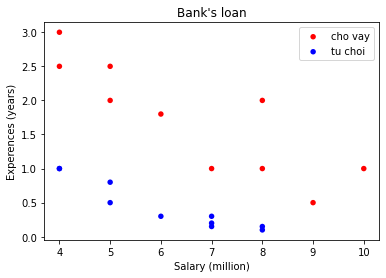

In [5]:
# Step visualize your data
plt.scatter(x[:10,0],x[:10,1],c = 'red',edgecolors = 'none',s = 30, label = 'cho vay')
plt.scatter(x[10:,0],x[10:,1],c = 'blue',edgecolors = 'none',s = 30, label = 'tu choi')
plt.legend(loc = 1)
plt.xlabel('Salary (million)')
plt.ylabel('Experences (years)')
plt.title("Bank's loan")
plt.show()

In [6]:
# add a column 1 xi = 1,w0,w1
X = np.hstack(( np.ones((N,1)), x ))
print(f"X.shape {X.shape}")

X.shape (20, 3)


In [7]:
# Step3 choise your model (your hypothesis) y_hat = sigmoid(wo + w1*x1 + w2*x2) 
w = np.array([0,0.1,0.1]).reshape(-1,1)
print(f"w.shape {w.shape}")

w.shape (3, 1)


In [9]:
# Step4 define the lost function
def ComputeCost(x,y,theta):
    y_hat = sigmoid(x@w)
    J = -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return J

ComputeCost(X[0],y[0],w)

array([0.28733533])

In [10]:
X.T @ y

array([[10. ],
       [66. ],
       [17.3]])

In [12]:
X[:,1]

array([10.,  5.,  6.,  7.,  8.,  9.,  4.,  5.,  8.,  4.,  8.,  7.,  4.,
        5.,  7.,  4.,  5.,  6.,  7.,  8.])

In [159]:
print(res.shape)
x1 = X[:,1].reshape(-1,1)
print(x1.shape)

(20, 1)
(20, 1)


In [160]:
res * x1

array([[ 0.00000000e+00],
       [-8.48565662e-11],
       [-5.56221735e-12],
       [-4.22772928e-13],
       [-1.77635684e-14],
       [-1.99840144e-15],
       [-9.82868009e-10],
       [-7.32858219e-11],
       [-2.48689958e-14],
       [-1.13805854e-09],
       [ 8.00000000e+00],
       [ 7.00000000e+00],
       [ 4.00000000e+00],
       [ 5.00000000e+00],
       [ 7.00000000e+00],
       [ 4.00000000e+00],
       [ 5.00000000e+00],
       [ 6.00000000e+00],
       [ 7.00000000e+00],
       [ 8.00000000e+00]])

In [13]:
iteration =100000
cost = np.zeros((iteration,1))
learning_rate = 0.02
w = np.array([[0.],[0.1],[0.1]])#.reshape(-1,1)

for i in range(iteration):
    # calcualate all predict
    y_predict = sigmoid(X @ w)
    res = y_predict - y
    cost[i] = -np.sum((y*np.log(y_predict) + (1-y)*np.log(1 - y_predict)))
    
    # Gradient descent
    #theta[0] = theta[0] - learning_rate * (1/N) * np.sum(res)
    #theta[1] = theta[1] - learning_rate * (1/N) * np.sum(np.multiply(res,x1))
    #theta[2] = theta[2] - learning_rate * (1/N) * np.sum(np.multiply(res,x2))
    
    for j in range(len(w)):
        w[j] = w[j] - learning_rate * 1/N * np.sum((y_predict - y)*X[:,j].reshape(-1,1))
    
    #w = w - learning_rate * 1/N * X.T @ (y_predict - y) # auto sum each time you
    print(i,cost[i])

0 [14.3783222]
1 [13.96058111]
2 [13.68208227]
3 [13.49628265]
4 [13.37017291]
5 [13.28165628]
6 [13.21649459]
7 [13.1657383]
8 [13.12385131]
9 [13.08744389]
10 [13.05445387]
11 [13.02363167]
12 [12.99422173]
13 [12.96576757]
14 [12.93799322]
15 [12.9107315]
16 [12.88388069]
17 [12.85737846]
18 [12.83118615]
19 [12.80527934]
20 [12.77964218]
21 [12.75426398]
22 [12.72913714]
23 [12.70425598]
24 [12.67961594]
25 [12.65521316]
26 [12.63104422]
27 [12.60710598]
28 [12.58339546]
29 [12.55990983]
30 [12.53664631]
31 [12.51360221]
32 [12.49077486]
33 [12.46816168]
34 [12.44576008]
35 [12.42356754]
36 [12.40158154]
37 [12.37979962]
38 [12.35821934]
39 [12.33683829]
40 [12.3156541]
41 [12.2946644]
42 [12.27386688]
43 [12.25325925]
44 [12.23283924]
45 [12.21260461]
46 [12.19255316]
47 [12.17268271]
48 [12.1529911]
49 [12.1334762]
50 [12.11413592]
51 [12.09496818]
52 [12.07597093]
53 [12.05714216]
54 [12.03847986]
55 [12.01998206]
56 [12.00164682]
57 [11.98347222]
58 [11.96545636]
59 [11.9475973

719 [8.71989296]
720 [8.71793875]
721 [8.71598638]
722 [8.71403584]
723 [8.71208714]
724 [8.71014025]
725 [8.70819518]
726 [8.70625193]
727 [8.70431048]
728 [8.70237082]
729 [8.70043296]
730 [8.69849689]
731 [8.69656259]
732 [8.69463007]
733 [8.69269931]
734 [8.69077032]
735 [8.68884309]
736 [8.6869176]
737 [8.68499386]
738 [8.68307186]
739 [8.68115159]
740 [8.67923305]
741 [8.67731623]
742 [8.67540113]
743 [8.67348773]
744 [8.67157604]
745 [8.66966605]
746 [8.66775775]
747 [8.66585114]
748 [8.66394621]
749 [8.66204296]
750 [8.66014138]
751 [8.65824146]
752 [8.65634321]
753 [8.65444661]
754 [8.65255166]
755 [8.65065835]
756 [8.64876668]
757 [8.64687665]
758 [8.64498824]
759 [8.64310146]
760 [8.64121629]
761 [8.63933274]
762 [8.63745079]
763 [8.63557045]
764 [8.6336917]
765 [8.63181455]
766 [8.62993898]
767 [8.628065]
768 [8.62619259]
769 [8.62432176]
770 [8.62245249]
771 [8.62058478]
772 [8.61871863]
773 [8.61685404]
774 [8.61499099]
775 [8.61312948]
776 [8.61126952]
777 [8.60941108]
7

1446 [7.58022639]
1447 [7.57890397]
1448 [7.57758203]
1449 [7.57626056]
1450 [7.57493956]
1451 [7.57361905]
1452 [7.57229901]
1453 [7.57097944]
1454 [7.56966035]
1455 [7.56834173]
1456 [7.56702359]
1457 [7.56570592]
1458 [7.56438873]
1459 [7.563072]
1460 [7.56175575]
1461 [7.56043997]
1462 [7.55912467]
1463 [7.55780983]
1464 [7.55649547]
1465 [7.55518157]
1466 [7.55386815]
1467 [7.55255519]
1468 [7.5512427]
1469 [7.54993069]
1470 [7.54861914]
1471 [7.54730806]
1472 [7.54599744]
1473 [7.5446873]
1474 [7.54337762]
1475 [7.5420684]
1476 [7.54075966]
1477 [7.53945137]
1478 [7.53814356]
1479 [7.53683621]
1480 [7.53552932]
1481 [7.5342229]
1482 [7.53291694]
1483 [7.53161144]
1484 [7.53030641]
1485 [7.52900184]
1486 [7.52769773]
1487 [7.52639409]
1488 [7.5250909]
1489 [7.52378818]
1490 [7.52248592]
1491 [7.52118411]
1492 [7.51988277]
1493 [7.51858189]
1494 [7.51728147]
1495 [7.5159815]
1496 [7.514682]
1497 [7.51338295]
1498 [7.51208436]
1499 [7.51078623]
1500 [7.50948855]
1501 [7.50819133]
15

2141 [6.75971436]
2142 [6.7586582]
2143 [6.75760236]
2144 [6.75654683]
2145 [6.75549163]
2146 [6.75443674]
2147 [6.75338217]
2148 [6.75232791]
2149 [6.75127397]
2150 [6.75022035]
2151 [6.74916705]
2152 [6.74811406]
2153 [6.74706139]
2154 [6.74600903]
2155 [6.74495699]
2156 [6.74390527]
2157 [6.74285386]
2158 [6.74180277]
2159 [6.74075199]
2160 [6.73970153]
2161 [6.73865138]
2162 [6.73760155]
2163 [6.73655204]
2164 [6.73550284]
2165 [6.73445395]
2166 [6.73340538]
2167 [6.73235712]
2168 [6.73130917]
2169 [6.73026155]
2170 [6.72921423]
2171 [6.72816723]
2172 [6.72712054]
2173 [6.72607417]
2174 [6.72502811]
2175 [6.72398236]
2176 [6.72293692]
2177 [6.7218918]
2178 [6.72084699]
2179 [6.7198025]
2180 [6.71875831]
2181 [6.71771444]
2182 [6.71667089]
2183 [6.71562764]
2184 [6.71458471]
2185 [6.71354208]
2186 [6.71249977]
2187 [6.71145778]
2188 [6.71041609]
2189 [6.70937471]
2190 [6.70833365]
2191 [6.7072929]
2192 [6.70625245]
2193 [6.70521232]
2194 [6.7041725]
2195 [6.70313299]
2196 [6.7020937

2825 [6.10497054]
2826 [6.10410391]
2827 [6.10323753]
2828 [6.10237138]
2829 [6.10150548]
2830 [6.10063982]
2831 [6.0997744]
2832 [6.09890922]
2833 [6.09804429]
2834 [6.09717959]
2835 [6.09631514]
2836 [6.09545092]
2837 [6.09458695]
2838 [6.09372322]
2839 [6.09285973]
2840 [6.09199648]
2841 [6.09113347]
2842 [6.0902707]
2843 [6.08940816]
2844 [6.08854587]
2845 [6.08768382]
2846 [6.08682201]
2847 [6.08596044]
2848 [6.08509911]
2849 [6.08423802]
2850 [6.08337717]
2851 [6.08251656]
2852 [6.08165619]
2853 [6.08079606]
2854 [6.07993616]
2855 [6.07907651]
2856 [6.07821709]
2857 [6.07735792]
2858 [6.07649898]
2859 [6.07564028]
2860 [6.07478182]
2861 [6.0739236]
2862 [6.07306561]
2863 [6.07220787]
2864 [6.07135036]
2865 [6.0704931]
2866 [6.06963607]
2867 [6.06877927]
2868 [6.06792272]
2869 [6.0670664]
2870 [6.06621033]
2871 [6.06535449]
2872 [6.06449888]
2873 [6.06364352]
2874 [6.06278839]
2875 [6.0619335]
2876 [6.06107885]
2877 [6.06022443]
2878 [6.05937025]
2879 [6.05851631]
2880 [6.0576626]

3528 [5.550505]
3529 [5.54978798]
3530 [5.54907115]
3531 [5.54835451]
3532 [5.54763805]
3533 [5.54692178]
3534 [5.54620569]
3535 [5.54548979]
3536 [5.54477408]
3537 [5.54405855]
3538 [5.54334321]
3539 [5.54262806]
3540 [5.54191309]
3541 [5.54119831]
3542 [5.54048371]
3543 [5.5397693]
3544 [5.53905508]
3545 [5.53834104]
3546 [5.53762718]
3547 [5.53691351]
3548 [5.53620003]
3549 [5.53548674]
3550 [5.53477362]
3551 [5.5340607]
3552 [5.53334796]
3553 [5.5326354]
3554 [5.53192303]
3555 [5.53121084]
3556 [5.53049884]
3557 [5.52978703]
3558 [5.5290754]
3559 [5.52836395]
3560 [5.52765269]
3561 [5.52694161]
3562 [5.52623072]
3563 [5.52552001]
3564 [5.52480949]
3565 [5.52409915]
3566 [5.52338899]
3567 [5.52267902]
3568 [5.52196923]
3569 [5.52125963]
3570 [5.52055021]
3571 [5.51984098]
3572 [5.51913193]
3573 [5.51842306]
3574 [5.51771438]
3575 [5.51700588]
3576 [5.51629756]
3577 [5.51558943]
3578 [5.51488148]
3579 [5.51417372]
3580 [5.51346614]
3581 [5.51275874]
3582 [5.51205152]
3583 [5.51134449

4307 [5.04366385]
4308 [5.043074]
4309 [5.04248428]
4310 [5.04189471]
4311 [5.04130528]
4312 [5.04071599]
4313 [5.04012684]
4314 [5.03953784]
4315 [5.03894898]
4316 [5.03836026]
4317 [5.03777168]
4318 [5.03718324]
4319 [5.03659494]
4320 [5.03600679]
4321 [5.03541877]
4322 [5.0348309]
4323 [5.03424317]
4324 [5.03365558]
4325 [5.03306814]
4326 [5.03248083]
4327 [5.03189367]
4328 [5.03130664]
4329 [5.03071976]
4330 [5.03013302]
4331 [5.02954642]
4332 [5.02895996]
4333 [5.02837364]
4334 [5.02778746]
4335 [5.02720143]
4336 [5.02661553]
4337 [5.02602978]
4338 [5.02544416]
4339 [5.02485869]
4340 [5.02427335]
4341 [5.02368816]
4342 [5.02310311]
4343 [5.0225182]
4344 [5.02193343]
4345 [5.0213488]
4346 [5.02076431]
4347 [5.02017996]
4348 [5.01959575]
4349 [5.01901168]
4350 [5.01842775]
4351 [5.01784396]
4352 [5.01726031]
4353 [5.0166768]
4354 [5.01609343]
4355 [5.0155102]
4356 [5.01492711]
4357 [5.01434416]
4358 [5.01376135]
4359 [5.01317868]
4360 [5.01259615]
4361 [5.01201376]
4362 [5.01143151]

5012 [4.66045279]
5013 [4.65995216]
5014 [4.65945164]
5015 [4.65895124]
5016 [4.65845095]
5017 [4.65795076]
5018 [4.6574507]
5019 [4.65695074]
5020 [4.65645089]
5021 [4.65595116]
5022 [4.65545154]
5023 [4.65495203]
5024 [4.65445264]
5025 [4.65395335]
5026 [4.65345418]
5027 [4.65295512]
5028 [4.65245617]
5029 [4.65195734]
5030 [4.65145861]
5031 [4.65096]
5032 [4.6504615]
5033 [4.64996311]
5034 [4.64946483]
5035 [4.64896666]
5036 [4.64846861]
5037 [4.64797066]
5038 [4.64747283]
5039 [4.64697511]
5040 [4.6464775]
5041 [4.64598001]
5042 [4.64548262]
5043 [4.64498534]
5044 [4.64448818]
5045 [4.64399113]
5046 [4.64349419]
5047 [4.64299736]
5048 [4.64250064]
5049 [4.64200403]
5050 [4.64150753]
5051 [4.64101115]
5052 [4.64051487]
5053 [4.64001871]
5054 [4.63952266]
5055 [4.63902672]
5056 [4.63853089]
5057 [4.63803517]
5058 [4.63753956]
5059 [4.63704406]
5060 [4.63654867]
5061 [4.63605339]
5062 [4.63555823]
5063 [4.63506317]
5064 [4.63456823]
5065 [4.63407339]
5066 [4.63357867]
5067 [4.63308405

5863 [4.27162183]
5864 [4.271205]
5865 [4.27078826]
5866 [4.27037161]
5867 [4.26995504]
5868 [4.26953856]
5869 [4.26912217]
5870 [4.26870586]
5871 [4.26828964]
5872 [4.2678735]
5873 [4.26745745]
5874 [4.26704148]
5875 [4.2666256]
5876 [4.26620981]
5877 [4.2657941]
5878 [4.26537847]
5879 [4.26496294]
5880 [4.26454749]
5881 [4.26413212]
5882 [4.26371684]
5883 [4.26330164]
5884 [4.26288653]
5885 [4.26247151]
5886 [4.26205657]
5887 [4.26164172]
5888 [4.26122695]
5889 [4.26081227]
5890 [4.26039767]
5891 [4.25998316]
5892 [4.25956873]
5893 [4.25915439]
5894 [4.25874014]
5895 [4.25832597]
5896 [4.25791188]
5897 [4.25749788]
5898 [4.25708397]
5899 [4.25667014]
5900 [4.25625639]
5901 [4.25584273]
5902 [4.25542916]
5903 [4.25501567]
5904 [4.25460226]
5905 [4.25418894]
5906 [4.25377571]
5907 [4.25336256]
5908 [4.25294949]
5909 [4.25253651]
5910 [4.25212362]
5911 [4.25171081]
5912 [4.25129808]
5913 [4.25088544]
5914 [4.25047289]
5915 [4.25006042]
5916 [4.24964803]
5917 [4.24923573]
5918 [4.2488235

6645 [3.97000106]
6646 [3.96964425]
6647 [3.9692875]
6648 [3.96893083]
6649 [3.96857423]
6650 [3.96821769]
6651 [3.96786122]
6652 [3.96750482]
6653 [3.96714849]
6654 [3.96679223]
6655 [3.96643603]
6656 [3.9660799]
6657 [3.96572384]
6658 [3.96536785]
6659 [3.96501193]
6660 [3.96465607]
6661 [3.96430029]
6662 [3.96394457]
6663 [3.96358892]
6664 [3.96323333]
6665 [3.96287782]
6666 [3.96252237]
6667 [3.96216699]
6668 [3.96181168]
6669 [3.96145644]
6670 [3.96110126]
6671 [3.96074615]
6672 [3.96039111]
6673 [3.96003614]
6674 [3.95968124]
6675 [3.9593264]
6676 [3.95897163]
6677 [3.95861693]
6678 [3.9582623]
6679 [3.95790773]
6680 [3.95755323]
6681 [3.9571988]
6682 [3.95684444]
6683 [3.95649015]
6684 [3.95613592]
6685 [3.95578176]
6686 [3.95542767]
6687 [3.95507364]
6688 [3.95471969]
6689 [3.9543658]
6690 [3.95401197]
6691 [3.95365822]
6692 [3.95330453]
6693 [3.95295091]
6694 [3.95259736]
6695 [3.95224388]
6696 [3.95189046]
6697 [3.95153711]
6698 [3.95118382]
6699 [3.95083061]
6700 [3.95047746

7409 [3.71596222]
7410 [3.71565241]
7411 [3.71534266]
7412 [3.71503296]
7413 [3.71472332]
7414 [3.71441373]
7415 [3.7141042]
7416 [3.71379472]
7417 [3.7134853]
7418 [3.71317594]
7419 [3.71286663]
7420 [3.71255737]
7421 [3.71224817]
7422 [3.71193903]
7423 [3.71162994]
7424 [3.7113209]
7425 [3.71101192]
7426 [3.710703]
7427 [3.71039413]
7428 [3.71008531]
7429 [3.70977655]
7430 [3.70946785]
7431 [3.7091592]
7432 [3.7088506]
7433 [3.70854206]
7434 [3.70823358]
7435 [3.70792515]
7436 [3.70761678]
7437 [3.70730846]
7438 [3.70700019]
7439 [3.70669198]
7440 [3.70638383]
7441 [3.70607573]
7442 [3.70576768]
7443 [3.70545969]
7444 [3.70515175]
7445 [3.70484387]
7446 [3.70453605]
7447 [3.70422827]
7448 [3.70392056]
7449 [3.7036129]
7450 [3.70330529]
7451 [3.70299774]
7452 [3.70269024]
7453 [3.70238279]
7454 [3.70207541]
7455 [3.70176807]
7456 [3.70146079]
7457 [3.70115357]
7458 [3.7008464]
7459 [3.70053928]
7460 [3.70023222]
7461 [3.69992522]
7462 [3.69961826]
7463 [3.69931137]
7464 [3.69900452]
7

7932 [3.56114461]
7933 [3.56086181]
7934 [3.56057906]
7935 [3.56029636]
7936 [3.56001371]
7937 [3.55973111]
7938 [3.55944855]
7939 [3.55916605]
7940 [3.55888359]
7941 [3.55860117]
7942 [3.55831881]
7943 [3.5580365]
7944 [3.55775423]
7945 [3.55747201]
7946 [3.55718984]
7947 [3.55690772]
7948 [3.55662564]
7949 [3.55634362]
7950 [3.55606164]
7951 [3.55577971]
7952 [3.55549782]
7953 [3.55521599]
7954 [3.5549342]
7955 [3.55465246]
7956 [3.55437077]
7957 [3.55408913]
7958 [3.55380754]
7959 [3.55352599]
7960 [3.55324449]
7961 [3.55296304]
7962 [3.55268163]
7963 [3.55240028]
7964 [3.55211897]
7965 [3.55183771]
7966 [3.5515565]
7967 [3.55127533]
7968 [3.55099422]
7969 [3.55071315]
7970 [3.55043213]
7971 [3.55015115]
7972 [3.54987023]
7973 [3.54958935]
7974 [3.54930852]
7975 [3.54902773]
7976 [3.548747]
7977 [3.54846631]
7978 [3.54818567]
7979 [3.54790508]
7980 [3.54762454]
7981 [3.54734404]
7982 [3.54706359]
7983 [3.54678319]
7984 [3.54650283]
7985 [3.54622253]
7986 [3.54594227]
7987 [3.5456620

8487 [3.41126587]
8488 [3.41100803]
8489 [3.41075023]
8490 [3.41049247]
8491 [3.41023475]
8492 [3.40997707]
8493 [3.40971944]
8494 [3.40946184]
8495 [3.40920429]
8496 [3.40894679]
8497 [3.40868932]
8498 [3.40843189]
8499 [3.40817451]
8500 [3.40791717]
8501 [3.40765987]
8502 [3.40740261]
8503 [3.40714539]
8504 [3.40688822]
8505 [3.40663109]
8506 [3.406374]
8507 [3.40611695]
8508 [3.40585994]
8509 [3.40560297]
8510 [3.40534605]
8511 [3.40508917]
8512 [3.40483232]
8513 [3.40457552]
8514 [3.40431877]
8515 [3.40406205]
8516 [3.40380538]
8517 [3.40354874]
8518 [3.40329215]
8519 [3.4030356]
8520 [3.4027791]
8521 [3.40252263]
8522 [3.4022662]
8523 [3.40200982]
8524 [3.40175348]
8525 [3.40149718]
8526 [3.40124092]
8527 [3.4009847]
8528 [3.40072853]
8529 [3.40047239]
8530 [3.4002163]
8531 [3.39996025]
8532 [3.39970424]
8533 [3.39944827]
8534 [3.39919234]
8535 [3.39893646]
8536 [3.39868062]
8537 [3.39842481]
8538 [3.39816905]
8539 [3.39791333]
8540 [3.39765765]
8541 [3.39740202]
8542 [3.39714642]

9132 [3.2532227]
9133 [3.25298988]
9134 [3.25275709]
9135 [3.25252434]
9136 [3.25229163]
9137 [3.25205895]
9138 [3.25182631]
9139 [3.2515937]
9140 [3.25136113]
9141 [3.2511286]
9142 [3.2508961]
9143 [3.25066364]
9144 [3.25043121]
9145 [3.25019882]
9146 [3.24996647]
9147 [3.24973415]
9148 [3.24950186]
9149 [3.24926962]
9150 [3.2490374]
9151 [3.24880523]
9152 [3.24857309]
9153 [3.24834098]
9154 [3.24810891]
9155 [3.24787688]
9156 [3.24764488]
9157 [3.24741292]
9158 [3.24718099]
9159 [3.2469491]
9160 [3.24671725]
9161 [3.24648543]
9162 [3.24625365]
9163 [3.2460219]
9164 [3.24579019]
9165 [3.24555851]
9166 [3.24532687]
9167 [3.24509526]
9168 [3.24486369]
9169 [3.24463216]
9170 [3.24440066]
9171 [3.2441692]
9172 [3.24393777]
9173 [3.24370638]
9174 [3.24347502]
9175 [3.2432437]
9176 [3.24301241]
9177 [3.24278116]
9178 [3.24254995]
9179 [3.24231877]
9180 [3.24208763]
9181 [3.24185652]
9182 [3.24162545]
9183 [3.24139441]
9184 [3.24116341]
9185 [3.24093244]
9186 [3.24070151]
9187 [3.24047062]
9

9796 [3.10613865]
9797 [3.10592792]
9798 [3.10571722]
9799 [3.10550655]
9800 [3.10529591]
9801 [3.1050853]
9802 [3.10487473]
9803 [3.10466418]
9804 [3.10445367]
9805 [3.10424318]
9806 [3.10403273]
9807 [3.10382231]
9808 [3.10361192]
9809 [3.10340156]
9810 [3.10319123]
9811 [3.10298093]
9812 [3.10277066]
9813 [3.10256042]
9814 [3.10235022]
9815 [3.10214004]
9816 [3.10192989]
9817 [3.10171978]
9818 [3.10150969]
9819 [3.10129964]
9820 [3.10108962]
9821 [3.10087963]
9822 [3.10066966]
9823 [3.10045973]
9824 [3.10024983]
9825 [3.10003996]
9826 [3.09983012]
9827 [3.09962032]
9828 [3.09941054]
9829 [3.09920079]
9830 [3.09899107]
9831 [3.09878139]
9832 [3.09857173]
9833 [3.09836211]
9834 [3.09815251]
9835 [3.09794295]
9836 [3.09773342]
9837 [3.09752391]
9838 [3.09731444]
9839 [3.097105]
9840 [3.09689559]
9841 [3.09668621]
9842 [3.09647686]
9843 [3.09626754]
9844 [3.09605825]
9845 [3.09584899]
9846 [3.09563976]
9847 [3.09543057]
9848 [3.0952214]
9849 [3.09501226]
9850 [3.09480316]
9851 [3.094594

10643 [2.93803818]
10644 [2.93785128]
10645 [2.9376644]
10646 [2.93747755]
10647 [2.93729073]
10648 [2.93710393]
10649 [2.93691715]
10650 [2.93673041]
10651 [2.93654368]
10652 [2.93635698]
10653 [2.93617031]
10654 [2.93598367]
10655 [2.93579705]
10656 [2.93561045]
10657 [2.93542388]
10658 [2.93523734]
10659 [2.93505082]
10660 [2.93486433]
10661 [2.93467786]
10662 [2.93449142]
10663 [2.934305]
10664 [2.93411861]
10665 [2.93393225]
10666 [2.93374591]
10667 [2.93355959]
10668 [2.93337331]
10669 [2.93318704]
10670 [2.93300081]
10671 [2.93281459]
10672 [2.93262841]
10673 [2.93244225]
10674 [2.93225611]
10675 [2.93207]
10676 [2.93188392]
10677 [2.93169786]
10678 [2.93151182]
10679 [2.93132582]
10680 [2.93113983]
10681 [2.93095388]
10682 [2.93076795]
10683 [2.93058204]
10684 [2.93039616]
10685 [2.9302103]
10686 [2.93002447]
10687 [2.92983867]
10688 [2.92965289]
10689 [2.92946714]
10690 [2.92928141]
10691 [2.92909571]
10692 [2.92891003]
10693 [2.92872438]
10694 [2.92853875]
10695 [2.92835315]


11418 [2.8004859]
11419 [2.80031737]
11420 [2.80014886]
11421 [2.79998037]
11422 [2.7998119]
11423 [2.79964346]
11424 [2.79947503]
11425 [2.79930663]
11426 [2.79913825]
11427 [2.79896989]
11428 [2.79880155]
11429 [2.79863324]
11430 [2.79846495]
11431 [2.79829668]
11432 [2.79812843]
11433 [2.7979602]
11434 [2.79779199]
11435 [2.79762381]
11436 [2.79745565]
11437 [2.79728751]
11438 [2.79711939]
11439 [2.79695129]
11440 [2.79678322]
11441 [2.79661516]
11442 [2.79644713]
11443 [2.79627912]
11444 [2.79611113]
11445 [2.79594317]
11446 [2.79577522]
11447 [2.7956073]
11448 [2.7954394]
11449 [2.79527152]
11450 [2.79510367]
11451 [2.79493583]
11452 [2.79476802]
11453 [2.79460022]
11454 [2.79443245]
11455 [2.79426471]
11456 [2.79409698]
11457 [2.79392927]
11458 [2.79376159]
11459 [2.79359393]
11460 [2.79342629]
11461 [2.79325867]
11462 [2.79309108]
11463 [2.7929235]
11464 [2.79275595]
11465 [2.79258842]
11466 [2.79242091]
11467 [2.79225342]
11468 [2.79208595]
11469 [2.79191851]
11470 [2.79175108]

12167 [2.68009434]
12168 [2.67994105]
12169 [2.67978778]
12170 [2.67963452]
12171 [2.67948129]
12172 [2.67932808]
12173 [2.67917488]
12174 [2.67902171]
12175 [2.67886855]
12176 [2.67871541]
12177 [2.67856229]
12178 [2.67840919]
12179 [2.67825611]
12180 [2.67810305]
12181 [2.67795]
12182 [2.67779698]
12183 [2.67764397]
12184 [2.67749099]
12185 [2.67733802]
12186 [2.67718507]
12187 [2.67703214]
12188 [2.67687923]
12189 [2.67672633]
12190 [2.67657346]
12191 [2.6764206]
12192 [2.67626777]
12193 [2.67611495]
12194 [2.67596215]
12195 [2.67580937]
12196 [2.67565661]
12197 [2.67550387]
12198 [2.67535115]
12199 [2.67519844]
12200 [2.67504575]
12201 [2.67489309]
12202 [2.67474044]
12203 [2.67458781]
12204 [2.6744352]
12205 [2.67428261]
12206 [2.67413003]
12207 [2.67397748]
12208 [2.67382494]
12209 [2.67367243]
12210 [2.67351993]
12211 [2.67336745]
12212 [2.67321499]
12213 [2.67306255]
12214 [2.67291013]
12215 [2.67275772]
12216 [2.67260534]
12217 [2.67245297]
12218 [2.67230062]
12219 [2.67214829

12884 [2.57483084]
12885 [2.57469024]
12886 [2.57454966]
12887 [2.5744091]
12888 [2.57426855]
12889 [2.57412802]
12890 [2.57398751]
12891 [2.57384701]
12892 [2.57370653]
12893 [2.57356607]
12894 [2.57342562]
12895 [2.57328519]
12896 [2.57314477]
12897 [2.57300437]
12898 [2.57286399]
12899 [2.57272363]
12900 [2.57258328]
12901 [2.57244295]
12902 [2.57230263]
12903 [2.57216233]
12904 [2.57202205]
12905 [2.57188178]
12906 [2.57174153]
12907 [2.5716013]
12908 [2.57146109]
12909 [2.57132089]
12910 [2.5711807]
12911 [2.57104053]
12912 [2.57090038]
12913 [2.57076025]
12914 [2.57062013]
12915 [2.57048003]
12916 [2.57033995]
12917 [2.57019988]
12918 [2.57005983]
12919 [2.56991979]
12920 [2.56977977]
12921 [2.56963977]
12922 [2.56949978]
12923 [2.56935981]
12924 [2.56921986]
12925 [2.56907993]
12926 [2.56894001]
12927 [2.5688001]
12928 [2.56866021]
12929 [2.56852034]
12930 [2.56838049]
12931 [2.56824065]
12932 [2.56810083]
12933 [2.56796102]
12934 [2.56782124]
12935 [2.56768146]
12936 [2.5675417

13614 [2.47641527]
13615 [2.47628601]
13616 [2.47615676]
13617 [2.47602752]
13618 [2.4758983]
13619 [2.47576909]
13620 [2.4756399]
13621 [2.47551072]
13622 [2.47538156]
13623 [2.47525241]
13624 [2.47512328]
13625 [2.47499416]
13626 [2.47486506]
13627 [2.47473597]
13628 [2.47460689]
13629 [2.47447783]
13630 [2.47434878]
13631 [2.47421975]
13632 [2.47409074]
13633 [2.47396173]
13634 [2.47383274]
13635 [2.47370377]
13636 [2.47357481]
13637 [2.47344587]
13638 [2.47331694]
13639 [2.47318802]
13640 [2.47305912]
13641 [2.47293023]
13642 [2.47280136]
13643 [2.4726725]
13644 [2.47254366]
13645 [2.47241483]
13646 [2.47228601]
13647 [2.47215721]
13648 [2.47202843]
13649 [2.47189966]
13650 [2.4717709]
13651 [2.47164216]
13652 [2.47151343]
13653 [2.47138472]
13654 [2.47125602]
13655 [2.47112733]
13656 [2.47099866]
13657 [2.47087001]
13658 [2.47074137]
13659 [2.47061274]
13660 [2.47048413]
13661 [2.47035553]
13662 [2.47022695]
13663 [2.47009838]
13664 [2.46996982]
13665 [2.46984128]
13666 [2.4697127

14437 [2.37472776]
14438 [2.37460966]
14439 [2.37449158]
14440 [2.37437351]
14441 [2.37425545]
14442 [2.3741374]
14443 [2.37401937]
14444 [2.37390135]
14445 [2.37378334]
14446 [2.37366535]
14447 [2.37354737]
14448 [2.3734294]
14449 [2.37331144]
14450 [2.37319349]
14451 [2.37307556]
14452 [2.37295764]
14453 [2.37283974]
14454 [2.37272184]
14455 [2.37260396]
14456 [2.37248609]
14457 [2.37236824]
14458 [2.3722504]
14459 [2.37213256]
14460 [2.37201475]
14461 [2.37189694]
14462 [2.37177915]
14463 [2.37166137]
14464 [2.3715436]
14465 [2.37142585]
14466 [2.3713081]
14467 [2.37119037]
14468 [2.37107266]
14469 [2.37095495]
14470 [2.37083726]
14471 [2.37071958]
14472 [2.37060191]
14473 [2.37048426]
14474 [2.37036662]
14475 [2.37024899]
14476 [2.37013137]
14477 [2.37001377]
14478 [2.36989618]
14479 [2.3697786]
14480 [2.36966103]
14481 [2.36954348]
14482 [2.36942594]
14483 [2.36930841]
14484 [2.36919089]
14485 [2.36907339]
14486 [2.3689559]
14487 [2.36883842]
14488 [2.36872095]
14489 [2.3686035]
1

15186 [2.28967797]
15187 [2.2895688]
15188 [2.28945963]
15189 [2.28935048]
15190 [2.28924134]
15191 [2.28913221]
15192 [2.28902309]
15193 [2.28891398]
15194 [2.28880489]
15195 [2.2886958]
15196 [2.28858673]
15197 [2.28847767]
15198 [2.28836861]
15199 [2.28825957]
15200 [2.28815055]
15201 [2.28804153]
15202 [2.28793252]
15203 [2.28782352]
15204 [2.28771454]
15205 [2.28760557]
15206 [2.2874966]
15207 [2.28738765]
15208 [2.28727871]
15209 [2.28716979]
15210 [2.28706087]
15211 [2.28695196]
15212 [2.28684307]
15213 [2.28673418]
15214 [2.28662531]
15215 [2.28651645]
15216 [2.2864076]
15217 [2.28629876]
15218 [2.28618993]
15219 [2.28608111]
15220 [2.28597231]
15221 [2.28586351]
15222 [2.28575473]
15223 [2.28564596]
15224 [2.2855372]
15225 [2.28542845]
15226 [2.28531971]
15227 [2.28521098]
15228 [2.28510226]
15229 [2.28499356]
15230 [2.28488486]
15231 [2.28477618]
15232 [2.28466751]
15233 [2.28455884]
15234 [2.28445019]
15235 [2.28434156]
15236 [2.28423293]
15237 [2.28412431]
15238 [2.28401571

15640 [2.24123816]
15641 [2.24113389]
15642 [2.24102964]
15643 [2.2409254]
15644 [2.24082116]
15645 [2.24071694]
15646 [2.24061273]
15647 [2.24050853]
15648 [2.24040434]
15649 [2.24030016]
15650 [2.24019599]
15651 [2.24009183]
15652 [2.23998768]
15653 [2.23988354]
15654 [2.23977941]
15655 [2.23967529]
15656 [2.23957119]
15657 [2.23946709]
15658 [2.239363]
15659 [2.23925893]
15660 [2.23915486]
15661 [2.2390508]
15662 [2.23894676]
15663 [2.23884272]
15664 [2.2387387]
15665 [2.23863469]
15666 [2.23853068]
15667 [2.23842669]
15668 [2.23832271]
15669 [2.23821873]
15670 [2.23811477]
15671 [2.23801082]
15672 [2.23790688]
15673 [2.23780295]
15674 [2.23769903]
15675 [2.23759512]
15676 [2.23749122]
15677 [2.23738733]
15678 [2.23728345]
15679 [2.23717958]
15680 [2.23707573]
15681 [2.23697188]
15682 [2.23686804]
15683 [2.23676421]
15684 [2.2366604]
15685 [2.23655659]
15686 [2.2364528]
15687 [2.23634901]
15688 [2.23624523]
15689 [2.23614147]
15690 [2.23603772]
15691 [2.23593397]
15692 [2.23583024]


16319 [2.17276448]
16320 [2.17266694]
16321 [2.17256942]
16322 [2.17247191]
16323 [2.1723744]
16324 [2.17227691]
16325 [2.17217943]
16326 [2.17208195]
16327 [2.17198448]
16328 [2.17188703]
16329 [2.17178958]
16330 [2.17169214]
16331 [2.17159472]
16332 [2.1714973]
16333 [2.17139989]
16334 [2.17130249]
16335 [2.1712051]
16336 [2.17110772]
16337 [2.17101034]
16338 [2.17091298]
16339 [2.17081563]
16340 [2.17071828]
16341 [2.17062095]
16342 [2.17052362]
16343 [2.17042631]
16344 [2.170329]
16345 [2.17023171]
16346 [2.17013442]
16347 [2.17003714]
16348 [2.16993987]
16349 [2.16984261]
16350 [2.16974536]
16351 [2.16964812]
16352 [2.16955089]
16353 [2.16945367]
16354 [2.16935646]
16355 [2.16925925]
16356 [2.16916206]
16357 [2.16906488]
16358 [2.1689677]
16359 [2.16887054]
16360 [2.16877338]
16361 [2.16867623]
16362 [2.1685791]
16363 [2.16848197]
16364 [2.16838485]
16365 [2.16828774]
16366 [2.16819064]
16367 [2.16809355]
16368 [2.16799647]
16369 [2.16789939]
16370 [2.16780233]
16371 [2.16770528]


17040 [2.10480336]
17041 [2.10471227]
17042 [2.10462119]
17043 [2.10453011]
17044 [2.10443904]
17045 [2.10434799]
17046 [2.10425694]
17047 [2.1041659]
17048 [2.10407486]
17049 [2.10398384]
17050 [2.10389282]
17051 [2.10380182]
17052 [2.10371082]
17053 [2.10361983]
17054 [2.10352885]
17055 [2.10343787]
17056 [2.10334691]
17057 [2.10325595]
17058 [2.103165]
17059 [2.10307406]
17060 [2.10298313]
17061 [2.10289221]
17062 [2.1028013]
17063 [2.10271039]
17064 [2.10261949]
17065 [2.10252861]
17066 [2.10243772]
17067 [2.10234685]
17068 [2.10225599]
17069 [2.10216513]
17070 [2.10207429]
17071 [2.10198345]
17072 [2.10189262]
17073 [2.1018018]
17074 [2.10171099]
17075 [2.10162018]
17076 [2.10152939]
17077 [2.1014386]
17078 [2.10134782]
17079 [2.10125705]
17080 [2.10116629]
17081 [2.10107553]
17082 [2.10098479]
17083 [2.10089405]
17084 [2.10080332]
17085 [2.1007126]
17086 [2.10062189]
17087 [2.10053119]
17088 [2.10044049]
17089 [2.1003498]
17090 [2.10025913]
17091 [2.10016846]
17092 [2.10007779]
1

17717 [2.04501184]
17718 [2.04492622]
17719 [2.0448406]
17720 [2.04475499]
17721 [2.04466939]
17722 [2.0445838]
17723 [2.04449821]
17724 [2.04441264]
17725 [2.04432707]
17726 [2.0442415]
17727 [2.04415595]
17728 [2.0440704]
17729 [2.04398486]
17730 [2.04389933]
17731 [2.04381381]
17732 [2.04372829]
17733 [2.04364278]
17734 [2.04355728]
17735 [2.04347179]
17736 [2.0433863]
17737 [2.04330082]
17738 [2.04321535]
17739 [2.04312989]
17740 [2.04304443]
17741 [2.04295899]
17742 [2.04287355]
17743 [2.04278812]
17744 [2.04270269]
17745 [2.04261727]
17746 [2.04253187]
17747 [2.04244646]
17748 [2.04236107]
17749 [2.04227568]
17750 [2.04219031]
17751 [2.04210494]
17752 [2.04201957]
17753 [2.04193422]
17754 [2.04184887]
17755 [2.04176353]
17756 [2.0416782]
17757 [2.04159287]
17758 [2.04150756]
17759 [2.04142225]
17760 [2.04133694]
17761 [2.04125165]
17762 [2.04116636]
17763 [2.04108109]
17764 [2.04099581]
17765 [2.04091055]
17766 [2.0408253]
17767 [2.04074005]
17768 [2.04065481]
17769 [2.04056957]


18402 [1.98810729]
18403 [1.9880267]
18404 [1.98794611]
18405 [1.98786554]
18406 [1.98778497]
18407 [1.9877044]
18408 [1.98762385]
18409 [1.9875433]
18410 [1.98746275]
18411 [1.98738222]
18412 [1.98730169]
18413 [1.98722117]
18414 [1.98714065]
18415 [1.98706014]
18416 [1.98697964]
18417 [1.98689915]
18418 [1.98681866]
18419 [1.98673818]
18420 [1.98665771]
18421 [1.98657724]
18422 [1.98649679]
18423 [1.98641633]
18424 [1.98633589]
18425 [1.98625545]
18426 [1.98617502]
18427 [1.9860946]
18428 [1.98601418]
18429 [1.98593377]
18430 [1.98585337]
18431 [1.98577297]
18432 [1.98569258]
18433 [1.9856122]
18434 [1.98553182]
18435 [1.98545146]
18436 [1.9853711]
18437 [1.98529074]
18438 [1.98521039]
18439 [1.98513005]
18440 [1.98504972]
18441 [1.9849694]
18442 [1.98488908]
18443 [1.98480876]
18444 [1.98472846]
18445 [1.98464816]
18446 [1.98456787]
18447 [1.98448758]
18448 [1.98440731]
18449 [1.98432704]
18450 [1.98424677]
18451 [1.98416652]
18452 [1.98408627]
18453 [1.98400603]
18454 [1.98392579]


19092 [1.93411514]
19093 [1.93403917]
19094 [1.93396321]
19095 [1.93388725]
19096 [1.9338113]
19097 [1.93373535]
19098 [1.93365942]
19099 [1.93358348]
19100 [1.93350756]
19101 [1.93343164]
19102 [1.93335572]
19103 [1.93327982]
19104 [1.93320392]
19105 [1.93312802]
19106 [1.93305214]
19107 [1.93297625]
19108 [1.93290038]
19109 [1.93282451]
19110 [1.93274865]
19111 [1.93267279]
19112 [1.93259694]
19113 [1.9325211]
19114 [1.93244526]
19115 [1.93236943]
19116 [1.93229361]
19117 [1.93221779]
19118 [1.93214198]
19119 [1.93206618]
19120 [1.93199038]
19121 [1.93191459]
19122 [1.9318388]
19123 [1.93176302]
19124 [1.93168725]
19125 [1.93161148]
19126 [1.93153572]
19127 [1.93145997]
19128 [1.93138422]
19129 [1.93130848]
19130 [1.93123274]
19131 [1.93115702]
19132 [1.93108129]
19133 [1.93100558]
19134 [1.93092987]
19135 [1.93085417]
19136 [1.93077847]
19137 [1.93070278]
19138 [1.9306271]
19139 [1.93055142]
19140 [1.93047575]
19141 [1.93040008]
19142 [1.93032442]
19143 [1.93024877]
19144 [1.9301731

19701 [1.88900282]
19702 [1.8889306]
19703 [1.88885838]
19704 [1.88878617]
19705 [1.88871396]
19706 [1.88864176]
19707 [1.88856957]
19708 [1.88849738]
19709 [1.8884252]
19710 [1.88835302]
19711 [1.88828085]
19712 [1.88820869]
19713 [1.88813653]
19714 [1.88806437]
19715 [1.88799223]
19716 [1.88792009]
19717 [1.88784795]
19718 [1.88777582]
19719 [1.8877037]
19720 [1.88763158]
19721 [1.88755947]
19722 [1.88748736]
19723 [1.88741526]
19724 [1.88734317]
19725 [1.88727108]
19726 [1.887199]
19727 [1.88712692]
19728 [1.88705485]
19729 [1.88698279]
19730 [1.88691073]
19731 [1.88683867]
19732 [1.88676663]
19733 [1.88669459]
19734 [1.88662255]
19735 [1.88655052]
19736 [1.8864785]
19737 [1.88640648]
19738 [1.88633447]
19739 [1.88626246]
19740 [1.88619046]
19741 [1.88611847]
19742 [1.88604648]
19743 [1.8859745]
19744 [1.88590252]
19745 [1.88583055]
19746 [1.88575859]
19747 [1.88568663]
19748 [1.88561468]
19749 [1.88554273]
19750 [1.88547079]
19751 [1.88539886]
19752 [1.88532693]
19753 [1.885255]
19

20277 [1.84835821]
20278 [1.84828927]
20279 [1.84822034]
20280 [1.84815141]
20281 [1.84808249]
20282 [1.84801358]
20283 [1.84794467]
20284 [1.84787577]
20285 [1.84780687]
20286 [1.84773797]
20287 [1.84766909]
20288 [1.84760021]
20289 [1.84753133]
20290 [1.84746246]
20291 [1.84739359]
20292 [1.84732473]
20293 [1.84725588]
20294 [1.84718703]
20295 [1.84711819]
20296 [1.84704935]
20297 [1.84698052]
20298 [1.84691169]
20299 [1.84684287]
20300 [1.84677405]
20301 [1.84670524]
20302 [1.84663644]
20303 [1.84656764]
20304 [1.84649884]
20305 [1.84643005]
20306 [1.84636127]
20307 [1.84629249]
20308 [1.84622372]
20309 [1.84615495]
20310 [1.84608619]
20311 [1.84601744]
20312 [1.84594869]
20313 [1.84587994]
20314 [1.8458112]
20315 [1.84574247]
20316 [1.84567374]
20317 [1.84560502]
20318 [1.8455363]
20319 [1.84546759]
20320 [1.84539888]
20321 [1.84533018]
20322 [1.84526149]
20323 [1.8451928]
20324 [1.84512411]
20325 [1.84505543]
20326 [1.84498676]
20327 [1.84491809]
20328 [1.84484943]
20329 [1.844780

20834 [1.8107936]
20835 [1.81072763]
20836 [1.81066166]
20837 [1.8105957]
20838 [1.81052974]
20839 [1.81046379]
20840 [1.81039784]
20841 [1.8103319]
20842 [1.81026596]
20843 [1.81020003]
20844 [1.8101341]
20845 [1.81006818]
20846 [1.81000226]
20847 [1.80993635]
20848 [1.80987044]
20849 [1.80980454]
20850 [1.80973865]
20851 [1.80967275]
20852 [1.80960687]
20853 [1.80954099]
20854 [1.80947511]
20855 [1.80940924]
20856 [1.80934338]
20857 [1.80927752]
20858 [1.80921166]
20859 [1.80914581]
20860 [1.80907997]
20861 [1.80901413]
20862 [1.80894829]
20863 [1.80888246]
20864 [1.80881664]
20865 [1.80875082]
20866 [1.808685]
20867 [1.80861919]
20868 [1.80855339]
20869 [1.80848759]
20870 [1.8084218]
20871 [1.80835601]
20872 [1.80829023]
20873 [1.80822445]
20874 [1.80815868]
20875 [1.80809291]
20876 [1.80802714]
20877 [1.80796139]
20878 [1.80789563]
20879 [1.80782989]
20880 [1.80776414]
20881 [1.80769841]
20882 [1.80763267]
20883 [1.80756695]
20884 [1.80750123]
20885 [1.80743551]
20886 [1.8073698]
2

21516 [1.76696222]
21517 [1.76689961]
21518 [1.76683701]
21519 [1.76677441]
21520 [1.76671182]
21521 [1.76664924]
21522 [1.76658666]
21523 [1.76652408]
21524 [1.76646151]
21525 [1.76639894]
21526 [1.76633638]
21527 [1.76627382]
21528 [1.76621127]
21529 [1.76614872]
21530 [1.76608618]
21531 [1.76602364]
21532 [1.7659611]
21533 [1.76589857]
21534 [1.76583605]
21535 [1.76577353]
21536 [1.76571101]
21537 [1.7656485]
21538 [1.765586]
21539 [1.7655235]
21540 [1.765461]
21541 [1.76539851]
21542 [1.76533602]
21543 [1.76527354]
21544 [1.76521106]
21545 [1.76514859]
21546 [1.76508612]
21547 [1.76502366]
21548 [1.7649612]
21549 [1.76489875]
21550 [1.7648363]
21551 [1.76477385]
21552 [1.76471142]
21553 [1.76464898]
21554 [1.76458655]
21555 [1.76452413]
21556 [1.7644617]
21557 [1.76439929]
21558 [1.76433688]
21559 [1.76427447]
21560 [1.76421207]
21561 [1.76414967]
21562 [1.76408728]
21563 [1.76402489]
21564 [1.76396251]
21565 [1.76390013]
21566 [1.76383776]
21567 [1.76377539]
21568 [1.76371303]
215

22148 [1.72831857]
22149 [1.72825885]
22150 [1.72819914]
22151 [1.72813943]
22152 [1.72807973]
22153 [1.72802003]
22154 [1.72796034]
22155 [1.72790065]
22156 [1.72784097]
22157 [1.72778129]
22158 [1.72772161]
22159 [1.72766194]
22160 [1.72760227]
22161 [1.72754261]
22162 [1.72748295]
22163 [1.7274233]
22164 [1.72736365]
22165 [1.727304]
22166 [1.72724436]
22167 [1.72718472]
22168 [1.72712509]
22169 [1.72706547]
22170 [1.72700584]
22171 [1.72694622]
22172 [1.72688661]
22173 [1.726827]
22174 [1.72676739]
22175 [1.72670779]
22176 [1.7266482]
22177 [1.7265886]
22178 [1.72652902]
22179 [1.72646943]
22180 [1.72640985]
22181 [1.72635028]
22182 [1.72629071]
22183 [1.72623114]
22184 [1.72617158]
22185 [1.72611202]
22186 [1.72605247]
22187 [1.72599292]
22188 [1.72593338]
22189 [1.72587384]
22190 [1.7258143]
22191 [1.72575477]
22192 [1.72569525]
22193 [1.72563572]
22194 [1.72557621]
22195 [1.72551669]
22196 [1.72545718]
22197 [1.72539768]
22198 [1.72533818]
22199 [1.72527868]
22200 [1.72521919]
2

22927 [1.68309736]
22928 [1.68304094]
22929 [1.68298451]
22930 [1.68292809]
22931 [1.68287167]
22932 [1.68281526]
22933 [1.68275885]
22934 [1.68270245]
22935 [1.68264605]
22936 [1.68258965]
22937 [1.68253326]
22938 [1.68247687]
22939 [1.68242049]
22940 [1.6823641]
22941 [1.68230773]
22942 [1.68225136]
22943 [1.68219499]
22944 [1.68213862]
22945 [1.68208226]
22946 [1.68202591]
22947 [1.68196955]
22948 [1.68191321]
22949 [1.68185686]
22950 [1.68180052]
22951 [1.68174419]
22952 [1.68168785]
22953 [1.68163153]
22954 [1.6815752]
22955 [1.68151888]
22956 [1.68146257]
22957 [1.68140625]
22958 [1.68134995]
22959 [1.68129364]
22960 [1.68123734]
22961 [1.68118105]
22962 [1.68112475]
22963 [1.68106847]
22964 [1.68101218]
22965 [1.6809559]
22966 [1.68089963]
22967 [1.68084336]
22968 [1.68078709]
22969 [1.68073082]
22970 [1.68067456]
22971 [1.68061831]
22972 [1.68056206]
22973 [1.68050581]
22974 [1.68044957]
22975 [1.68039333]
22976 [1.68033709]
22977 [1.68028086]
22978 [1.68022463]
22979 [1.680168

23552 [1.648599]
23553 [1.64854501]
23554 [1.64849102]
23555 [1.64843704]
23556 [1.64838306]
23557 [1.64832909]
23558 [1.64827512]
23559 [1.64822115]
23560 [1.64816719]
23561 [1.64811323]
23562 [1.64805927]
23563 [1.64800532]
23564 [1.64795137]
23565 [1.64789743]
23566 [1.64784349]
23567 [1.64778955]
23568 [1.64773562]
23569 [1.64768169]
23570 [1.64762776]
23571 [1.64757384]
23572 [1.64751992]
23573 [1.64746601]
23574 [1.64741209]
23575 [1.64735819]
23576 [1.64730428]
23577 [1.64725039]
23578 [1.64719649]
23579 [1.6471426]
23580 [1.64708871]
23581 [1.64703483]
23582 [1.64698094]
23583 [1.64692707]
23584 [1.64687319]
23585 [1.64681933]
23586 [1.64676546]
23587 [1.6467116]
23588 [1.64665774]
23589 [1.64660389]
23590 [1.64655003]
23591 [1.64649619]
23592 [1.64644235]
23593 [1.64638851]
23594 [1.64633467]
23595 [1.64628084]
23596 [1.64622701]
23597 [1.64617319]
23598 [1.64611937]
23599 [1.64606555]
23600 [1.64601174]
23601 [1.64595793]
23602 [1.64590412]
23603 [1.64585032]
23604 [1.6457965

24179 [1.61547115]
24180 [1.61541944]
24181 [1.61536775]
24182 [1.61531605]
24183 [1.61526436]
24184 [1.61521267]
24185 [1.61516098]
24186 [1.6151093]
24187 [1.61505762]
24188 [1.61500595]
24189 [1.61495428]
24190 [1.61490261]
24191 [1.61485094]
24192 [1.61479928]
24193 [1.61474763]
24194 [1.61469597]
24195 [1.61464432]
24196 [1.61459268]
24197 [1.61454103]
24198 [1.61448939]
24199 [1.61443776]
24200 [1.61438612]
24201 [1.61433449]
24202 [1.61428287]
24203 [1.61423125]
24204 [1.61417963]
24205 [1.61412801]
24206 [1.6140764]
24207 [1.61402479]
24208 [1.61397319]
24209 [1.61392159]
24210 [1.61386999]
24211 [1.6138184]
24212 [1.61376681]
24213 [1.61371522]
24214 [1.61366364]
24215 [1.61361206]
24216 [1.61356048]
24217 [1.61350891]
24218 [1.61345734]
24219 [1.61340577]
24220 [1.61335421]
24221 [1.61330265]
24222 [1.6132511]
24223 [1.61319955]
24224 [1.613148]
24225 [1.61309645]
24226 [1.61304491]
24227 [1.61299337]
24228 [1.61294184]
24229 [1.61289031]
24230 [1.61283878]
24231 [1.61278726]

24781 [1.58497071]
24782 [1.58492107]
24783 [1.58487142]
24784 [1.58482178]
24785 [1.58477215]
24786 [1.58472252]
24787 [1.58467289]
24788 [1.58462326]
24789 [1.58457364]
24790 [1.58452402]
24791 [1.58447441]
24792 [1.58442479]
24793 [1.58437518]
24794 [1.58432558]
24795 [1.58427598]
24796 [1.58422638]
24797 [1.58417678]
24798 [1.58412719]
24799 [1.5840776]
24800 [1.58402801]
24801 [1.58397843]
24802 [1.58392885]
24803 [1.58387928]
24804 [1.5838297]
24805 [1.58378013]
24806 [1.58373057]
24807 [1.58368101]
24808 [1.58363145]
24809 [1.58358189]
24810 [1.58353234]
24811 [1.58348279]
24812 [1.58343324]
24813 [1.5833837]
24814 [1.58333416]
24815 [1.58328462]
24816 [1.58323509]
24817 [1.58318556]
24818 [1.58313603]
24819 [1.58308651]
24820 [1.58303699]
24821 [1.58298747]
24822 [1.58293796]
24823 [1.58288845]
24824 [1.58283894]
24825 [1.58278944]
24826 [1.58273994]
24827 [1.58269044]
24828 [1.58264095]
24829 [1.58259146]
24830 [1.58254197]
24831 [1.58249249]
24832 [1.58244301]
24833 [1.582393

25382 [1.55571889]
25383 [1.55567118]
25384 [1.55562347]
25385 [1.55557576]
25386 [1.55552805]
25387 [1.55548035]
25388 [1.55543265]
25389 [1.55538496]
25390 [1.55533726]
25391 [1.55528957]
25392 [1.55524189]
25393 [1.5551942]
25394 [1.55514652]
25395 [1.55509884]
25396 [1.55505117]
25397 [1.5550035]
25398 [1.55495583]
25399 [1.55490816]
25400 [1.5548605]
25401 [1.55481284]
25402 [1.55476519]
25403 [1.55471753]
25404 [1.55466989]
25405 [1.55462224]
25406 [1.5545746]
25407 [1.55452696]
25408 [1.55447932]
25409 [1.55443168]
25410 [1.55438405]
25411 [1.55433643]
25412 [1.5542888]
25413 [1.55424118]
25414 [1.55419356]
25415 [1.55414595]
25416 [1.55409833]
25417 [1.55405072]
25418 [1.55400312]
25419 [1.55395551]
25420 [1.55390791]
25421 [1.55386032]
25422 [1.55381272]
25423 [1.55376513]
25424 [1.55371755]
25425 [1.55366996]
25426 [1.55362238]
25427 [1.5535748]
25428 [1.55352723]
25429 [1.55347966]
25430 [1.55343209]
25431 [1.55338452]
25432 [1.55333696]
25433 [1.5532894]
25434 [1.55324184]


25953 [1.52897105]
25954 [1.52892506]
25955 [1.52887908]
25956 [1.5288331]
25957 [1.52878712]
25958 [1.52874115]
25959 [1.52869518]
25960 [1.52864921]
25961 [1.52860324]
25962 [1.52855728]
25963 [1.52851132]
25964 [1.52846536]
25965 [1.52841941]
25966 [1.52837346]
25967 [1.52832751]
25968 [1.52828157]
25969 [1.52823562]
25970 [1.52818968]
25971 [1.52814375]
25972 [1.52809782]
25973 [1.52805188]
25974 [1.52800596]
25975 [1.52796003]
25976 [1.52791411]
25977 [1.52786819]
25978 [1.52782228]
25979 [1.52777636]
25980 [1.52773045]
25981 [1.52768455]
25982 [1.52763864]
25983 [1.52759274]
25984 [1.52754684]
25985 [1.52750095]
25986 [1.52745506]
25987 [1.52740917]
25988 [1.52736328]
25989 [1.5273174]
25990 [1.52727152]
25991 [1.52722564]
25992 [1.52717977]
25993 [1.52713389]
25994 [1.52708802]
25995 [1.52704216]
25996 [1.5269963]
25997 [1.52695044]
25998 [1.52690458]
25999 [1.52685872]
26000 [1.52681287]
26001 [1.52676703]
26002 [1.52672118]
26003 [1.52667534]
26004 [1.5266295]
26005 [1.5265836

26415 [1.50803403]
26416 [1.50798938]
26417 [1.50794472]
26418 [1.50790007]
26419 [1.50785542]
26420 [1.50781077]
26421 [1.50776613]
26422 [1.50772149]
26423 [1.50767685]
26424 [1.50763222]
26425 [1.50758759]
26426 [1.50754296]
26427 [1.50749833]
26428 [1.50745371]
26429 [1.50740909]
26430 [1.50736447]
26431 [1.50731985]
26432 [1.50727524]
26433 [1.50723063]
26434 [1.50718602]
26435 [1.50714142]
26436 [1.50709682]
26437 [1.50705222]
26438 [1.50700762]
26439 [1.50696303]
26440 [1.50691844]
26441 [1.50687385]
26442 [1.50682927]
26443 [1.50678469]
26444 [1.50674011]
26445 [1.50669553]
26446 [1.50665096]
26447 [1.50660639]
26448 [1.50656182]
26449 [1.50651726]
26450 [1.5064727]
26451 [1.50642814]
26452 [1.50638358]
26453 [1.50633903]
26454 [1.50629448]
26455 [1.50624993]
26456 [1.50620538]
26457 [1.50616084]
26458 [1.5061163]
26459 [1.50607176]
26460 [1.50602723]
26461 [1.5059827]
26462 [1.50593817]
26463 [1.50589365]
26464 [1.50584912]
26465 [1.5058046]
26466 [1.50576009]
26467 [1.5057155

27082 [1.47885886]
27083 [1.47881601]
27084 [1.47877318]
27085 [1.47873034]
27086 [1.47868751]
27087 [1.47864468]
27088 [1.47860185]
27089 [1.47855902]
27090 [1.4785162]
27091 [1.47847338]
27092 [1.47843056]
27093 [1.47838775]
27094 [1.47834494]
27095 [1.47830213]
27096 [1.47825932]
27097 [1.47821652]
27098 [1.47817371]
27099 [1.47813092]
27100 [1.47808812]
27101 [1.47804533]
27102 [1.47800253]
27103 [1.47795975]
27104 [1.47791696]
27105 [1.47787418]
27106 [1.4778314]
27107 [1.47778862]
27108 [1.47774584]
27109 [1.47770307]
27110 [1.4776603]
27111 [1.47761753]
27112 [1.47757477]
27113 [1.47753201]
27114 [1.47748925]
27115 [1.47744649]
27116 [1.47740374]
27117 [1.47736098]
27118 [1.47731823]
27119 [1.47727549]
27120 [1.47723274]
27121 [1.47719]
27122 [1.47714727]
27123 [1.47710453]
27124 [1.4770618]
27125 [1.47701907]
27126 [1.47697634]
27127 [1.47693361]
27128 [1.47689089]
27129 [1.47684817]
27130 [1.47680545]
27131 [1.47676274]
27132 [1.47672002]
27133 [1.47667732]
27134 [1.47663461]


27830 [1.44753332]
27831 [1.44749238]
27832 [1.44745144]
27833 [1.44741051]
27834 [1.44736958]
27835 [1.44732866]
27836 [1.44728773]
27837 [1.44724681]
27838 [1.44720589]
27839 [1.44716497]
27840 [1.44712406]
27841 [1.44708315]
27842 [1.44704224]
27843 [1.44700133]
27844 [1.44696042]
27845 [1.44691952]
27846 [1.44687862]
27847 [1.44683773]
27848 [1.44679683]
27849 [1.44675594]
27850 [1.44671505]
27851 [1.44667416]
27852 [1.44663327]
27853 [1.44659239]
27854 [1.44655151]
27855 [1.44651063]
27856 [1.44646976]
27857 [1.44642889]
27858 [1.44638801]
27859 [1.44634715]
27860 [1.44630628]
27861 [1.44626542]
27862 [1.44622456]
27863 [1.4461837]
27864 [1.44614284]
27865 [1.44610199]
27866 [1.44606114]
27867 [1.44602029]
27868 [1.44597944]
27869 [1.4459386]
27870 [1.44589776]
27871 [1.44585692]
27872 [1.44581609]
27873 [1.44577525]
27874 [1.44573442]
27875 [1.44569359]
27876 [1.44565276]
27877 [1.44561194]
27878 [1.44557112]
27879 [1.4455303]
27880 [1.44548948]
27881 [1.44544867]
27882 [1.445407

28509 [1.42029137]
28510 [1.42025205]
28511 [1.42021273]
28512 [1.42017342]
28513 [1.4201341]
28514 [1.42009479]
28515 [1.42005549]
28516 [1.42001618]
28517 [1.41997688]
28518 [1.41993758]
28519 [1.41989828]
28520 [1.41985898]
28521 [1.41981969]
28522 [1.4197804]
28523 [1.41974111]
28524 [1.41970182]
28525 [1.41966254]
28526 [1.41962326]
28527 [1.41958398]
28528 [1.4195447]
28529 [1.41950542]
28530 [1.41946615]
28531 [1.41942688]
28532 [1.41938761]
28533 [1.41934835]
28534 [1.41930908]
28535 [1.41926982]
28536 [1.41923056]
28537 [1.41919131]
28538 [1.41915205]
28539 [1.4191128]
28540 [1.41907355]
28541 [1.4190343]
28542 [1.41899506]
28543 [1.41895581]
28544 [1.41891657]
28545 [1.41887733]
28546 [1.4188381]
28547 [1.41879886]
28548 [1.41875963]
28549 [1.4187204]
28550 [1.41868118]
28551 [1.41864195]
28552 [1.41860273]
28553 [1.41856351]
28554 [1.41852429]
28555 [1.41848508]
28556 [1.41844586]
28557 [1.41840665]
28558 [1.41836745]
28559 [1.41832824]
28560 [1.41828904]
28561 [1.41824983]


29377 [1.38700916]
29378 [1.38697177]
29379 [1.38693438]
29380 [1.386897]
29381 [1.38685961]
29382 [1.38682223]
29383 [1.38678485]
29384 [1.38674747]
29385 [1.3867101]
29386 [1.38667272]
29387 [1.38663535]
29388 [1.38659798]
29389 [1.38656061]
29390 [1.38652325]
29391 [1.38648589]
29392 [1.38644852]
29393 [1.38641117]
29394 [1.38637381]
29395 [1.38633646]
29396 [1.3862991]
29397 [1.38626175]
29398 [1.3862244]
29399 [1.38618706]
29400 [1.38614971]
29401 [1.38611237]
29402 [1.38607503]
29403 [1.3860377]
29404 [1.38600036]
29405 [1.38596303]
29406 [1.3859257]
29407 [1.38588837]
29408 [1.38585104]
29409 [1.38581372]
29410 [1.38577639]
29411 [1.38573907]
29412 [1.38570175]
29413 [1.38566444]
29414 [1.38562712]
29415 [1.38558981]
29416 [1.3855525]
29417 [1.38551519]
29418 [1.38547789]
29419 [1.38544059]
29420 [1.38540328]
29421 [1.38536599]
29422 [1.38532869]
29423 [1.38529139]
29424 [1.3852541]
29425 [1.38521681]
29426 [1.38517952]
29427 [1.38514224]
29428 [1.38510495]
29429 [1.38506767]
29

30129 [1.35948154]
30130 [1.3594457]
30131 [1.35940987]
30132 [1.35937404]
30133 [1.35933821]
30134 [1.35930238]
30135 [1.35926655]
30136 [1.35923073]
30137 [1.35919491]
30138 [1.35915909]
30139 [1.35912327]
30140 [1.35908745]
30141 [1.35905164]
30142 [1.35901583]
30143 [1.35898002]
30144 [1.35894421]
30145 [1.35890841]
30146 [1.3588726]
30147 [1.3588368]
30148 [1.358801]
30149 [1.3587652]
30150 [1.35872941]
30151 [1.35869361]
30152 [1.35865782]
30153 [1.35862203]
30154 [1.35858624]
30155 [1.35855046]
30156 [1.35851467]
30157 [1.35847889]
30158 [1.35844311]
30159 [1.35840733]
30160 [1.35837156]
30161 [1.35833578]
30162 [1.35830001]
30163 [1.35826424]
30164 [1.35822847]
30165 [1.35819271]
30166 [1.35815694]
30167 [1.35812118]
30168 [1.35808542]
30169 [1.35804966]
30170 [1.35801391]
30171 [1.35797815]
30172 [1.3579424]
30173 [1.35790665]
30174 [1.3578709]
30175 [1.35783516]
30176 [1.35779941]
30177 [1.35776367]
30178 [1.35772793]
30179 [1.35769219]
30180 [1.35765646]
30181 [1.35762072]
3

30948 [1.33078677]
30949 [1.33075252]
30950 [1.33071827]
30951 [1.33068402]
30952 [1.33064977]
30953 [1.33061553]
30954 [1.33058128]
30955 [1.33054704]
30956 [1.3305128]
30957 [1.33047856]
30958 [1.33044432]
30959 [1.33041009]
30960 [1.33037586]
30961 [1.33034163]
30962 [1.3303074]
30963 [1.33027317]
30964 [1.33023895]
30965 [1.33020472]
30966 [1.3301705]
30967 [1.33013628]
30968 [1.33010206]
30969 [1.33006785]
30970 [1.33003363]
30971 [1.32999942]
30972 [1.32996521]
30973 [1.329931]
30974 [1.32989679]
30975 [1.32986259]
30976 [1.32982839]
30977 [1.32979419]
30978 [1.32975999]
30979 [1.32972579]
30980 [1.32969159]
30981 [1.3296574]
30982 [1.32962321]
30983 [1.32958902]
30984 [1.32955483]
30985 [1.32952064]
30986 [1.32948646]
30987 [1.32945228]
30988 [1.3294181]
30989 [1.32938392]
30990 [1.32934974]
30991 [1.32931557]
30992 [1.32928139]
30993 [1.32924722]
30994 [1.32921305]
30995 [1.32917888]
30996 [1.32914472]
30997 [1.32911055]
30998 [1.32907639]
30999 [1.32904223]
31000 [1.32900807]


31542 [1.31076359]
31543 [1.31073041]
31544 [1.31069724]
31545 [1.31066408]
31546 [1.31063091]
31547 [1.31059774]
31548 [1.31056458]
31549 [1.31053142]
31550 [1.31049826]
31551 [1.3104651]
31552 [1.31043195]
31553 [1.31039879]
31554 [1.31036564]
31555 [1.31033249]
31556 [1.31029934]
31557 [1.31026619]
31558 [1.31023305]
31559 [1.3101999]
31560 [1.31016676]
31561 [1.31013362]
31562 [1.31010048]
31563 [1.31006735]
31564 [1.31003421]
31565 [1.31000108]
31566 [1.30996795]
31567 [1.30993482]
31568 [1.30990169]
31569 [1.30986857]
31570 [1.30983544]
31571 [1.30980232]
31572 [1.3097692]
31573 [1.30973608]
31574 [1.30970296]
31575 [1.30966985]
31576 [1.30963673]
31577 [1.30960362]
31578 [1.30957051]
31579 [1.3095374]
31580 [1.3095043]
31581 [1.30947119]
31582 [1.30943809]
31583 [1.30940499]
31584 [1.30937189]
31585 [1.30933879]
31586 [1.3093057]
31587 [1.3092726]
31588 [1.30923951]
31589 [1.30920642]
31590 [1.30917333]
31591 [1.30914024]
31592 [1.30910716]
31593 [1.30907408]
31594 [1.30904099]


31992 [1.2960134]
31993 [1.29598101]
31994 [1.29594863]
31995 [1.29591624]
31996 [1.29588386]
31997 [1.29585148]
31998 [1.2958191]
31999 [1.29578672]
32000 [1.29575435]
32001 [1.29572198]
32002 [1.2956896]
32003 [1.29565723]
32004 [1.29562486]
32005 [1.2955925]
32006 [1.29556013]
32007 [1.29552777]
32008 [1.29549541]
32009 [1.29546305]
32010 [1.29543069]
32011 [1.29539833]
32012 [1.29536598]
32013 [1.29533362]
32014 [1.29530127]
32015 [1.29526892]
32016 [1.29523657]
32017 [1.29520423]
32018 [1.29517188]
32019 [1.29513954]
32020 [1.2951072]
32021 [1.29507486]
32022 [1.29504252]
32023 [1.29501018]
32024 [1.29497785]
32025 [1.29494552]
32026 [1.29491319]
32027 [1.29488086]
32028 [1.29484853]
32029 [1.2948162]
32030 [1.29478388]
32031 [1.29475156]
32032 [1.29471923]
32033 [1.29468692]
32034 [1.2946546]
32035 [1.29462228]
32036 [1.29458997]
32037 [1.29455766]
32038 [1.29452535]
32039 [1.29449304]
32040 [1.29446073]
32041 [1.29442842]
32042 [1.29439612]
32043 [1.29436382]
32044 [1.29433152]


32761 [1.27160242]
32762 [1.27157131]
32763 [1.2715402]
32764 [1.27150909]
32765 [1.27147799]
32766 [1.27144688]
32767 [1.27141578]
32768 [1.27138467]
32769 [1.27135357]
32770 [1.27132248]
32771 [1.27129138]
32772 [1.27126028]
32773 [1.27122919]
32774 [1.2711981]
32775 [1.27116701]
32776 [1.27113592]
32777 [1.27110483]
32778 [1.27107374]
32779 [1.27104266]
32780 [1.27101158]
32781 [1.2709805]
32782 [1.27094942]
32783 [1.27091834]
32784 [1.27088726]
32785 [1.27085619]
32786 [1.27082511]
32787 [1.27079404]
32788 [1.27076297]
32789 [1.2707319]
32790 [1.27070084]
32791 [1.27066977]
32792 [1.27063871]
32793 [1.27060765]
32794 [1.27057659]
32795 [1.27054553]
32796 [1.27051447]
32797 [1.27048342]
32798 [1.27045236]
32799 [1.27042131]
32800 [1.27039026]
32801 [1.27035921]
32802 [1.27032816]
32803 [1.27029712]
32804 [1.27026607]
32805 [1.27023503]
32806 [1.27020399]
32807 [1.27017295]
32808 [1.27014191]
32809 [1.27011088]
32810 [1.27007984]
32811 [1.27004881]
32812 [1.27001778]
32813 [1.2699867

33417 [1.2515328]
33418 [1.25150272]
33419 [1.25147264]
33420 [1.25144256]
33421 [1.25141248]
33422 [1.2513824]
33423 [1.25135232]
33424 [1.25132225]
33425 [1.25129218]
33426 [1.25126211]
33427 [1.25123204]
33428 [1.25120197]
33429 [1.2511719]
33430 [1.25114184]
33431 [1.25111177]
33432 [1.25108171]
33433 [1.25105165]
33434 [1.25102159]
33435 [1.25099153]
33436 [1.25096148]
33437 [1.25093142]
33438 [1.25090137]
33439 [1.25087132]
33440 [1.25084127]
33441 [1.25081122]
33442 [1.25078117]
33443 [1.25075113]
33444 [1.25072108]
33445 [1.25069104]
33446 [1.250661]
33447 [1.25063096]
33448 [1.25060092]
33449 [1.25057089]
33450 [1.25054085]
33451 [1.25051082]
33452 [1.25048079]
33453 [1.25045076]
33454 [1.25042073]
33455 [1.2503907]
33456 [1.25036068]
33457 [1.25033065]
33458 [1.25030063]
33459 [1.25027061]
33460 [1.25024059]
33461 [1.25021057]
33462 [1.25018055]
33463 [1.25015054]
33464 [1.25012053]
33465 [1.25009051]
33466 [1.2500605]
33467 [1.25003049]
33468 [1.25000049]
33469 [1.24997048]


34130 [1.23046375]
34131 [1.23043473]
34132 [1.2304057]
34133 [1.23037668]
34134 [1.23034766]
34135 [1.23031864]
34136 [1.23028963]
34137 [1.23026061]
34138 [1.2302316]
34139 [1.23020258]
34140 [1.23017357]
34141 [1.23014456]
34142 [1.23011555]
34143 [1.23008655]
34144 [1.23005754]
34145 [1.23002854]
34146 [1.22999953]
34147 [1.22997053]
34148 [1.22994153]
34149 [1.22991253]
34150 [1.22988354]
34151 [1.22985454]
34152 [1.22982555]
34153 [1.22979655]
34154 [1.22976756]
34155 [1.22973857]
34156 [1.22970958]
34157 [1.2296806]
34158 [1.22965161]
34159 [1.22962263]
34160 [1.22959365]
34161 [1.22956466]
34162 [1.22953568]
34163 [1.22950671]
34164 [1.22947773]
34165 [1.22944875]
34166 [1.22941978]
34167 [1.22939081]
34168 [1.22936184]
34169 [1.22933287]
34170 [1.2293039]
34171 [1.22927493]
34172 [1.22924597]
34173 [1.229217]
34174 [1.22918804]
34175 [1.22915908]
34176 [1.22913012]
34177 [1.22910116]
34178 [1.22907221]
34179 [1.22904325]
34180 [1.2290143]
34181 [1.22898534]
34182 [1.22895639]


34748 [1.21279781]
34749 [1.21276966]
34750 [1.21274151]
34751 [1.21271336]
34752 [1.21268521]
34753 [1.21265706]
34754 [1.21262892]
34755 [1.21260077]
34756 [1.21257263]
34757 [1.21254449]
34758 [1.21251635]
34759 [1.21248821]
34760 [1.21246007]
34761 [1.21243194]
34762 [1.2124038]
34763 [1.21237567]
34764 [1.21234754]
34765 [1.21231941]
34766 [1.21229128]
34767 [1.21226315]
34768 [1.21223503]
34769 [1.2122069]
34770 [1.21217878]
34771 [1.21215066]
34772 [1.21212254]
34773 [1.21209442]
34774 [1.2120663]
34775 [1.21203818]
34776 [1.21201007]
34777 [1.21198195]
34778 [1.21195384]
34779 [1.21192573]
34780 [1.21189762]
34781 [1.21186951]
34782 [1.2118414]
34783 [1.2118133]
34784 [1.21178519]
34785 [1.21175709]
34786 [1.21172899]
34787 [1.21170089]
34788 [1.21167279]
34789 [1.21164469]
34790 [1.2116166]
34791 [1.2115885]
34792 [1.21156041]
34793 [1.21153232]
34794 [1.21150423]
34795 [1.21147614]
34796 [1.21144805]
34797 [1.21141997]
34798 [1.21139188]
34799 [1.2113638]
34800 [1.21133572]
3

35315 [1.19705351]
35316 [1.19702613]
35317 [1.19699874]
35318 [1.19697136]
35319 [1.19694397]
35320 [1.19691659]
35321 [1.19688921]
35322 [1.19686183]
35323 [1.19683445]
35324 [1.19680708]
35325 [1.1967797]
35326 [1.19675233]
35327 [1.19672496]
35328 [1.19669758]
35329 [1.19667021]
35330 [1.19664285]
35331 [1.19661548]
35332 [1.19658811]
35333 [1.19656075]
35334 [1.19653338]
35335 [1.19650602]
35336 [1.19647866]
35337 [1.1964513]
35338 [1.19642394]
35339 [1.19639659]
35340 [1.19636923]
35341 [1.19634188]
35342 [1.19631452]
35343 [1.19628717]
35344 [1.19625982]
35345 [1.19623247]
35346 [1.19620513]
35347 [1.19617778]
35348 [1.19615043]
35349 [1.19612309]
35350 [1.19609575]
35351 [1.19606841]
35352 [1.19604107]
35353 [1.19601373]
35354 [1.19598639]
35355 [1.19595906]
35356 [1.19593172]
35357 [1.19590439]
35358 [1.19587706]
35359 [1.19584973]
35360 [1.1958224]
35361 [1.19579507]
35362 [1.19576774]
35363 [1.19574042]
35364 [1.19571309]
35365 [1.19568577]
35366 [1.19565845]
35367 [1.195631

36022 [1.17801477]
36023 [1.17798829]
36024 [1.17796181]
36025 [1.17793534]
36026 [1.17790886]
36027 [1.17788239]
36028 [1.17785592]
36029 [1.17782945]
36030 [1.17780298]
36031 [1.17777652]
36032 [1.17775005]
36033 [1.17772359]
36034 [1.17769712]
36035 [1.17767066]
36036 [1.1776442]
36037 [1.17761774]
36038 [1.17759128]
36039 [1.17756482]
36040 [1.17753837]
36041 [1.17751191]
36042 [1.17748546]
36043 [1.17745901]
36044 [1.17743256]
36045 [1.17740611]
36046 [1.17737966]
36047 [1.17735321]
36048 [1.17732676]
36049 [1.17730032]
36050 [1.17727388]
36051 [1.17724743]
36052 [1.17722099]
36053 [1.17719455]
36054 [1.17716812]
36055 [1.17714168]
36056 [1.17711524]
36057 [1.17708881]
36058 [1.17706237]
36059 [1.17703594]
36060 [1.17700951]
36061 [1.17698308]
36062 [1.17695665]
36063 [1.17693023]
36064 [1.1769038]
36065 [1.17687737]
36066 [1.17685095]
36067 [1.17682453]
36068 [1.17679811]
36069 [1.17677169]
36070 [1.17674527]
36071 [1.17671885]
36072 [1.17669244]
36073 [1.17666602]
36074 [1.17663

36813 [1.15745562]
36814 [1.15743011]
36815 [1.15740459]
36816 [1.15737908]
36817 [1.15735357]
36818 [1.15732806]
36819 [1.15730256]
36820 [1.15727705]
36821 [1.15725155]
36822 [1.15722604]
36823 [1.15720054]
36824 [1.15717504]
36825 [1.15714954]
36826 [1.15712404]
36827 [1.15709854]
36828 [1.15707304]
36829 [1.15704755]
36830 [1.15702205]
36831 [1.15699656]
36832 [1.15697107]
36833 [1.15694558]
36834 [1.15692009]
36835 [1.1568946]
36836 [1.15686911]
36837 [1.15684363]
36838 [1.15681814]
36839 [1.15679266]
36840 [1.15676717]
36841 [1.15674169]
36842 [1.15671621]
36843 [1.15669073]
36844 [1.15666526]
36845 [1.15663978]
36846 [1.1566143]
36847 [1.15658883]
36848 [1.15656336]
36849 [1.15653788]
36850 [1.15651241]
36851 [1.15648694]
36852 [1.15646147]
36853 [1.15643601]
36854 [1.15641054]
36855 [1.15638508]
36856 [1.15635961]
36857 [1.15633415]
36858 [1.15630869]
36859 [1.15628323]
36860 [1.15625777]
36861 [1.15623231]
36862 [1.15620686]
36863 [1.1561814]
36864 [1.15615595]
36865 [1.156130

37625 [1.13712126]
37626 [1.13709668]
37627 [1.1370721]
37628 [1.13704752]
37629 [1.13702295]
37630 [1.13699837]
37631 [1.1369738]
37632 [1.13694923]
37633 [1.13692466]
37634 [1.13690009]
37635 [1.13687552]
37636 [1.13685095]
37637 [1.13682638]
37638 [1.13680182]
37639 [1.13677725]
37640 [1.13675269]
37641 [1.13672813]
37642 [1.13670357]
37643 [1.136679]
37644 [1.13665445]
37645 [1.13662989]
37646 [1.13660533]
37647 [1.13658078]
37648 [1.13655622]
37649 [1.13653167]
37650 [1.13650712]
37651 [1.13648256]
37652 [1.13645801]
37653 [1.13643347]
37654 [1.13640892]
37655 [1.13638437]
37656 [1.13635983]
37657 [1.13633528]
37658 [1.13631074]
37659 [1.1362862]
37660 [1.13626165]
37661 [1.13623711]
37662 [1.13621258]
37663 [1.13618804]
37664 [1.1361635]
37665 [1.13613897]
37666 [1.13611443]
37667 [1.1360899]
37668 [1.13606537]
37669 [1.13604083]
37670 [1.1360163]
37671 [1.13599178]
37672 [1.13596725]
37673 [1.13594272]
37674 [1.1359182]
37675 [1.13589367]
37676 [1.13586915]
37677 [1.13584463]
37

38342 [1.1197803]
38343 [1.1197565]
38344 [1.11973271]
38345 [1.11970891]
38346 [1.11968512]
38347 [1.11966133]
38348 [1.11963753]
38349 [1.11961374]
38350 [1.11958995]
38351 [1.11956616]
38352 [1.11954238]
38353 [1.11951859]
38354 [1.1194948]
38355 [1.11947102]
38356 [1.11944724]
38357 [1.11942345]
38358 [1.11939967]
38359 [1.11937589]
38360 [1.11935211]
38361 [1.11932834]
38362 [1.11930456]
38363 [1.11928078]
38364 [1.11925701]
38365 [1.11923323]
38366 [1.11920946]
38367 [1.11918569]
38368 [1.11916192]
38369 [1.11913815]
38370 [1.11911438]
38371 [1.11909061]
38372 [1.11906685]
38373 [1.11904308]
38374 [1.11901932]
38375 [1.11899555]
38376 [1.11897179]
38377 [1.11894803]
38378 [1.11892427]
38379 [1.11890051]
38380 [1.11887675]
38381 [1.118853]
38382 [1.11882924]
38383 [1.11880549]
38384 [1.11878173]
38385 [1.11875798]
38386 [1.11873423]
38387 [1.11871048]
38388 [1.11868673]
38389 [1.11866298]
38390 [1.11863923]
38391 [1.11861549]
38392 [1.11859174]
38393 [1.118568]
38394 [1.11854425]


39103 [1.10197292]
39104 [1.10194991]
39105 [1.1019269]
39106 [1.1019039]
39107 [1.10188089]
39108 [1.10185789]
39109 [1.10183488]
39110 [1.10181188]
39111 [1.10178888]
39112 [1.10176588]
39113 [1.10174288]
39114 [1.10171988]
39115 [1.10169688]
39116 [1.10167389]
39117 [1.10165089]
39118 [1.1016279]
39119 [1.1016049]
39120 [1.10158191]
39121 [1.10155892]
39122 [1.10153593]
39123 [1.10151294]
39124 [1.10148995]
39125 [1.10146696]
39126 [1.10144398]
39127 [1.10142099]
39128 [1.10139801]
39129 [1.10137503]
39130 [1.10135204]
39131 [1.10132906]
39132 [1.10130608]
39133 [1.1012831]
39134 [1.10126012]
39135 [1.10123715]
39136 [1.10121417]
39137 [1.10119119]
39138 [1.10116822]
39139 [1.10114525]
39140 [1.10112228]
39141 [1.1010993]
39142 [1.10107633]
39143 [1.10105336]
39144 [1.1010304]
39145 [1.10100743]
39146 [1.10098446]
39147 [1.1009615]
39148 [1.10093853]
39149 [1.10091557]
39150 [1.10089261]
39151 [1.10086965]
39152 [1.10084669]
39153 [1.10082373]
39154 [1.10080077]
39155 [1.10077781]
3

39695 [1.08852618]
39696 [1.08850376]
39697 [1.08848134]
39698 [1.08845891]
39699 [1.08843649]
39700 [1.08841408]
39701 [1.08839166]
39702 [1.08836924]
39703 [1.08834683]
39704 [1.08832441]
39705 [1.088302]
39706 [1.08827958]
39707 [1.08825717]
39708 [1.08823476]
39709 [1.08821235]
39710 [1.08818994]
39711 [1.08816754]
39712 [1.08814513]
39713 [1.08812272]
39714 [1.08810032]
39715 [1.08807791]
39716 [1.08805551]
39717 [1.08803311]
39718 [1.08801071]
39719 [1.08798831]
39720 [1.08796591]
39721 [1.08794351]
39722 [1.08792111]
39723 [1.08789872]
39724 [1.08787632]
39725 [1.08785393]
39726 [1.08783153]
39727 [1.08780914]
39728 [1.08778675]
39729 [1.08776436]
39730 [1.08774197]
39731 [1.08771958]
39732 [1.08769719]
39733 [1.0876748]
39734 [1.08765242]
39735 [1.08763003]
39736 [1.08760765]
39737 [1.08758527]
39738 [1.08756289]
39739 [1.08754051]
39740 [1.08751813]
39741 [1.08749575]
39742 [1.08747337]
39743 [1.08745099]
39744 [1.08742862]
39745 [1.08740624]
39746 [1.08738387]
39747 [1.087361

40318 [1.07474239]
40319 [1.07472056]
40320 [1.07469873]
40321 [1.0746769]
40322 [1.07465508]
40323 [1.07463325]
40324 [1.07461142]
40325 [1.0745896]
40326 [1.07456778]
40327 [1.07454595]
40328 [1.07452413]
40329 [1.07450231]
40330 [1.07448049]
40331 [1.07445867]
40332 [1.07443685]
40333 [1.07441504]
40334 [1.07439322]
40335 [1.0743714]
40336 [1.07434959]
40337 [1.07432778]
40338 [1.07430596]
40339 [1.07428415]
40340 [1.07426234]
40341 [1.07424053]
40342 [1.07421872]
40343 [1.07419691]
40344 [1.07417511]
40345 [1.0741533]
40346 [1.0741315]
40347 [1.07410969]
40348 [1.07408789]
40349 [1.07406609]
40350 [1.07404428]
40351 [1.07402248]
40352 [1.07400068]
40353 [1.07397889]
40354 [1.07395709]
40355 [1.07393529]
40356 [1.07391349]
40357 [1.0738917]
40358 [1.07386991]
40359 [1.07384811]
40360 [1.07382632]
40361 [1.07380453]
40362 [1.07378274]
40363 [1.07376095]
40364 [1.07373916]
40365 [1.07371737]
40366 [1.07369559]
40367 [1.0736738]
40368 [1.07365202]
40369 [1.07363023]
40370 [1.07360845]


41011 [1.05983393]
41012 [1.05981273]
41013 [1.05979153]
41014 [1.05977033]
41015 [1.05974913]
41016 [1.05972794]
41017 [1.05970674]
41018 [1.05968555]
41019 [1.05966436]
41020 [1.05964316]
41021 [1.05962197]
41022 [1.05960078]
41023 [1.05957959]
41024 [1.0595584]
41025 [1.05953722]
41026 [1.05951603]
41027 [1.05949484]
41028 [1.05947366]
41029 [1.05945247]
41030 [1.05943129]
41031 [1.05941011]
41032 [1.05938893]
41033 [1.05936774]
41034 [1.05934656]
41035 [1.05932539]
41036 [1.05930421]
41037 [1.05928303]
41038 [1.05926185]
41039 [1.05924068]
41040 [1.0592195]
41041 [1.05919833]
41042 [1.05917716]
41043 [1.05915599]
41044 [1.05913481]
41045 [1.05911364]
41046 [1.05909248]
41047 [1.05907131]
41048 [1.05905014]
41049 [1.05902897]
41050 [1.05900781]
41051 [1.05898664]
41052 [1.05896548]
41053 [1.05894432]
41054 [1.05892315]
41055 [1.05890199]
41056 [1.05888083]
41057 [1.05885967]
41058 [1.05883851]
41059 [1.05881736]
41060 [1.0587962]
41061 [1.05877504]
41062 [1.05875389]
41063 [1.058732

41825 [1.04286704]
41826 [1.04284654]
41827 [1.04282605]
41828 [1.04280556]
41829 [1.04278507]
41830 [1.04276458]
41831 [1.04274409]
41832 [1.0427236]
41833 [1.04270311]
41834 [1.04268262]
41835 [1.04266214]
41836 [1.04264165]
41837 [1.04262117]
41838 [1.04260069]
41839 [1.0425802]
41840 [1.04255972]
41841 [1.04253924]
41842 [1.04251876]
41843 [1.04249828]
41844 [1.0424778]
41845 [1.04245733]
41846 [1.04243685]
41847 [1.04241637]
41848 [1.0423959]
41849 [1.04237542]
41850 [1.04235495]
41851 [1.04233448]
41852 [1.04231401]
41853 [1.04229354]
41854 [1.04227307]
41855 [1.0422526]
41856 [1.04223213]
41857 [1.04221166]
41858 [1.04219119]
41859 [1.04217073]
41860 [1.04215026]
41861 [1.0421298]
41862 [1.04210934]
41863 [1.04208887]
41864 [1.04206841]
41865 [1.04204795]
41866 [1.04202749]
41867 [1.04200703]
41868 [1.04198658]
41869 [1.04196612]
41870 [1.04194566]
41871 [1.04192521]
41872 [1.04190475]
41873 [1.0418843]
41874 [1.04186384]
41875 [1.04184339]
41876 [1.04182294]
41877 [1.04180249]


42474 [1.02974196]
42475 [1.029722]
42476 [1.02970205]
42477 [1.02968209]
42478 [1.02966214]
42479 [1.02964218]
42480 [1.02962223]
42481 [1.02960228]
42482 [1.02958233]
42483 [1.02956238]
42484 [1.02954243]
42485 [1.02952248]
42486 [1.02950254]
42487 [1.02948259]
42488 [1.02946264]
42489 [1.0294427]
42490 [1.02942275]
42491 [1.02940281]
42492 [1.02938287]
42493 [1.02936293]
42494 [1.02934299]
42495 [1.02932305]
42496 [1.02930311]
42497 [1.02928317]
42498 [1.02926323]
42499 [1.02924329]
42500 [1.02922336]
42501 [1.02920342]
42502 [1.02918349]
42503 [1.02916355]
42504 [1.02914362]
42505 [1.02912369]
42506 [1.02910376]
42507 [1.02908383]
42508 [1.0290639]
42509 [1.02904397]
42510 [1.02902404]
42511 [1.02900411]
42512 [1.02898419]
42513 [1.02896426]
42514 [1.02894434]
42515 [1.02892441]
42516 [1.02890449]
42517 [1.02888457]
42518 [1.02886464]
42519 [1.02884472]
42520 [1.0288248]
42521 [1.02880489]
42522 [1.02878497]
42523 [1.02876505]
42524 [1.02874513]
42525 [1.02872522]
42526 [1.0287053]

42922 [1.02088195]
42923 [1.02086236]
42924 [1.02084276]
42925 [1.02082316]
42926 [1.02080357]
42927 [1.02078397]
42928 [1.02076438]
42929 [1.02074478]
42930 [1.02072519]
42931 [1.0207056]
42932 [1.02068601]
42933 [1.02066642]
42934 [1.02064683]
42935 [1.02062724]
42936 [1.02060765]
42937 [1.02058806]
42938 [1.02056848]
42939 [1.02054889]
42940 [1.02052931]
42941 [1.02050972]
42942 [1.02049014]
42943 [1.02047056]
42944 [1.02045098]
42945 [1.0204314]
42946 [1.02041182]
42947 [1.02039224]
42948 [1.02037266]
42949 [1.02035308]
42950 [1.0203335]
42951 [1.02031393]
42952 [1.02029435]
42953 [1.02027478]
42954 [1.02025521]
42955 [1.02023563]
42956 [1.02021606]
42957 [1.02019649]
42958 [1.02017692]
42959 [1.02015735]
42960 [1.02013778]
42961 [1.02011821]
42962 [1.02009864]
42963 [1.02007908]
42964 [1.02005951]
42965 [1.02003995]
42966 [1.02002038]
42967 [1.02000082]
42968 [1.01998126]
42969 [1.01996169]
42970 [1.01994213]
42971 [1.01992257]
42972 [1.01990301]
42973 [1.01988346]
42974 [1.019863

43688 [1.00609728]
43689 [1.00607827]
43690 [1.00605927]
43691 [1.00604026]
43692 [1.00602125]
43693 [1.00600225]
43694 [1.00598325]
43695 [1.00596424]
43696 [1.00594524]
43697 [1.00592624]
43698 [1.00590724]
43699 [1.00588824]
43700 [1.00586924]
43701 [1.00585024]
43702 [1.00583124]
43703 [1.00581224]
43704 [1.00579324]
43705 [1.00577425]
43706 [1.00575525]
43707 [1.00573626]
43708 [1.00571726]
43709 [1.00569827]
43710 [1.00567928]
43711 [1.00566029]
43712 [1.0056413]
43713 [1.00562231]
43714 [1.00560332]
43715 [1.00558433]
43716 [1.00556534]
43717 [1.00554635]
43718 [1.00552737]
43719 [1.00550838]
43720 [1.0054894]
43721 [1.00547041]
43722 [1.00545143]
43723 [1.00543245]
43724 [1.00541347]
43725 [1.00539449]
43726 [1.00537551]
43727 [1.00535653]
43728 [1.00533755]
43729 [1.00531857]
43730 [1.00529959]
43731 [1.00528062]
43732 [1.00526164]
43733 [1.00524266]
43734 [1.00522369]
43735 [1.00520472]
43736 [1.00518574]
43737 [1.00516677]
43738 [1.0051478]
43739 [1.00512883]
43740 [1.005109

44414 [0.99249258]
44415 [0.9924741]
44416 [0.99245563]
44417 [0.99243716]
44418 [0.99241869]
44419 [0.99240022]
44420 [0.99238175]
44421 [0.99236328]
44422 [0.99234481]
44423 [0.99232634]
44424 [0.99230787]
44425 [0.99228941]
44426 [0.99227094]
44427 [0.99225248]
44428 [0.99223401]
44429 [0.99221555]
44430 [0.99219709]
44431 [0.99217862]
44432 [0.99216016]
44433 [0.9921417]
44434 [0.99212324]
44435 [0.99210478]
44436 [0.99208632]
44437 [0.99206787]
44438 [0.99204941]
44439 [0.99203095]
44440 [0.9920125]
44441 [0.99199404]
44442 [0.99197559]
44443 [0.99195713]
44444 [0.99193868]
44445 [0.99192023]
44446 [0.99190178]
44447 [0.99188333]
44448 [0.99186488]
44449 [0.99184643]
44450 [0.99182798]
44451 [0.99180953]
44452 [0.99179108]
44453 [0.99177264]
44454 [0.99175419]
44455 [0.99173575]
44456 [0.9917173]
44457 [0.99169886]
44458 [0.99168042]
44459 [0.99166198]
44460 [0.99164353]
44461 [0.99162509]
44462 [0.99160665]
44463 [0.99158821]
44464 [0.99156978]
44465 [0.99155134]
44466 [0.9915329

44875 [0.98405187]
44876 [0.98403373]
44877 [0.98401558]
44878 [0.98399744]
44879 [0.98397929]
44880 [0.98396115]
44881 [0.98394301]
44882 [0.98392486]
44883 [0.98390672]
44884 [0.98388858]
44885 [0.98387044]
44886 [0.9838523]
44887 [0.98383416]
44888 [0.98381603]
44889 [0.98379789]
44890 [0.98377975]
44891 [0.98376162]
44892 [0.98374348]
44893 [0.98372535]
44894 [0.98370721]
44895 [0.98368908]
44896 [0.98367095]
44897 [0.98365282]
44898 [0.98363469]
44899 [0.98361656]
44900 [0.98359843]
44901 [0.9835803]
44902 [0.98356217]
44903 [0.98354404]
44904 [0.98352592]
44905 [0.98350779]
44906 [0.98348966]
44907 [0.98347154]
44908 [0.98345342]
44909 [0.98343529]
44910 [0.98341717]
44911 [0.98339905]
44912 [0.98338093]
44913 [0.98336281]
44914 [0.98334469]
44915 [0.98332657]
44916 [0.98330845]
44917 [0.98329033]
44918 [0.98327222]
44919 [0.9832541]
44920 [0.98323598]
44921 [0.98321787]
44922 [0.98319976]
44923 [0.98318164]
44924 [0.98316353]
44925 [0.98314542]
44926 [0.98312731]
44927 [0.983109

45520 [0.9724912]
45521 [0.9724735]
45522 [0.9724558]
45523 [0.9724381]
45524 [0.9724204]
45525 [0.9724027]
45526 [0.972385]
45527 [0.9723673]
45528 [0.9723496]
45529 [0.9723319]
45530 [0.9723142]
45531 [0.97229651]
45532 [0.97227881]
45533 [0.97226112]
45534 [0.97224342]
45535 [0.97222573]
45536 [0.97220804]
45537 [0.97219035]
45538 [0.97217265]
45539 [0.97215496]
45540 [0.97213727]
45541 [0.97211958]
45542 [0.97210189]
45543 [0.97208421]
45544 [0.97206652]
45545 [0.97204883]
45546 [0.97203115]
45547 [0.97201346]
45548 [0.97199578]
45549 [0.97197809]
45550 [0.97196041]
45551 [0.97194273]
45552 [0.97192504]
45553 [0.97190736]
45554 [0.97188968]
45555 [0.971872]
45556 [0.97185432]
45557 [0.97183664]
45558 [0.97181897]
45559 [0.97180129]
45560 [0.97178361]
45561 [0.97176594]
45562 [0.97174826]
45563 [0.97173059]
45564 [0.97171291]
45565 [0.97169524]
45566 [0.97167757]
45567 [0.97165989]
45568 [0.97164222]
45569 [0.97162455]
45570 [0.97160688]
45571 [0.97158921]
45572 [0.97157154]
45573 [

46066 [0.96292469]
46067 [0.96290735]
46068 [0.96289001]
46069 [0.96287267]
46070 [0.96285533]
46071 [0.96283799]
46072 [0.96282065]
46073 [0.96280332]
46074 [0.96278598]
46075 [0.96276865]
46076 [0.96275131]
46077 [0.96273398]
46078 [0.96271664]
46079 [0.96269931]
46080 [0.96268198]
46081 [0.96266465]
46082 [0.96264732]
46083 [0.96262999]
46084 [0.96261266]
46085 [0.96259533]
46086 [0.962578]
46087 [0.96256067]
46088 [0.96254335]
46089 [0.96252602]
46090 [0.96250869]
46091 [0.96249137]
46092 [0.96247405]
46093 [0.96245672]
46094 [0.9624394]
46095 [0.96242208]
46096 [0.96240475]
46097 [0.96238743]
46098 [0.96237011]
46099 [0.96235279]
46100 [0.96233548]
46101 [0.96231816]
46102 [0.96230084]
46103 [0.96228352]
46104 [0.96226621]
46105 [0.96224889]
46106 [0.96223157]
46107 [0.96221426]
46108 [0.96219695]
46109 [0.96217963]
46110 [0.96216232]
46111 [0.96214501]
46112 [0.9621277]
46113 [0.96211039]
46114 [0.96209308]
46115 [0.96207577]
46116 [0.96205846]
46117 [0.96204115]
46118 [0.9620238

46765 [0.9509609]
46766 [0.950944]
46767 [0.95092711]
46768 [0.95091022]
46769 [0.95089333]
46770 [0.95087644]
46771 [0.95085955]
46772 [0.95084266]
46773 [0.95082577]
46774 [0.95080888]
46775 [0.950792]
46776 [0.95077511]
46777 [0.95075822]
46778 [0.95074134]
46779 [0.95072445]
46780 [0.95070757]
46781 [0.95069068]
46782 [0.9506738]
46783 [0.95065692]
46784 [0.95064004]
46785 [0.95062316]
46786 [0.95060628]
46787 [0.9505894]
46788 [0.95057252]
46789 [0.95055564]
46790 [0.95053876]
46791 [0.95052188]
46792 [0.95050501]
46793 [0.95048813]
46794 [0.95047126]
46795 [0.95045438]
46796 [0.95043751]
46797 [0.95042063]
46798 [0.95040376]
46799 [0.95038689]
46800 [0.95037002]
46801 [0.95035314]
46802 [0.95033627]
46803 [0.9503194]
46804 [0.95030254]
46805 [0.95028567]
46806 [0.9502688]
46807 [0.95025193]
46808 [0.95023506]
46809 [0.9502182]
46810 [0.95020133]
46811 [0.95018447]
46812 [0.9501676]
46813 [0.95015074]
46814 [0.95013388]
46815 [0.95011702]
46816 [0.95010015]
46817 [0.95008329]
4681

47393 [0.94047418]
47394 [0.94045767]
47395 [0.94044117]
47396 [0.94042466]
47397 [0.94040816]
47398 [0.94039166]
47399 [0.94037515]
47400 [0.94035865]
47401 [0.94034215]
47402 [0.94032565]
47403 [0.94030915]
47404 [0.94029265]
47405 [0.94027615]
47406 [0.94025965]
47407 [0.94024315]
47408 [0.94022665]
47409 [0.94021016]
47410 [0.94019366]
47411 [0.94017717]
47412 [0.94016067]
47413 [0.94014418]
47414 [0.94012768]
47415 [0.94011119]
47416 [0.9400947]
47417 [0.9400782]
47418 [0.94006171]
47419 [0.94004522]
47420 [0.94002873]
47421 [0.94001224]
47422 [0.93999575]
47423 [0.93997927]
47424 [0.93996278]
47425 [0.93994629]
47426 [0.9399298]
47427 [0.93991332]
47428 [0.93989683]
47429 [0.93988035]
47430 [0.93986386]
47431 [0.93984738]
47432 [0.9398309]
47433 [0.93981442]
47434 [0.93979793]
47435 [0.93978145]
47436 [0.93976497]
47437 [0.93974849]
47438 [0.93973201]
47439 [0.93971553]
47440 [0.93969906]
47441 [0.93968258]
47442 [0.9396661]
47443 [0.93964963]
47444 [0.93963315]
47445 [0.93961667

48138 [0.92834279]
48139 [0.92832673]
48140 [0.92831066]
48141 [0.9282946]
48142 [0.92827854]
48143 [0.92826248]
48144 [0.92824641]
48145 [0.92823035]
48146 [0.92821429]
48147 [0.92819823]
48148 [0.92818217]
48149 [0.92816612]
48150 [0.92815006]
48151 [0.928134]
48152 [0.92811795]
48153 [0.92810189]
48154 [0.92808583]
48155 [0.92806978]
48156 [0.92805373]
48157 [0.92803767]
48158 [0.92802162]
48159 [0.92800557]
48160 [0.92798951]
48161 [0.92797346]
48162 [0.92795741]
48163 [0.92794136]
48164 [0.92792531]
48165 [0.92790926]
48166 [0.92789321]
48167 [0.92787717]
48168 [0.92786112]
48169 [0.92784507]
48170 [0.92782903]
48171 [0.92781298]
48172 [0.92779694]
48173 [0.92778089]
48174 [0.92776485]
48175 [0.92774881]
48176 [0.92773276]
48177 [0.92771672]
48178 [0.92770068]
48179 [0.92768464]
48180 [0.9276686]
48181 [0.92765256]
48182 [0.92763652]
48183 [0.92762048]
48184 [0.92760444]
48185 [0.92758841]
48186 [0.92757237]
48187 [0.92755633]
48188 [0.9275403]
48189 [0.92752426]
48190 [0.92750823

48817 [0.9175673]
48818 [0.91755163]
48819 [0.91753595]
48820 [0.91752027]
48821 [0.9175046]
48822 [0.91748892]
48823 [0.91747325]
48824 [0.91745757]
48825 [0.9174419]
48826 [0.91742623]
48827 [0.91741056]
48828 [0.91739489]
48829 [0.91737921]
48830 [0.91736354]
48831 [0.91734787]
48832 [0.91733221]
48833 [0.91731654]
48834 [0.91730087]
48835 [0.9172852]
48836 [0.91726953]
48837 [0.91725387]
48838 [0.9172382]
48839 [0.91722254]
48840 [0.91720687]
48841 [0.91719121]
48842 [0.91717554]
48843 [0.91715988]
48844 [0.91714422]
48845 [0.91712856]
48846 [0.91711289]
48847 [0.91709723]
48848 [0.91708157]
48849 [0.91706591]
48850 [0.91705025]
48851 [0.9170346]
48852 [0.91701894]
48853 [0.91700328]
48854 [0.91698762]
48855 [0.91697197]
48856 [0.91695631]
48857 [0.91694066]
48858 [0.916925]
48859 [0.91690935]
48860 [0.91689369]
48861 [0.91687804]
48862 [0.91686239]
48863 [0.91684674]
48864 [0.91683109]
48865 [0.91681543]
48866 [0.91679978]
48867 [0.91678413]
48868 [0.91676849]
48869 [0.91675284]
4

49531 [0.90651444]
49532 [0.90649916]
49533 [0.90648387]
49534 [0.90646859]
49535 [0.90645331]
49536 [0.90643802]
49537 [0.90642274]
49538 [0.90640746]
49539 [0.90639218]
49540 [0.9063769]
49541 [0.90636162]
49542 [0.90634634]
49543 [0.90633106]
49544 [0.90631578]
49545 [0.9063005]
49546 [0.90628522]
49547 [0.90626994]
49548 [0.90625467]
49549 [0.90623939]
49550 [0.90622412]
49551 [0.90620884]
49552 [0.90619357]
49553 [0.90617829]
49554 [0.90616302]
49555 [0.90614775]
49556 [0.90613247]
49557 [0.9061172]
49558 [0.90610193]
49559 [0.90608666]
49560 [0.90607139]
49561 [0.90605612]
49562 [0.90604085]
49563 [0.90602558]
49564 [0.90601031]
49565 [0.90599505]
49566 [0.90597978]
49567 [0.90596451]
49568 [0.90594925]
49569 [0.90593398]
49570 [0.90591872]
49571 [0.90590345]
49572 [0.90588819]
49573 [0.90587292]
49574 [0.90585766]
49575 [0.9058424]
49576 [0.90582714]
49577 [0.90581188]
49578 [0.90579662]
49579 [0.90578136]
49580 [0.9057661]
49581 [0.90575084]
49582 [0.90573558]
49583 [0.90572032

50155 [0.89707983]
50156 [0.89706487]
50157 [0.89704992]
50158 [0.89703496]
50159 [0.89702001]
50160 [0.89700506]
50161 [0.8969901]
50162 [0.89697515]
50163 [0.8969602]
50164 [0.89694525]
50165 [0.8969303]
50166 [0.89691535]
50167 [0.8969004]
50168 [0.89688545]
50169 [0.8968705]
50170 [0.89685555]
50171 [0.89684061]
50172 [0.89682566]
50173 [0.89681071]
50174 [0.89679577]
50175 [0.89678082]
50176 [0.89676588]
50177 [0.89675093]
50178 [0.89673599]
50179 [0.89672105]
50180 [0.8967061]
50181 [0.89669116]
50182 [0.89667622]
50183 [0.89666128]
50184 [0.89664634]
50185 [0.8966314]
50186 [0.89661646]
50187 [0.89660152]
50188 [0.89658658]
50189 [0.89657164]
50190 [0.89655671]
50191 [0.89654177]
50192 [0.89652683]
50193 [0.8965119]
50194 [0.89649696]
50195 [0.89648203]
50196 [0.89646709]
50197 [0.89645216]
50198 [0.89643722]
50199 [0.89642229]
50200 [0.89640736]
50201 [0.89639243]
50202 [0.8963775]
50203 [0.89636257]
50204 [0.89634763]
50205 [0.89633271]
50206 [0.89631778]
50207 [0.89630285]
50

50766 [0.88803815]
50767 [0.8880235]
50768 [0.88800886]
50769 [0.88799422]
50770 [0.88797958]
50771 [0.88796494]
50772 [0.8879503]
50773 [0.88793566]
50774 [0.88792102]
50775 [0.88790638]
50776 [0.88789174]
50777 [0.88787711]
50778 [0.88786247]
50779 [0.88784783]
50780 [0.8878332]
50781 [0.88781856]
50782 [0.88780393]
50783 [0.88778929]
50784 [0.88777466]
50785 [0.88776003]
50786 [0.88774539]
50787 [0.88773076]
50788 [0.88771613]
50789 [0.8877015]
50790 [0.88768687]
50791 [0.88767224]
50792 [0.88765761]
50793 [0.88764298]
50794 [0.88762835]
50795 [0.88761372]
50796 [0.88759909]
50797 [0.88758447]
50798 [0.88756984]
50799 [0.88755521]
50800 [0.88754059]
50801 [0.88752596]
50802 [0.88751134]
50803 [0.88749671]
50804 [0.88748209]
50805 [0.88746747]
50806 [0.88745284]
50807 [0.88743822]
50808 [0.8874236]
50809 [0.88740898]
50810 [0.88739436]
50811 [0.88737974]
50812 [0.88736512]
50813 [0.8873505]
50814 [0.88733588]
50815 [0.88732126]
50816 [0.88730664]
50817 [0.88729203]
50818 [0.88727741]

51408 [0.87874023]
51409 [0.8787259]
51410 [0.87871158]
51411 [0.87869726]
51412 [0.87868293]
51413 [0.87866861]
51414 [0.87865429]
51415 [0.87863997]
51416 [0.87862565]
51417 [0.87861133]
51418 [0.87859701]
51419 [0.87858269]
51420 [0.87856837]
51421 [0.87855405]
51422 [0.87853973]
51423 [0.87852541]
51424 [0.8785111]
51425 [0.87849678]
51426 [0.87848246]
51427 [0.87846815]
51428 [0.87845383]
51429 [0.87843952]
51430 [0.8784252]
51431 [0.87841089]
51432 [0.87839658]
51433 [0.87838226]
51434 [0.87836795]
51435 [0.87835364]
51436 [0.87833933]
51437 [0.87832502]
51438 [0.87831071]
51439 [0.8782964]
51440 [0.87828209]
51441 [0.87826778]
51442 [0.87825347]
51443 [0.87823916]
51444 [0.87822486]
51445 [0.87821055]
51446 [0.87819624]
51447 [0.87818194]
51448 [0.87816763]
51449 [0.87815333]
51450 [0.87813902]
51451 [0.87812472]
51452 [0.87811042]
51453 [0.87809611]
51454 [0.87808181]
51455 [0.87806751]
51456 [0.87805321]
51457 [0.8780389]
51458 [0.8780246]
51459 [0.8780103]
51460 [0.877996]
51

52157 [0.86814591]
52158 [0.86813195]
52159 [0.86811798]
52160 [0.86810401]
52161 [0.86809005]
52162 [0.86807608]
52163 [0.86806212]
52164 [0.86804816]
52165 [0.86803419]
52166 [0.86802023]
52167 [0.86800627]
52168 [0.8679923]
52169 [0.86797834]
52170 [0.86796438]
52171 [0.86795042]
52172 [0.86793646]
52173 [0.8679225]
52174 [0.86790854]
52175 [0.86789458]
52176 [0.86788063]
52177 [0.86786667]
52178 [0.86785271]
52179 [0.86783875]
52180 [0.8678248]
52181 [0.86781084]
52182 [0.86779689]
52183 [0.86778293]
52184 [0.86776898]
52185 [0.86775502]
52186 [0.86774107]
52187 [0.86772712]
52188 [0.86771316]
52189 [0.86769921]
52190 [0.86768526]
52191 [0.86767131]
52192 [0.86765736]
52193 [0.86764341]
52194 [0.86762946]
52195 [0.86761551]
52196 [0.86760156]
52197 [0.86758761]
52198 [0.86757366]
52199 [0.86755972]
52200 [0.86754577]
52201 [0.86753182]
52202 [0.86751788]
52203 [0.86750393]
52204 [0.86748999]
52205 [0.86747604]
52206 [0.8674621]
52207 [0.86744815]
52208 [0.86743421]
52209 [0.8674202

52805 [0.85919263]
52806 [0.85917896]
52807 [0.85916529]
52808 [0.85915163]
52809 [0.85913796]
52810 [0.85912429]
52811 [0.85911063]
52812 [0.85909696]
52813 [0.8590833]
52814 [0.85906963]
52815 [0.85905597]
52816 [0.8590423]
52817 [0.85902864]
52818 [0.85901498]
52819 [0.85900132]
52820 [0.85898766]
52821 [0.85897399]
52822 [0.85896033]
52823 [0.85894667]
52824 [0.85893301]
52825 [0.85891935]
52826 [0.85890569]
52827 [0.85889204]
52828 [0.85887838]
52829 [0.85886472]
52830 [0.85885106]
52831 [0.85883741]
52832 [0.85882375]
52833 [0.85881009]
52834 [0.85879644]
52835 [0.85878278]
52836 [0.85876913]
52837 [0.85875547]
52838 [0.85874182]
52839 [0.85872817]
52840 [0.85871451]
52841 [0.85870086]
52842 [0.85868721]
52843 [0.85867356]
52844 [0.85865991]
52845 [0.85864626]
52846 [0.85863261]
52847 [0.85861896]
52848 [0.85860531]
52849 [0.85859166]
52850 [0.85857801]
52851 [0.85856436]
52852 [0.85855072]
52853 [0.85853707]
52854 [0.85852342]
52855 [0.85850978]
52856 [0.85849613]
52857 [0.85848

53516 [0.84958761]
53517 [0.84957426]
53518 [0.84956091]
53519 [0.84954756]
53520 [0.84953421]
53521 [0.84952086]
53522 [0.84950751]
53523 [0.84949416]
53524 [0.84948081]
53525 [0.84946746]
53526 [0.84945411]
53527 [0.84944077]
53528 [0.84942742]
53529 [0.84941407]
53530 [0.84940073]
53531 [0.84938738]
53532 [0.84937404]
53533 [0.84936069]
53534 [0.84934735]
53535 [0.849334]
53536 [0.84932066]
53537 [0.84930732]
53538 [0.84929397]
53539 [0.84928063]
53540 [0.84926729]
53541 [0.84925395]
53542 [0.84924061]
53543 [0.84922727]
53544 [0.84921393]
53545 [0.84920059]
53546 [0.84918725]
53547 [0.84917391]
53548 [0.84916057]
53549 [0.84914724]
53550 [0.8491339]
53551 [0.84912056]
53552 [0.84910723]
53553 [0.84909389]
53554 [0.84908055]
53555 [0.84906722]
53556 [0.84905388]
53557 [0.84904055]
53558 [0.84902722]
53559 [0.84901388]
53560 [0.84900055]
53561 [0.84898722]
53562 [0.84897389]
53563 [0.84896055]
53564 [0.84894722]
53565 [0.84893389]
53566 [0.84892056]
53567 [0.84890723]
53568 [0.848893

54022 [0.84288705]
54023 [0.84287391]
54024 [0.84286078]
54025 [0.84284765]
54026 [0.84283452]
54027 [0.84282138]
54028 [0.84280825]
54029 [0.84279512]
54030 [0.84278199]
54031 [0.84276886]
54032 [0.84275573]
54033 [0.8427426]
54034 [0.84272947]
54035 [0.84271635]
54036 [0.84270322]
54037 [0.84269009]
54038 [0.84267696]
54039 [0.84266384]
54040 [0.84265071]
54041 [0.84263759]
54042 [0.84262446]
54043 [0.84261134]
54044 [0.84259821]
54045 [0.84258509]
54046 [0.84257196]
54047 [0.84255884]
54048 [0.84254572]
54049 [0.8425326]
54050 [0.84251948]
54051 [0.84250635]
54052 [0.84249323]
54053 [0.84248011]
54054 [0.84246699]
54055 [0.84245387]
54056 [0.84244075]
54057 [0.84242763]
54058 [0.84241452]
54059 [0.8424014]
54060 [0.84238828]
54061 [0.84237516]
54062 [0.84236205]
54063 [0.84234893]
54064 [0.84233582]
54065 [0.8423227]
54066 [0.84230958]
54067 [0.84229647]
54068 [0.84228336]
54069 [0.84227024]
54070 [0.84225713]
54071 [0.84224402]
54072 [0.8422309]
54073 [0.84221779]
54074 [0.84220468

54805 [0.83273251]
54806 [0.8327197]
54807 [0.8327069]
54808 [0.83269409]
54809 [0.83268129]
54810 [0.83266848]
54811 [0.83265568]
54812 [0.83264288]
54813 [0.83263007]
54814 [0.83261727]
54815 [0.83260447]
54816 [0.83259167]
54817 [0.83257886]
54818 [0.83256606]
54819 [0.83255326]
54820 [0.83254046]
54821 [0.83252766]
54822 [0.83251486]
54823 [0.83250206]
54824 [0.83248927]
54825 [0.83247647]
54826 [0.83246367]
54827 [0.83245087]
54828 [0.83243808]
54829 [0.83242528]
54830 [0.83241248]
54831 [0.83239969]
54832 [0.83238689]
54833 [0.8323741]
54834 [0.8323613]
54835 [0.83234851]
54836 [0.83233572]
54837 [0.83232292]
54838 [0.83231013]
54839 [0.83229734]
54840 [0.83228454]
54841 [0.83227175]
54842 [0.83225896]
54843 [0.83224617]
54844 [0.83223338]
54845 [0.83222059]
54846 [0.8322078]
54847 [0.83219501]
54848 [0.83218222]
54849 [0.83216944]
54850 [0.83215665]
54851 [0.83214386]
54852 [0.83213107]
54853 [0.83211829]
54854 [0.8321055]
54855 [0.83209271]
54856 [0.83207993]
54857 [0.83206714]

55377 [0.82547384]
55378 [0.82546127]
55379 [0.8254487]
55380 [0.82543612]
55381 [0.82542355]
55382 [0.82541098]
55383 [0.8253984]
55384 [0.82538583]
55385 [0.82537326]
55386 [0.82536069]
55387 [0.82534812]
55388 [0.82533555]
55389 [0.82532298]
55390 [0.82531041]
55391 [0.82529784]
55392 [0.82528527]
55393 [0.8252727]
55394 [0.82526013]
55395 [0.82524756]
55396 [0.82523499]
55397 [0.82522243]
55398 [0.82520986]
55399 [0.82519729]
55400 [0.82518473]
55401 [0.82517216]
55402 [0.8251596]
55403 [0.82514703]
55404 [0.82513447]
55405 [0.8251219]
55406 [0.82510934]
55407 [0.82509678]
55408 [0.82508422]
55409 [0.82507165]
55410 [0.82505909]
55411 [0.82504653]
55412 [0.82503397]
55413 [0.82502141]
55414 [0.82500885]
55415 [0.82499629]
55416 [0.82498373]
55417 [0.82497117]
55418 [0.82495861]
55419 [0.82494605]
55420 [0.82493349]
55421 [0.82492094]
55422 [0.82490838]
55423 [0.82489582]
55424 [0.82488327]
55425 [0.82487071]
55426 [0.82485815]
55427 [0.8248456]
55428 [0.82483304]
55429 [0.82482049]

56010 [0.81759302]
56011 [0.81758069]
56012 [0.81756837]
56013 [0.81755604]
56014 [0.81754372]
56015 [0.81753139]
56016 [0.81751907]
56017 [0.81750674]
56018 [0.81749442]
56019 [0.8174821]
56020 [0.81746977]
56021 [0.81745745]
56022 [0.81744513]
56023 [0.81743281]
56024 [0.81742049]
56025 [0.81740817]
56026 [0.81739585]
56027 [0.81738353]
56028 [0.81737121]
56029 [0.81735889]
56030 [0.81734657]
56031 [0.81733425]
56032 [0.81732193]
56033 [0.81730961]
56034 [0.8172973]
56035 [0.81728498]
56036 [0.81727266]
56037 [0.81726035]
56038 [0.81724803]
56039 [0.81723572]
56040 [0.8172234]
56041 [0.81721109]
56042 [0.81719877]
56043 [0.81718646]
56044 [0.81717415]
56045 [0.81716183]
56046 [0.81714952]
56047 [0.81713721]
56048 [0.8171249]
56049 [0.81711258]
56050 [0.81710027]
56051 [0.81708796]
56052 [0.81707565]
56053 [0.81706334]
56054 [0.81705103]
56055 [0.81703872]
56056 [0.81702642]
56057 [0.81701411]
56058 [0.8170018]
56059 [0.81698949]
56060 [0.81697718]
56061 [0.81696488]
56062 [0.81695257

56635 [0.80996384]
56636 [0.80995175]
56637 [0.80993966]
56638 [0.80992758]
56639 [0.80991549]
56640 [0.8099034]
56641 [0.80989132]
56642 [0.80987923]
56643 [0.80986715]
56644 [0.80985506]
56645 [0.80984298]
56646 [0.80983089]
56647 [0.80981881]
56648 [0.80980672]
56649 [0.80979464]
56650 [0.80978256]
56651 [0.80977048]
56652 [0.80975839]
56653 [0.80974631]
56654 [0.80973423]
56655 [0.80972215]
56656 [0.80971007]
56657 [0.80969799]
56658 [0.80968591]
56659 [0.80967383]
56660 [0.80966175]
56661 [0.80964967]
56662 [0.80963759]
56663 [0.80962552]
56664 [0.80961344]
56665 [0.80960136]
56666 [0.80958928]
56667 [0.80957721]
56668 [0.80956513]
56669 [0.80955306]
56670 [0.80954098]
56671 [0.80952891]
56672 [0.80951683]
56673 [0.80950476]
56674 [0.80949268]
56675 [0.80948061]
56676 [0.80946854]
56677 [0.80945646]
56678 [0.80944439]
56679 [0.80943232]
56680 [0.80942025]
56681 [0.80940818]
56682 [0.80939611]
56683 [0.80938404]
56684 [0.80937197]
56685 [0.8093599]
56686 [0.80934783]
56687 [0.80933

57165 [0.80360934]
57166 [0.80359745]
57167 [0.80358556]
57168 [0.80357367]
57169 [0.80356178]
57170 [0.80354989]
57171 [0.803538]
57172 [0.80352611]
57173 [0.80351422]
57174 [0.80350233]
57175 [0.80349045]
57176 [0.80347856]
57177 [0.80346667]
57178 [0.80345478]
57179 [0.8034429]
57180 [0.80343101]
57181 [0.80341912]
57182 [0.80340724]
57183 [0.80339535]
57184 [0.80338347]
57185 [0.80337158]
57186 [0.8033597]
57187 [0.80334781]
57188 [0.80333593]
57189 [0.80332405]
57190 [0.80331216]
57191 [0.80330028]
57192 [0.8032884]
57193 [0.80327652]
57194 [0.80326464]
57195 [0.80325276]
57196 [0.80324087]
57197 [0.80322899]
57198 [0.80321711]
57199 [0.80320523]
57200 [0.80319336]
57201 [0.80318148]
57202 [0.8031696]
57203 [0.80315772]
57204 [0.80314584]
57205 [0.80313396]
57206 [0.80312209]
57207 [0.80311021]
57208 [0.80309834]
57209 [0.80308646]
57210 [0.80307458]
57211 [0.80306271]
57212 [0.80305083]
57213 [0.80303896]
57214 [0.80302709]
57215 [0.80301521]
57216 [0.80300334]
57217 [0.80299146]

57896 [0.7950131]
57897 [0.79500147]
57898 [0.79498984]
57899 [0.79497821]
57900 [0.79496658]
57901 [0.79495496]
57902 [0.79494333]
57903 [0.7949317]
57904 [0.79492008]
57905 [0.79490845]
57906 [0.79489683]
57907 [0.7948852]
57908 [0.79487358]
57909 [0.79486195]
57910 [0.79485033]
57911 [0.7948387]
57912 [0.79482708]
57913 [0.79481546]
57914 [0.79480384]
57915 [0.79479221]
57916 [0.79478059]
57917 [0.79476897]
57918 [0.79475735]
57919 [0.79474573]
57920 [0.79473411]
57921 [0.79472249]
57922 [0.79471087]
57923 [0.79469925]
57924 [0.79468763]
57925 [0.79467601]
57926 [0.79466439]
57927 [0.79465277]
57928 [0.79464116]
57929 [0.79462954]
57930 [0.79461792]
57931 [0.7946063]
57932 [0.79459469]
57933 [0.79458307]
57934 [0.79457146]
57935 [0.79455984]
57936 [0.79454823]
57937 [0.79453661]
57938 [0.794525]
57939 [0.79451338]
57940 [0.79450177]
57941 [0.79449016]
57942 [0.79447854]
57943 [0.79446693]
57944 [0.79445532]
57945 [0.79444371]
57946 [0.7944321]
57947 [0.79442049]
57948 [0.79440888]
5

58598 [0.78693585]
58599 [0.78692447]
58600 [0.78691308]
58601 [0.7869017]
58602 [0.78689031]
58603 [0.78687893]
58604 [0.78686755]
58605 [0.78685617]
58606 [0.78684478]
58607 [0.7868334]
58608 [0.78682202]
58609 [0.78681064]
58610 [0.78679926]
58611 [0.78678788]
58612 [0.7867765]
58613 [0.78676512]
58614 [0.78675374]
58615 [0.78674236]
58616 [0.78673098]
58617 [0.7867196]
58618 [0.78670823]
58619 [0.78669685]
58620 [0.78668547]
58621 [0.7866741]
58622 [0.78666272]
58623 [0.78665134]
58624 [0.78663997]
58625 [0.78662859]
58626 [0.78661722]
58627 [0.78660584]
58628 [0.78659447]
58629 [0.78658309]
58630 [0.78657172]
58631 [0.78656035]
58632 [0.78654897]
58633 [0.7865376]
58634 [0.78652623]
58635 [0.78651485]
58636 [0.78650348]
58637 [0.78649211]
58638 [0.78648074]
58639 [0.78646937]
58640 [0.786458]
58641 [0.78644663]
58642 [0.78643526]
58643 [0.78642389]
58644 [0.78641252]
58645 [0.78640115]
58646 [0.78638978]
58647 [0.78637842]
58648 [0.78636705]
58649 [0.78635568]
58650 [0.78634431]
5

59034 [0.78200449]
59035 [0.78199325]
59036 [0.78198202]
59037 [0.78197078]
59038 [0.78195954]
59039 [0.78194831]
59040 [0.78193707]
59041 [0.78192584]
59042 [0.7819146]
59043 [0.78190337]
59044 [0.78189214]
59045 [0.7818809]
59046 [0.78186967]
59047 [0.78185844]
59048 [0.78184721]
59049 [0.78183597]
59050 [0.78182474]
59051 [0.78181351]
59052 [0.78180228]
59053 [0.78179105]
59054 [0.78177982]
59055 [0.78176859]
59056 [0.78175736]
59057 [0.78174613]
59058 [0.7817349]
59059 [0.78172367]
59060 [0.78171244]
59061 [0.78170122]
59062 [0.78168999]
59063 [0.78167876]
59064 [0.78166753]
59065 [0.78165631]
59066 [0.78164508]
59067 [0.78163386]
59068 [0.78162263]
59069 [0.7816114]
59070 [0.78160018]
59071 [0.78158896]
59072 [0.78157773]
59073 [0.78156651]
59074 [0.78155528]
59075 [0.78154406]
59076 [0.78153284]
59077 [0.78152161]
59078 [0.78151039]
59079 [0.78149917]
59080 [0.78148795]
59081 [0.78147673]
59082 [0.78146551]
59083 [0.78145429]
59084 [0.78144307]
59085 [0.78143185]
59086 [0.7814206

59525 [0.77652735]
59526 [0.77651627]
59527 [0.7765052]
59528 [0.77649413]
59529 [0.77648306]
59530 [0.77647198]
59531 [0.77646091]
59532 [0.77644984]
59533 [0.77643877]
59534 [0.7764277]
59535 [0.77641663]
59536 [0.77640555]
59537 [0.77639448]
59538 [0.77638341]
59539 [0.77637235]
59540 [0.77636128]
59541 [0.77635021]
59542 [0.77633914]
59543 [0.77632807]
59544 [0.776317]
59545 [0.77630594]
59546 [0.77629487]
59547 [0.7762838]
59548 [0.77627273]
59549 [0.77626167]
59550 [0.7762506]
59551 [0.77623954]
59552 [0.77622847]
59553 [0.77621741]
59554 [0.77620634]
59555 [0.77619528]
59556 [0.77618421]
59557 [0.77617315]
59558 [0.77616209]
59559 [0.77615102]
59560 [0.77613996]
59561 [0.7761289]
59562 [0.77611784]
59563 [0.77610678]
59564 [0.77609571]
59565 [0.77608465]
59566 [0.77607359]
59567 [0.77606253]
59568 [0.77605147]
59569 [0.77604041]
59570 [0.77602935]
59571 [0.77601829]
59572 [0.77600724]
59573 [0.77599618]
59574 [0.77598512]
59575 [0.77597406]
59576 [0.775963]
59577 [0.77595195]
59

60063 [0.77061668]
60064 [0.77060578]
60065 [0.77059488]
60066 [0.77058398]
60067 [0.77057308]
60068 [0.77056218]
60069 [0.77055129]
60070 [0.77054039]
60071 [0.77052949]
60072 [0.77051859]
60073 [0.7705077]
60074 [0.7704968]
60075 [0.77048591]
60076 [0.77047501]
60077 [0.77046411]
60078 [0.77045322]
60079 [0.77044232]
60080 [0.77043143]
60081 [0.77042054]
60082 [0.77040964]
60083 [0.77039875]
60084 [0.77038786]
60085 [0.77037696]
60086 [0.77036607]
60087 [0.77035518]
60088 [0.77034429]
60089 [0.7703334]
60090 [0.77032251]
60091 [0.77031161]
60092 [0.77030072]
60093 [0.77028983]
60094 [0.77027894]
60095 [0.77026806]
60096 [0.77025717]
60097 [0.77024628]
60098 [0.77023539]
60099 [0.7702245]
60100 [0.77021361]
60101 [0.77020273]
60102 [0.77019184]
60103 [0.77018095]
60104 [0.77017006]
60105 [0.77015918]
60106 [0.77014829]
60107 [0.77013741]
60108 [0.77012652]
60109 [0.77011564]
60110 [0.77010475]
60111 [0.77009387]
60112 [0.77008298]
60113 [0.7700721]
60114 [0.77006122]
60115 [0.77005033

60665 [0.76411266]
60666 [0.76410195]
60667 [0.76409124]
60668 [0.76408053]
60669 [0.76406982]
60670 [0.76405911]
60671 [0.7640484]
60672 [0.7640377]
60673 [0.76402699]
60674 [0.76401628]
60675 [0.76400558]
60676 [0.76399487]
60677 [0.76398417]
60678 [0.76397346]
60679 [0.76396275]
60680 [0.76395205]
60681 [0.76394135]
60682 [0.76393064]
60683 [0.76391994]
60684 [0.76390923]
60685 [0.76389853]
60686 [0.76388783]
60687 [0.76387712]
60688 [0.76386642]
60689 [0.76385572]
60690 [0.76384502]
60691 [0.76383432]
60692 [0.76382362]
60693 [0.76381292]
60694 [0.76380221]
60695 [0.76379151]
60696 [0.76378081]
60697 [0.76377012]
60698 [0.76375942]
60699 [0.76374872]
60700 [0.76373802]
60701 [0.76372732]
60702 [0.76371662]
60703 [0.76370592]
60704 [0.76369523]
60705 [0.76368453]
60706 [0.76367383]
60707 [0.76366314]
60708 [0.76365244]
60709 [0.76364174]
60710 [0.76363105]
60711 [0.76362035]
60712 [0.76360966]
60713 [0.76359896]
60714 [0.76358827]
60715 [0.76357758]
60716 [0.76356688]
60717 [0.76355

61318 [0.75718526]
61319 [0.75717475]
61320 [0.75716424]
61321 [0.75715373]
61322 [0.75714322]
61323 [0.75713272]
61324 [0.75712221]
61325 [0.7571117]
61326 [0.7571012]
61327 [0.75709069]
61328 [0.75708018]
61329 [0.75706968]
61330 [0.75705917]
61331 [0.75704867]
61332 [0.75703816]
61333 [0.75702766]
61334 [0.75701716]
61335 [0.75700665]
61336 [0.75699615]
61337 [0.75698565]
61338 [0.75697514]
61339 [0.75696464]
61340 [0.75695414]
61341 [0.75694364]
61342 [0.75693313]
61343 [0.75692263]
61344 [0.75691213]
61345 [0.75690163]
61346 [0.75689113]
61347 [0.75688063]
61348 [0.75687013]
61349 [0.75685963]
61350 [0.75684913]
61351 [0.75683863]
61352 [0.75682813]
61353 [0.75681764]
61354 [0.75680714]
61355 [0.75679664]
61356 [0.75678614]
61357 [0.75677565]
61358 [0.75676515]
61359 [0.75675465]
61360 [0.75674416]
61361 [0.75673366]
61362 [0.75672317]
61363 [0.75671267]
61364 [0.75670217]
61365 [0.75669168]
61366 [0.75668119]
61367 [0.75667069]
61368 [0.7566602]
61369 [0.7566497]
61370 [0.7566392

61986 [0.75023231]
61987 [0.750222]
61988 [0.75021169]
61989 [0.75020138]
61990 [0.75019107]
61991 [0.75018076]
61992 [0.75017045]
61993 [0.75016015]
61994 [0.75014984]
61995 [0.75013953]
61996 [0.75012923]
61997 [0.75011892]
61998 [0.75010861]
61999 [0.75009831]
62000 [0.750088]
62001 [0.7500777]
62002 [0.75006739]
62003 [0.75005709]
62004 [0.75004678]
62005 [0.75003648]
62006 [0.75002618]
62007 [0.75001587]
62008 [0.75000557]
62009 [0.74999527]
62010 [0.74998496]
62011 [0.74997466]
62012 [0.74996436]
62013 [0.74995406]
62014 [0.74994376]
62015 [0.74993346]
62016 [0.74992315]
62017 [0.74991285]
62018 [0.74990255]
62019 [0.74989225]
62020 [0.74988195]
62021 [0.74987166]
62022 [0.74986136]
62023 [0.74985106]
62024 [0.74984076]
62025 [0.74983046]
62026 [0.74982016]
62027 [0.74980987]
62028 [0.74979957]
62029 [0.74978927]
62030 [0.74977897]
62031 [0.74976868]
62032 [0.74975838]
62033 [0.74974809]
62034 [0.74973779]
62035 [0.7497275]
62036 [0.7497172]
62037 [0.74970691]
62038 [0.74969661]


62648 [0.74347127]
62649 [0.74346115]
62650 [0.74345103]
62651 [0.74344092]
62652 [0.7434308]
62653 [0.74342068]
62654 [0.74341057]
62655 [0.74340045]
62656 [0.74339034]
62657 [0.74338022]
62658 [0.74337011]
62659 [0.74335999]
62660 [0.74334988]
62661 [0.74333976]
62662 [0.74332965]
62663 [0.74331954]
62664 [0.74330942]
62665 [0.74329931]
62666 [0.7432892]
62667 [0.74327909]
62668 [0.74326897]
62669 [0.74325886]
62670 [0.74324875]
62671 [0.74323864]
62672 [0.74322853]
62673 [0.74321842]
62674 [0.74320831]
62675 [0.7431982]
62676 [0.74318809]
62677 [0.74317798]
62678 [0.74316787]
62679 [0.74315776]
62680 [0.74314765]
62681 [0.74313754]
62682 [0.74312744]
62683 [0.74311733]
62684 [0.74310722]
62685 [0.74309711]
62686 [0.74308701]
62687 [0.7430769]
62688 [0.74306679]
62689 [0.74305669]
62690 [0.74304658]
62691 [0.74303648]
62692 [0.74302637]
62693 [0.74301627]
62694 [0.74300616]
62695 [0.74299606]
62696 [0.74298595]
62697 [0.74297585]
62698 [0.74296575]
62699 [0.74295564]
62700 [0.7429455

63282 [0.73711362]
63283 [0.73710369]
63284 [0.73709375]
63285 [0.73708381]
63286 [0.73707387]
63287 [0.73706393]
63288 [0.737054]
63289 [0.73704406]
63290 [0.73703412]
63291 [0.73702419]
63292 [0.73701425]
63293 [0.73700431]
63294 [0.73699438]
63295 [0.73698444]
63296 [0.73697451]
63297 [0.73696457]
63298 [0.73695464]
63299 [0.7369447]
63300 [0.73693477]
63301 [0.73692484]
63302 [0.7369149]
63303 [0.73690497]
63304 [0.73689504]
63305 [0.7368851]
63306 [0.73687517]
63307 [0.73686524]
63308 [0.73685531]
63309 [0.73684538]
63310 [0.73683544]
63311 [0.73682551]
63312 [0.73681558]
63313 [0.73680565]
63314 [0.73679572]
63315 [0.73678579]
63316 [0.73677586]
63317 [0.73676593]
63318 [0.736756]
63319 [0.73674608]
63320 [0.73673615]
63321 [0.73672622]
63322 [0.73671629]
63323 [0.73670636]
63324 [0.73669644]
63325 [0.73668651]
63326 [0.73667658]
63327 [0.73666666]
63328 [0.73665673]
63329 [0.7366468]
63330 [0.73663688]
63331 [0.73662695]
63332 [0.73661703]
63333 [0.7366071]
63334 [0.73659718]
63

63774 [0.7322571]
63775 [0.73224729]
63776 [0.73223749]
63777 [0.73222769]
63778 [0.73221789]
63779 [0.73220808]
63780 [0.73219828]
63781 [0.73218848]
63782 [0.73217868]
63783 [0.73216888]
63784 [0.73215908]
63785 [0.73214927]
63786 [0.73213947]
63787 [0.73212967]
63788 [0.73211987]
63789 [0.73211007]
63790 [0.73210028]
63791 [0.73209048]
63792 [0.73208068]
63793 [0.73207088]
63794 [0.73206108]
63795 [0.73205128]
63796 [0.73204148]
63797 [0.73203169]
63798 [0.73202189]
63799 [0.73201209]
63800 [0.7320023]
63801 [0.7319925]
63802 [0.7319827]
63803 [0.73197291]
63804 [0.73196311]
63805 [0.73195332]
63806 [0.73194352]
63807 [0.73193373]
63808 [0.73192393]
63809 [0.73191414]
63810 [0.73190435]
63811 [0.73189455]
63812 [0.73188476]
63813 [0.73187497]
63814 [0.73186517]
63815 [0.73185538]
63816 [0.73184559]
63817 [0.7318358]
63818 [0.731826]
63819 [0.73181621]
63820 [0.73180642]
63821 [0.73179663]
63822 [0.73178684]
63823 [0.73177705]
63824 [0.73176726]
63825 [0.73175747]
63826 [0.73174768]


64224 [0.72787289]
64225 [0.7278632]
64226 [0.72785352]
64227 [0.72784384]
64228 [0.72783416]
64229 [0.72782448]
64230 [0.7278148]
64231 [0.72780512]
64232 [0.72779544]
64233 [0.72778576]
64234 [0.72777608]
64235 [0.7277664]
64236 [0.72775672]
64237 [0.72774704]
64238 [0.72773736]
64239 [0.72772768]
64240 [0.727718]
64241 [0.72770833]
64242 [0.72769865]
64243 [0.72768897]
64244 [0.72767929]
64245 [0.72766962]
64246 [0.72765994]
64247 [0.72765026]
64248 [0.72764059]
64249 [0.72763091]
64250 [0.72762124]
64251 [0.72761156]
64252 [0.72760189]
64253 [0.72759221]
64254 [0.72758254]
64255 [0.72757286]
64256 [0.72756319]
64257 [0.72755352]
64258 [0.72754384]
64259 [0.72753417]
64260 [0.7275245]
64261 [0.72751483]
64262 [0.72750515]
64263 [0.72749548]
64264 [0.72748581]
64265 [0.72747614]
64266 [0.72746647]
64267 [0.7274568]
64268 [0.72744713]
64269 [0.72743746]
64270 [0.72742779]
64271 [0.72741812]
64272 [0.72740845]
64273 [0.72739878]
64274 [0.72738911]
64275 [0.72737944]
64276 [0.72736977]


64739 [0.72292171]
64740 [0.72291216]
64741 [0.72290261]
64742 [0.72289307]
64743 [0.72288352]
64744 [0.72287398]
64745 [0.72286443]
64746 [0.72285489]
64747 [0.72284534]
64748 [0.7228358]
64749 [0.72282626]
64750 [0.72281671]
64751 [0.72280717]
64752 [0.72279763]
64753 [0.72278808]
64754 [0.72277854]
64755 [0.722769]
64756 [0.72275946]
64757 [0.72274992]
64758 [0.72274038]
64759 [0.72273083]
64760 [0.72272129]
64761 [0.72271175]
64762 [0.72270221]
64763 [0.72269267]
64764 [0.72268313]
64765 [0.72267359]
64766 [0.72266405]
64767 [0.72265452]
64768 [0.72264498]
64769 [0.72263544]
64770 [0.7226259]
64771 [0.72261636]
64772 [0.72260682]
64773 [0.72259729]
64774 [0.72258775]
64775 [0.72257821]
64776 [0.72256868]
64777 [0.72255914]
64778 [0.7225496]
64779 [0.72254007]
64780 [0.72253053]
64781 [0.722521]
64782 [0.72251146]
64783 [0.72250193]
64784 [0.72249239]
64785 [0.72248286]
64786 [0.72247332]
64787 [0.72246379]
64788 [0.72245426]
64789 [0.72244472]
64790 [0.72243519]
64791 [0.72242566]


65267 [0.7179175]
65268 [0.71790809]
65269 [0.71789868]
65270 [0.71788927]
65271 [0.71787986]
65272 [0.71787045]
65273 [0.71786105]
65274 [0.71785164]
65275 [0.71784223]
65276 [0.71783282]
65277 [0.71782342]
65278 [0.71781401]
65279 [0.7178046]
65280 [0.71779519]
65281 [0.71778579]
65282 [0.71777638]
65283 [0.71776698]
65284 [0.71775757]
65285 [0.71774817]
65286 [0.71773876]
65287 [0.71772936]
65288 [0.71771995]
65289 [0.71771055]
65290 [0.71770114]
65291 [0.71769174]
65292 [0.71768234]
65293 [0.71767293]
65294 [0.71766353]
65295 [0.71765413]
65296 [0.71764473]
65297 [0.71763532]
65298 [0.71762592]
65299 [0.71761652]
65300 [0.71760712]
65301 [0.71759772]
65302 [0.71758832]
65303 [0.71757892]
65304 [0.71756952]
65305 [0.71756012]
65306 [0.71755072]
65307 [0.71754132]
65308 [0.71753192]
65309 [0.71752252]
65310 [0.71751312]
65311 [0.71750372]
65312 [0.71749432]
65313 [0.71748492]
65314 [0.71747553]
65315 [0.71746613]
65316 [0.71745673]
65317 [0.71744733]
65318 [0.71743794]
65319 [0.71742

65723 [0.7136531]
65724 [0.71364381]
65725 [0.71363451]
65726 [0.71362522]
65727 [0.71361593]
65728 [0.71360663]
65729 [0.71359734]
65730 [0.71358805]
65731 [0.71357875]
65732 [0.71356946]
65733 [0.71356017]
65734 [0.71355088]
65735 [0.71354159]
65736 [0.7135323]
65737 [0.71352301]
65738 [0.71351372]
65739 [0.71350443]
65740 [0.71349514]
65741 [0.71348585]
65742 [0.71347656]
65743 [0.71346727]
65744 [0.71345798]
65745 [0.71344869]
65746 [0.7134394]
65747 [0.71343011]
65748 [0.71342082]
65749 [0.71341154]
65750 [0.71340225]
65751 [0.71339296]
65752 [0.71338367]
65753 [0.71337439]
65754 [0.7133651]
65755 [0.71335581]
65756 [0.71334653]
65757 [0.71333724]
65758 [0.71332796]
65759 [0.71331867]
65760 [0.71330939]
65761 [0.7133001]
65762 [0.71329082]
65763 [0.71328153]
65764 [0.71327225]
65765 [0.71326297]
65766 [0.71325368]
65767 [0.7132444]
65768 [0.71323512]
65769 [0.71322583]
65770 [0.71321655]
65771 [0.71320727]
65772 [0.71319799]
65773 [0.7131887]
65774 [0.71317942]
65775 [0.71317014]


66351 [0.70786539]
66352 [0.70785625]
66353 [0.70784712]
66354 [0.70783798]
66355 [0.70782884]
66356 [0.7078197]
66357 [0.70781056]
66358 [0.70780143]
66359 [0.70779229]
66360 [0.70778315]
66361 [0.70777402]
66362 [0.70776488]
66363 [0.70775575]
66364 [0.70774661]
66365 [0.70773747]
66366 [0.70772834]
66367 [0.7077192]
66368 [0.70771007]
66369 [0.70770094]
66370 [0.7076918]
66371 [0.70768267]
66372 [0.70767353]
66373 [0.7076644]
66374 [0.70765527]
66375 [0.70764613]
66376 [0.707637]
66377 [0.70762787]
66378 [0.70761874]
66379 [0.70760961]
66380 [0.70760047]
66381 [0.70759134]
66382 [0.70758221]
66383 [0.70757308]
66384 [0.70756395]
66385 [0.70755482]
66386 [0.70754569]
66387 [0.70753656]
66388 [0.70752743]
66389 [0.7075183]
66390 [0.70750917]
66391 [0.70750004]
66392 [0.70749091]
66393 [0.70748178]
66394 [0.70747266]
66395 [0.70746353]
66396 [0.7074544]
66397 [0.70744527]
66398 [0.70743614]
66399 [0.70742702]
66400 [0.70741789]
66401 [0.70740876]
66402 [0.70739964]
66403 [0.70739051]
6

67143 [0.70070342]
67144 [0.70069447]
67145 [0.70068552]
67146 [0.70067658]
67147 [0.70066763]
67148 [0.70065868]
67149 [0.70064973]
67150 [0.70064079]
67151 [0.70063184]
67152 [0.7006229]
67153 [0.70061395]
67154 [0.700605]
67155 [0.70059606]
67156 [0.70058711]
67157 [0.70057817]
67158 [0.70056922]
67159 [0.70056028]
67160 [0.70055133]
67161 [0.70054239]
67162 [0.70053345]
67163 [0.7005245]
67164 [0.70051556]
67165 [0.70050662]
67166 [0.70049767]
67167 [0.70048873]
67168 [0.70047979]
67169 [0.70047085]
67170 [0.70046191]
67171 [0.70045296]
67172 [0.70044402]
67173 [0.70043508]
67174 [0.70042614]
67175 [0.7004172]
67176 [0.70040826]
67177 [0.70039932]
67178 [0.70039038]
67179 [0.70038144]
67180 [0.7003725]
67181 [0.70036356]
67182 [0.70035462]
67183 [0.70034568]
67184 [0.70033674]
67185 [0.70032781]
67186 [0.70031887]
67187 [0.70030993]
67188 [0.70030099]
67189 [0.70029205]
67190 [0.70028312]
67191 [0.70027418]
67192 [0.70026524]
67193 [0.70025631]
67194 [0.70024737]
67195 [0.70023844]

67676 [0.69596744]
67677 [0.69595862]
67678 [0.6959498]
67679 [0.69594097]
67680 [0.69593215]
67681 [0.69592333]
67682 [0.69591451]
67683 [0.69590568]
67684 [0.69589686]
67685 [0.69588804]
67686 [0.69587922]
67687 [0.6958704]
67688 [0.69586158]
67689 [0.69585276]
67690 [0.69584394]
67691 [0.69583512]
67692 [0.6958263]
67693 [0.69581748]
67694 [0.69580866]
67695 [0.69579984]
67696 [0.69579102]
67697 [0.6957822]
67698 [0.69577338]
67699 [0.69576457]
67700 [0.69575575]
67701 [0.69574693]
67702 [0.69573811]
67703 [0.6957293]
67704 [0.69572048]
67705 [0.69571166]
67706 [0.69570285]
67707 [0.69569403]
67708 [0.69568521]
67709 [0.6956764]
67710 [0.69566758]
67711 [0.69565877]
67712 [0.69564995]
67713 [0.69564114]
67714 [0.69563232]
67715 [0.69562351]
67716 [0.69561469]
67717 [0.69560588]
67718 [0.69559707]
67719 [0.69558825]
67720 [0.69557944]
67721 [0.69557063]
67722 [0.69556181]
67723 [0.695553]
67724 [0.69554419]
67725 [0.69553538]
67726 [0.69552656]
67727 [0.69551775]
67728 [0.69550894]
6

68391 [0.68971742]
68392 [0.68970876]
68393 [0.6897001]
68394 [0.68969144]
68395 [0.68968278]
68396 [0.68967412]
68397 [0.68966547]
68398 [0.68965681]
68399 [0.68964815]
68400 [0.68963949]
68401 [0.68963083]
68402 [0.68962217]
68403 [0.68961352]
68404 [0.68960486]
68405 [0.6895962]
68406 [0.68958755]
68407 [0.68957889]
68408 [0.68957023]
68409 [0.68956158]
68410 [0.68955292]
68411 [0.68954427]
68412 [0.68953561]
68413 [0.68952696]
68414 [0.6895183]
68415 [0.68950965]
68416 [0.68950099]
68417 [0.68949234]
68418 [0.68948368]
68419 [0.68947503]
68420 [0.68946638]
68421 [0.68945772]
68422 [0.68944907]
68423 [0.68944042]
68424 [0.68943176]
68425 [0.68942311]
68426 [0.68941446]
68427 [0.68940581]
68428 [0.68939715]
68429 [0.6893885]
68430 [0.68937985]
68431 [0.6893712]
68432 [0.68936255]
68433 [0.6893539]
68434 [0.68934525]
68435 [0.6893366]
68436 [0.68932795]
68437 [0.6893193]
68438 [0.68931065]
68439 [0.689302]
68440 [0.68929335]
68441 [0.6892847]
68442 [0.68927605]
68443 [0.6892674]
68444

68940 [0.68499675]
68941 [0.68498822]
68942 [0.68497968]
68943 [0.68497114]
68944 [0.6849626]
68945 [0.68495407]
68946 [0.68494553]
68947 [0.68493699]
68948 [0.68492846]
68949 [0.68491992]
68950 [0.68491139]
68951 [0.68490285]
68952 [0.68489432]
68953 [0.68488578]
68954 [0.68487725]
68955 [0.68486871]
68956 [0.68486018]
68957 [0.68485164]
68958 [0.68484311]
68959 [0.68483458]
68960 [0.68482604]
68961 [0.68481751]
68962 [0.68480898]
68963 [0.68480044]
68964 [0.68479191]
68965 [0.68478338]
68966 [0.68477485]
68967 [0.68476631]
68968 [0.68475778]
68969 [0.68474925]
68970 [0.68474072]
68971 [0.68473219]
68972 [0.68472366]
68973 [0.68471513]
68974 [0.6847066]
68975 [0.68469807]
68976 [0.68468954]
68977 [0.68468101]
68978 [0.68467248]
68979 [0.68466395]
68980 [0.68465542]
68981 [0.68464689]
68982 [0.68463836]
68983 [0.68462983]
68984 [0.6846213]
68985 [0.68461278]
68986 [0.68460425]
68987 [0.68459572]
68988 [0.68458719]
68989 [0.68457867]
68990 [0.68457014]
68991 [0.68456161]
68992 [0.684553

69389 [0.68118538]
69390 [0.68117694]
69391 [0.6811685]
69392 [0.68116006]
69393 [0.68115162]
69394 [0.68114318]
69395 [0.68113474]
69396 [0.6811263]
69397 [0.68111787]
69398 [0.68110943]
69399 [0.68110099]
69400 [0.68109255]
69401 [0.68108412]
69402 [0.68107568]
69403 [0.68106724]
69404 [0.68105881]
69405 [0.68105037]
69406 [0.68104193]
69407 [0.6810335]
69408 [0.68102506]
69409 [0.68101663]
69410 [0.68100819]
69411 [0.68099976]
69412 [0.68099132]
69413 [0.68098289]
69414 [0.68097445]
69415 [0.68096602]
69416 [0.68095758]
69417 [0.68094915]
69418 [0.68094072]
69419 [0.68093228]
69420 [0.68092385]
69421 [0.68091542]
69422 [0.68090699]
69423 [0.68089855]
69424 [0.68089012]
69425 [0.68088169]
69426 [0.68087326]
69427 [0.68086482]
69428 [0.68085639]
69429 [0.68084796]
69430 [0.68083953]
69431 [0.6808311]
69432 [0.68082267]
69433 [0.68081424]
69434 [0.68080581]
69435 [0.68079738]
69436 [0.68078895]
69437 [0.68078052]
69438 [0.68077209]
69439 [0.68076366]
69440 [0.68075523]
69441 [0.6807468

70029 [0.67582793]
70030 [0.67581962]
70031 [0.67581132]
70032 [0.67580302]
70033 [0.67579472]
70034 [0.67578641]
70035 [0.67577811]
70036 [0.67576981]
70037 [0.67576151]
70038 [0.67575321]
70039 [0.67574491]
70040 [0.67573661]
70041 [0.67572831]
70042 [0.67572001]
70043 [0.67571171]
70044 [0.67570341]
70045 [0.67569511]
70046 [0.67568681]
70047 [0.67567851]
70048 [0.67567021]
70049 [0.67566191]
70050 [0.67565361]
70051 [0.67564531]
70052 [0.67563701]
70053 [0.67562872]
70054 [0.67562042]
70055 [0.67561212]
70056 [0.67560382]
70057 [0.67559553]
70058 [0.67558723]
70059 [0.67557893]
70060 [0.67557064]
70061 [0.67556234]
70062 [0.67555404]
70063 [0.67554575]
70064 [0.67553745]
70065 [0.67552916]
70066 [0.67552086]
70067 [0.67551257]
70068 [0.67550427]
70069 [0.67549598]
70070 [0.67548768]
70071 [0.67547939]
70072 [0.6754711]
70073 [0.6754628]
70074 [0.67545451]
70075 [0.67544622]
70076 [0.67543792]
70077 [0.67542963]
70078 [0.67542134]
70079 [0.67541304]
70080 [0.67540475]
70081 [0.67539

70737 [0.6700019]
70738 [0.66999374]
70739 [0.66998559]
70740 [0.66997743]
70741 [0.66996928]
70742 [0.66996112]
70743 [0.66995297]
70744 [0.66994482]
70745 [0.66993666]
70746 [0.66992851]
70747 [0.66992036]
70748 [0.6699122]
70749 [0.66990405]
70750 [0.6698959]
70751 [0.66988774]
70752 [0.66987959]
70753 [0.66987144]
70754 [0.66986329]
70755 [0.66985513]
70756 [0.66984698]
70757 [0.66983883]
70758 [0.66983068]
70759 [0.66982253]
70760 [0.66981438]
70761 [0.66980623]
70762 [0.66979808]
70763 [0.66978993]
70764 [0.66978178]
70765 [0.66977363]
70766 [0.66976548]
70767 [0.66975733]
70768 [0.66974918]
70769 [0.66974103]
70770 [0.66973288]
70771 [0.66972473]
70772 [0.66971658]
70773 [0.66970844]
70774 [0.66970029]
70775 [0.66969214]
70776 [0.66968399]
70777 [0.66967584]
70778 [0.6696677]
70779 [0.66965955]
70780 [0.6696514]
70781 [0.66964326]
70782 [0.66963511]
70783 [0.66962697]
70784 [0.66961882]
70785 [0.66961067]
70786 [0.66960253]
70787 [0.66959438]
70788 [0.66958624]
70789 [0.66957809

71383 [0.66477597]
71384 [0.66476795]
71385 [0.66475992]
71386 [0.6647519]
71387 [0.66474387]
71388 [0.66473585]
71389 [0.66472783]
71390 [0.6647198]
71391 [0.66471178]
71392 [0.66470376]
71393 [0.66469574]
71394 [0.66468771]
71395 [0.66467969]
71396 [0.66467167]
71397 [0.66466365]
71398 [0.66465563]
71399 [0.6646476]
71400 [0.66463958]
71401 [0.66463156]
71402 [0.66462354]
71403 [0.66461552]
71404 [0.6646075]
71405 [0.66459948]
71406 [0.66459146]
71407 [0.66458344]
71408 [0.66457542]
71409 [0.6645674]
71410 [0.66455938]
71411 [0.66455136]
71412 [0.66454335]
71413 [0.66453533]
71414 [0.66452731]
71415 [0.66451929]
71416 [0.66451127]
71417 [0.66450326]
71418 [0.66449524]
71419 [0.66448722]
71420 [0.6644792]
71421 [0.66447119]
71422 [0.66446317]
71423 [0.66445515]
71424 [0.66444714]
71425 [0.66443912]
71426 [0.66443111]
71427 [0.66442309]
71428 [0.66441507]
71429 [0.66440706]
71430 [0.66439904]
71431 [0.66439103]
71432 [0.66438301]
71433 [0.664375]
71434 [0.66436699]
71435 [0.66435897]
7

72096 [0.65910503]
72097 [0.65909715]
72098 [0.65908927]
72099 [0.65908138]
72100 [0.6590735]
72101 [0.65906562]
72102 [0.65905774]
72103 [0.65904985]
72104 [0.65904197]
72105 [0.65903409]
72106 [0.65902621]
72107 [0.65901833]
72108 [0.65901045]
72109 [0.65900257]
72110 [0.65899468]
72111 [0.6589868]
72112 [0.65897892]
72113 [0.65897104]
72114 [0.65896316]
72115 [0.65895528]
72116 [0.6589474]
72117 [0.65893952]
72118 [0.65893164]
72119 [0.65892377]
72120 [0.65891589]
72121 [0.65890801]
72122 [0.65890013]
72123 [0.65889225]
72124 [0.65888437]
72125 [0.6588765]
72126 [0.65886862]
72127 [0.65886074]
72128 [0.65885286]
72129 [0.65884499]
72130 [0.65883711]
72131 [0.65882923]
72132 [0.65882136]
72133 [0.65881348]
72134 [0.6588056]
72135 [0.65879773]
72136 [0.65878985]
72137 [0.65878198]
72138 [0.6587741]
72139 [0.65876622]
72140 [0.65875835]
72141 [0.65875047]
72142 [0.6587426]
72143 [0.65873473]
72144 [0.65872685]
72145 [0.65871898]
72146 [0.6587111]
72147 [0.65870323]
72148 [0.65869536]
7

72601 [0.65514859]
72602 [0.6551408]
72603 [0.65513302]
72604 [0.65512523]
72605 [0.65511745]
72606 [0.65510966]
72607 [0.65510188]
72608 [0.65509409]
72609 [0.65508631]
72610 [0.65507852]
72611 [0.65507074]
72612 [0.65506296]
72613 [0.65505517]
72614 [0.65504739]
72615 [0.65503961]
72616 [0.65503182]
72617 [0.65502404]
72618 [0.65501626]
72619 [0.65500847]
72620 [0.65500069]
72621 [0.65499291]
72622 [0.65498513]
72623 [0.65497735]
72624 [0.65496956]
72625 [0.65496178]
72626 [0.654954]
72627 [0.65494622]
72628 [0.65493844]
72629 [0.65493066]
72630 [0.65492288]
72631 [0.6549151]
72632 [0.65490732]
72633 [0.65489954]
72634 [0.65489176]
72635 [0.65488398]
72636 [0.6548762]
72637 [0.65486842]
72638 [0.65486064]
72639 [0.65485286]
72640 [0.65484508]
72641 [0.65483731]
72642 [0.65482953]
72643 [0.65482175]
72644 [0.65481397]
72645 [0.65480619]
72646 [0.65479842]
72647 [0.65479064]
72648 [0.65478286]
72649 [0.65477509]
72650 [0.65476731]
72651 [0.65475953]
72652 [0.65475176]
72653 [0.65474398

73294 [0.6497985]
73295 [0.64979084]
73296 [0.64978319]
73297 [0.64977553]
73298 [0.64976788]
73299 [0.64976022]
73300 [0.64975257]
73301 [0.64974492]
73302 [0.64973726]
73303 [0.64972961]
73304 [0.64972195]
73305 [0.6497143]
73306 [0.64970665]
73307 [0.649699]
73308 [0.64969134]
73309 [0.64968369]
73310 [0.64967604]
73311 [0.64966839]
73312 [0.64966074]
73313 [0.64965308]
73314 [0.64964543]
73315 [0.64963778]
73316 [0.64963013]
73317 [0.64962248]
73318 [0.64961483]
73319 [0.64960718]
73320 [0.64959953]
73321 [0.64959188]
73322 [0.64958423]
73323 [0.64957658]
73324 [0.64956893]
73325 [0.64956128]
73326 [0.64955363]
73327 [0.64954598]
73328 [0.64953833]
73329 [0.64953068]
73330 [0.64952304]
73331 [0.64951539]
73332 [0.64950774]
73333 [0.64950009]
73334 [0.64949244]
73335 [0.6494848]
73336 [0.64947715]
73337 [0.6494695]
73338 [0.64946185]
73339 [0.64945421]
73340 [0.64944656]
73341 [0.64943892]
73342 [0.64943127]
73343 [0.64942362]
73344 [0.64941598]
73345 [0.64940833]
73346 [0.64940069]

74051 [0.64405656]
74052 [0.64404905]
74053 [0.64404153]
74054 [0.64403402]
74055 [0.6440265]
74056 [0.64401898]
74057 [0.64401147]
74058 [0.64400396]
74059 [0.64399644]
74060 [0.64398893]
74061 [0.64398141]
74062 [0.6439739]
74063 [0.64396638]
74064 [0.64395887]
74065 [0.64395136]
74066 [0.64394384]
74067 [0.64393633]
74068 [0.64392882]
74069 [0.64392131]
74070 [0.64391379]
74071 [0.64390628]
74072 [0.64389877]
74073 [0.64389126]
74074 [0.64388375]
74075 [0.64387623]
74076 [0.64386872]
74077 [0.64386121]
74078 [0.6438537]
74079 [0.64384619]
74080 [0.64383868]
74081 [0.64383117]
74082 [0.64382366]
74083 [0.64381615]
74084 [0.64380864]
74085 [0.64380113]
74086 [0.64379362]
74087 [0.64378611]
74088 [0.6437786]
74089 [0.64377109]
74090 [0.64376358]
74091 [0.64375607]
74092 [0.64374856]
74093 [0.64374106]
74094 [0.64373355]
74095 [0.64372604]
74096 [0.64371853]
74097 [0.64371102]
74098 [0.64370352]
74099 [0.64369601]
74100 [0.6436885]
74101 [0.643681]
74102 [0.64367349]
74103 [0.64366598]


74570 [0.64018009]
74571 [0.64017267]
74572 [0.64016525]
74573 [0.64015783]
74574 [0.64015041]
74575 [0.64014298]
74576 [0.64013556]
74577 [0.64012814]
74578 [0.64012072]
74579 [0.6401133]
74580 [0.64010588]
74581 [0.64009846]
74582 [0.64009104]
74583 [0.64008362]
74584 [0.64007619]
74585 [0.64006877]
74586 [0.64006135]
74587 [0.64005394]
74588 [0.64004652]
74589 [0.6400391]
74590 [0.64003168]
74591 [0.64002426]
74592 [0.64001684]
74593 [0.64000942]
74594 [0.640002]
74595 [0.63999458]
74596 [0.63998717]
74597 [0.63997975]
74598 [0.63997233]
74599 [0.63996491]
74600 [0.63995749]
74601 [0.63995008]
74602 [0.63994266]
74603 [0.63993524]
74604 [0.63992783]
74605 [0.63992041]
74606 [0.63991299]
74607 [0.63990558]
74608 [0.63989816]
74609 [0.63989075]
74610 [0.63988333]
74611 [0.63987592]
74612 [0.6398685]
74613 [0.63986108]
74614 [0.63985367]
74615 [0.63984626]
74616 [0.63983884]
74617 [0.63983143]
74618 [0.63982401]
74619 [0.6398166]
74620 [0.63980918]
74621 [0.63980177]
74622 [0.63979436]

75175 [0.6357217]
75176 [0.63571438]
75177 [0.63570707]
75178 [0.63569975]
75179 [0.63569244]
75180 [0.63568512]
75181 [0.63567781]
75182 [0.63567049]
75183 [0.63566318]
75184 [0.63565586]
75185 [0.63564855]
75186 [0.63564123]
75187 [0.63563392]
75188 [0.6356266]
75189 [0.63561929]
75190 [0.63561198]
75191 [0.63560466]
75192 [0.63559735]
75193 [0.63559004]
75194 [0.63558272]
75195 [0.63557541]
75196 [0.6355681]
75197 [0.63556078]
75198 [0.63555347]
75199 [0.63554616]
75200 [0.63553885]
75201 [0.63553154]
75202 [0.63552422]
75203 [0.63551691]
75204 [0.6355096]
75205 [0.63550229]
75206 [0.63549498]
75207 [0.63548767]
75208 [0.63548036]
75209 [0.63547305]
75210 [0.63546574]
75211 [0.63545843]
75212 [0.63545112]
75213 [0.63544381]
75214 [0.6354365]
75215 [0.63542919]
75216 [0.63542188]
75217 [0.63541457]
75218 [0.63540726]
75219 [0.63539995]
75220 [0.63539265]
75221 [0.63538534]
75222 [0.63537803]
75223 [0.63537072]
75224 [0.63536341]
75225 [0.63535611]
75226 [0.6353488]
75227 [0.63534149]

75934 [0.63021834]
75935 [0.63021115]
75936 [0.63020397]
75937 [0.63019678]
75938 [0.6301896]
75939 [0.63018241]
75940 [0.63017523]
75941 [0.63016804]
75942 [0.63016086]
75943 [0.63015367]
75944 [0.63014649]
75945 [0.6301393]
75946 [0.63013212]
75947 [0.63012493]
75948 [0.63011775]
75949 [0.63011057]
75950 [0.63010338]
75951 [0.6300962]
75952 [0.63008902]
75953 [0.63008184]
75954 [0.63007465]
75955 [0.63006747]
75956 [0.63006029]
75957 [0.63005311]
75958 [0.63004592]
75959 [0.63003874]
75960 [0.63003156]
75961 [0.63002438]
75962 [0.6300172]
75963 [0.63001002]
75964 [0.63000284]
75965 [0.62999565]
75966 [0.62998847]
75967 [0.62998129]
75968 [0.62997411]
75969 [0.62996693]
75970 [0.62995975]
75971 [0.62995257]
75972 [0.62994539]
75973 [0.62993821]
75974 [0.62993103]
75975 [0.62992386]
75976 [0.62991668]
75977 [0.6299095]
75978 [0.62990232]
75979 [0.62989514]
75980 [0.62988796]
75981 [0.62988078]
75982 [0.62987361]
75983 [0.62986643]
75984 [0.62985925]
75985 [0.62985207]
75986 [0.6298449]

76651 [0.62510913]
76652 [0.62510207]
76653 [0.625095]
76654 [0.62508794]
76655 [0.62508087]
76656 [0.6250738]
76657 [0.62506674]
76658 [0.62505967]
76659 [0.62505261]
76660 [0.62504554]
76661 [0.62503848]
76662 [0.62503142]
76663 [0.62502435]
76664 [0.62501729]
76665 [0.62501022]
76666 [0.62500316]
76667 [0.6249961]
76668 [0.62498903]
76669 [0.62498197]
76670 [0.62497491]
76671 [0.62496784]
76672 [0.62496078]
76673 [0.62495372]
76674 [0.62494666]
76675 [0.62493959]
76676 [0.62493253]
76677 [0.62492547]
76678 [0.62491841]
76679 [0.62491135]
76680 [0.62490428]
76681 [0.62489722]
76682 [0.62489016]
76683 [0.6248831]
76684 [0.62487604]
76685 [0.62486898]
76686 [0.62486192]
76687 [0.62485486]
76688 [0.6248478]
76689 [0.62484074]
76690 [0.62483368]
76691 [0.62482662]
76692 [0.62481956]
76693 [0.6248125]
76694 [0.62480544]
76695 [0.62479838]
76696 [0.62479132]
76697 [0.62478426]
76698 [0.62477721]
76699 [0.62477015]
76700 [0.62476309]
76701 [0.62475603]
76702 [0.62474897]
76703 [0.62474192]


77385 [0.61996663]
77386 [0.61995969]
77387 [0.61995274]
77388 [0.61994579]
77389 [0.61993885]
77390 [0.6199319]
77391 [0.61992496]
77392 [0.61991801]
77393 [0.61991107]
77394 [0.61990412]
77395 [0.61989718]
77396 [0.61989023]
77397 [0.61988329]
77398 [0.61987634]
77399 [0.6198694]
77400 [0.61986245]
77401 [0.61985551]
77402 [0.61984856]
77403 [0.61984162]
77404 [0.61983468]
77405 [0.61982773]
77406 [0.61982079]
77407 [0.61981385]
77408 [0.6198069]
77409 [0.61979996]
77410 [0.61979302]
77411 [0.61978608]
77412 [0.61977913]
77413 [0.61977219]
77414 [0.61976525]
77415 [0.61975831]
77416 [0.61975137]
77417 [0.61974442]
77418 [0.61973748]
77419 [0.61973054]
77420 [0.6197236]
77421 [0.61971666]
77422 [0.61970972]
77423 [0.61970278]
77424 [0.61969584]
77425 [0.6196889]
77426 [0.61968196]
77427 [0.61967502]
77428 [0.61966808]
77429 [0.61966114]
77430 [0.6196542]
77431 [0.61964726]
77432 [0.61964032]
77433 [0.61963338]
77434 [0.61962644]
77435 [0.6196195]
77436 [0.61961256]
77437 [0.61960563]


78150 [0.61469908]
78151 [0.61469225]
78152 [0.61468543]
78153 [0.6146786]
78154 [0.61467178]
78155 [0.61466495]
78156 [0.61465813]
78157 [0.6146513]
78158 [0.61464448]
78159 [0.61463766]
78160 [0.61463083]
78161 [0.61462401]
78162 [0.61461719]
78163 [0.61461036]
78164 [0.61460354]
78165 [0.61459672]
78166 [0.61458989]
78167 [0.61458307]
78168 [0.61457625]
78169 [0.61456943]
78170 [0.6145626]
78171 [0.61455578]
78172 [0.61454896]
78173 [0.61454214]
78174 [0.61453532]
78175 [0.61452849]
78176 [0.61452167]
78177 [0.61451485]
78178 [0.61450803]
78179 [0.61450121]
78180 [0.61449439]
78181 [0.61448757]
78182 [0.61448075]
78183 [0.61447393]
78184 [0.61446711]
78185 [0.61446029]
78186 [0.61445347]
78187 [0.61444665]
78188 [0.61443983]
78189 [0.61443301]
78190 [0.61442619]
78191 [0.61441937]
78192 [0.61441255]
78193 [0.61440573]
78194 [0.61439892]
78195 [0.6143921]
78196 [0.61438528]
78197 [0.61437846]
78198 [0.61437164]
78199 [0.61436483]
78200 [0.61435801]
78201 [0.61435119]
78202 [0.6143443

78923 [0.60946945]
78924 [0.60946274]
78925 [0.60945604]
78926 [0.60944933]
78927 [0.60944262]
78928 [0.60943592]
78929 [0.60942921]
78930 [0.60942251]
78931 [0.6094158]
78932 [0.6094091]
78933 [0.6094024]
78934 [0.60939569]
78935 [0.60938899]
78936 [0.60938228]
78937 [0.60937558]
78938 [0.60936887]
78939 [0.60936217]
78940 [0.60935547]
78941 [0.60934876]
78942 [0.60934206]
78943 [0.60933536]
78944 [0.60932866]
78945 [0.60932195]
78946 [0.60931525]
78947 [0.60930855]
78948 [0.60930185]
78949 [0.60929514]
78950 [0.60928844]
78951 [0.60928174]
78952 [0.60927504]
78953 [0.60926834]
78954 [0.60926164]
78955 [0.60925493]
78956 [0.60924823]
78957 [0.60924153]
78958 [0.60923483]
78959 [0.60922813]
78960 [0.60922143]
78961 [0.60921473]
78962 [0.60920803]
78963 [0.60920133]
78964 [0.60919463]
78965 [0.60918793]
78966 [0.60918123]
78967 [0.60917453]
78968 [0.60916783]
78969 [0.60916113]
78970 [0.60915443]
78971 [0.60914774]
78972 [0.60914104]
78973 [0.60913434]
78974 [0.60912764]
78975 [0.609120

79633 [0.60474629]
79634 [0.60473969]
79635 [0.60473309]
79636 [0.60472649]
79637 [0.60471989]
79638 [0.60471329]
79639 [0.60470669]
79640 [0.60470009]
79641 [0.6046935]
79642 [0.6046869]
79643 [0.6046803]
79644 [0.6046737]
79645 [0.60466711]
79646 [0.60466051]
79647 [0.60465391]
79648 [0.60464731]
79649 [0.60464072]
79650 [0.60463412]
79651 [0.60462752]
79652 [0.60462093]
79653 [0.60461433]
79654 [0.60460774]
79655 [0.60460114]
79656 [0.60459454]
79657 [0.60458795]
79658 [0.60458135]
79659 [0.60457476]
79660 [0.60456816]
79661 [0.60456157]
79662 [0.60455497]
79663 [0.60454838]
79664 [0.60454178]
79665 [0.60453519]
79666 [0.60452859]
79667 [0.604522]
79668 [0.60451541]
79669 [0.60450881]
79670 [0.60450222]
79671 [0.60449563]
79672 [0.60448903]
79673 [0.60448244]
79674 [0.60447585]
79675 [0.60446925]
79676 [0.60446266]
79677 [0.60445607]
79678 [0.60444947]
79679 [0.60444288]
79680 [0.60443629]
79681 [0.6044297]
79682 [0.60442311]
79683 [0.60441651]
79684 [0.60440992]
79685 [0.60440333]


80383 [0.59983837]
80384 [0.59983188]
80385 [0.59982539]
80386 [0.5998189]
80387 [0.59981241]
80388 [0.59980593]
80389 [0.59979944]
80390 [0.59979295]
80391 [0.59978646]
80392 [0.59977997]
80393 [0.59977349]
80394 [0.599767]
80395 [0.59976051]
80396 [0.59975402]
80397 [0.59974754]
80398 [0.59974105]
80399 [0.59973456]
80400 [0.59972808]
80401 [0.59972159]
80402 [0.5997151]
80403 [0.59970862]
80404 [0.59970213]
80405 [0.59969564]
80406 [0.59968916]
80407 [0.59968267]
80408 [0.59967619]
80409 [0.5996697]
80410 [0.59966322]
80411 [0.59965673]
80412 [0.59965025]
80413 [0.59964376]
80414 [0.59963728]
80415 [0.59963079]
80416 [0.59962431]
80417 [0.59961782]
80418 [0.59961134]
80419 [0.59960486]
80420 [0.59959837]
80421 [0.59959189]
80422 [0.5995854]
80423 [0.59957892]
80424 [0.59957244]
80425 [0.59956595]
80426 [0.59955947]
80427 [0.59955299]
80428 [0.59954651]
80429 [0.59954002]
80430 [0.59953354]
80431 [0.59952706]
80432 [0.59952058]
80433 [0.59951409]
80434 [0.59950761]
80435 [0.59950113]

81143 [0.59494813]
81144 [0.59494175]
81145 [0.59493537]
81146 [0.59492899]
81147 [0.59492261]
81148 [0.59491623]
81149 [0.59490985]
81150 [0.59490347]
81151 [0.59489709]
81152 [0.59489071]
81153 [0.59488433]
81154 [0.59487795]
81155 [0.59487157]
81156 [0.59486519]
81157 [0.59485882]
81158 [0.59485244]
81159 [0.59484606]
81160 [0.59483968]
81161 [0.5948333]
81162 [0.59482693]
81163 [0.59482055]
81164 [0.59481417]
81165 [0.59480779]
81166 [0.59480142]
81167 [0.59479504]
81168 [0.59478866]
81169 [0.59478228]
81170 [0.59477591]
81171 [0.59476953]
81172 [0.59476316]
81173 [0.59475678]
81174 [0.5947504]
81175 [0.59474403]
81176 [0.59473765]
81177 [0.59473128]
81178 [0.5947249]
81179 [0.59471852]
81180 [0.59471215]
81181 [0.59470577]
81182 [0.5946994]
81183 [0.59469302]
81184 [0.59468665]
81185 [0.59468027]
81186 [0.5946739]
81187 [0.59466753]
81188 [0.59466115]
81189 [0.59465478]
81190 [0.5946484]
81191 [0.59464203]
81192 [0.59463566]
81193 [0.59462928]
81194 [0.59462291]
81195 [0.59461654]

81875 [0.59031517]
81876 [0.59030889]
81877 [0.59030262]
81878 [0.59029634]
81879 [0.59029006]
81880 [0.59028378]
81881 [0.5902775]
81882 [0.59027123]
81883 [0.59026495]
81884 [0.59025867]
81885 [0.5902524]
81886 [0.59024612]
81887 [0.59023984]
81888 [0.59023356]
81889 [0.59022729]
81890 [0.59022101]
81891 [0.59021474]
81892 [0.59020846]
81893 [0.59020218]
81894 [0.59019591]
81895 [0.59018963]
81896 [0.59018336]
81897 [0.59017708]
81898 [0.59017081]
81899 [0.59016453]
81900 [0.59015826]
81901 [0.59015198]
81902 [0.59014571]
81903 [0.59013943]
81904 [0.59013316]
81905 [0.59012688]
81906 [0.59012061]
81907 [0.59011434]
81908 [0.59010806]
81909 [0.59010179]
81910 [0.59009551]
81911 [0.59008924]
81912 [0.59008297]
81913 [0.59007669]
81914 [0.59007042]
81915 [0.59006415]
81916 [0.59005788]
81917 [0.5900516]
81918 [0.59004533]
81919 [0.59003906]
81920 [0.59003279]
81921 [0.59002651]
81922 [0.59002024]
81923 [0.59001397]
81924 [0.5900077]
81925 [0.59000143]
81926 [0.58999516]
81927 [0.5899888

82701 [0.58517581]
82702 [0.58516965]
82703 [0.58516348]
82704 [0.58515732]
82705 [0.58515115]
82706 [0.58514498]
82707 [0.58513882]
82708 [0.58513265]
82709 [0.58512649]
82710 [0.58512032]
82711 [0.58511416]
82712 [0.58510799]
82713 [0.58510183]
82714 [0.58509567]
82715 [0.5850895]
82716 [0.58508334]
82717 [0.58507717]
82718 [0.58507101]
82719 [0.58506484]
82720 [0.58505868]
82721 [0.58505252]
82722 [0.58504635]
82723 [0.58504019]
82724 [0.58503403]
82725 [0.58502787]
82726 [0.5850217]
82727 [0.58501554]
82728 [0.58500938]
82729 [0.58500321]
82730 [0.58499705]
82731 [0.58499089]
82732 [0.58498473]
82733 [0.58497857]
82734 [0.5849724]
82735 [0.58496624]
82736 [0.58496008]
82737 [0.58495392]
82738 [0.58494776]
82739 [0.5849416]
82740 [0.58493544]
82741 [0.58492928]
82742 [0.58492311]
82743 [0.58491695]
82744 [0.58491079]
82745 [0.58490463]
82746 [0.58489847]
82747 [0.58489231]
82748 [0.58488615]
82749 [0.58487999]
82750 [0.58487383]
82751 [0.58486767]
82752 [0.58486152]
82753 [0.5848553

83445 [0.58062499]
83446 [0.58061893]
83447 [0.58061286]
83448 [0.58060679]
83449 [0.58060072]
83450 [0.58059466]
83451 [0.58058859]
83452 [0.58058252]
83453 [0.58057646]
83454 [0.58057039]
83455 [0.58056432]
83456 [0.58055826]
83457 [0.58055219]
83458 [0.58054613]
83459 [0.58054006]
83460 [0.58053399]
83461 [0.58052793]
83462 [0.58052186]
83463 [0.5805158]
83464 [0.58050973]
83465 [0.58050367]
83466 [0.5804976]
83467 [0.58049154]
83468 [0.58048547]
83469 [0.58047941]
83470 [0.58047334]
83471 [0.58046728]
83472 [0.58046122]
83473 [0.58045515]
83474 [0.58044909]
83475 [0.58044302]
83476 [0.58043696]
83477 [0.5804309]
83478 [0.58042483]
83479 [0.58041877]
83480 [0.58041271]
83481 [0.58040664]
83482 [0.58040058]
83483 [0.58039452]
83484 [0.58038846]
83485 [0.58038239]
83486 [0.58037633]
83487 [0.58037027]
83488 [0.58036421]
83489 [0.58035814]
83490 [0.58035208]
83491 [0.58034602]
83492 [0.58033996]
83493 [0.5803339]
83494 [0.58032784]
83495 [0.58032177]
83496 [0.58031571]
83497 [0.5803096

84208 [0.57603312]
84209 [0.57602715]
84210 [0.57602118]
84211 [0.57601521]
84212 [0.57600924]
84213 [0.57600327]
84214 [0.5759973]
84215 [0.57599133]
84216 [0.57598537]
84217 [0.5759794]
84218 [0.57597343]
84219 [0.57596746]
84220 [0.57596149]
84221 [0.57595553]
84222 [0.57594956]
84223 [0.57594359]
84224 [0.57593763]
84225 [0.57593166]
84226 [0.57592569]
84227 [0.57591972]
84228 [0.57591376]
84229 [0.57590779]
84230 [0.57590183]
84231 [0.57589586]
84232 [0.57588989]
84233 [0.57588393]
84234 [0.57587796]
84235 [0.575872]
84236 [0.57586603]
84237 [0.57586006]
84238 [0.5758541]
84239 [0.57584813]
84240 [0.57584217]
84241 [0.5758362]
84242 [0.57583024]
84243 [0.57582427]
84244 [0.57581831]
84245 [0.57581234]
84246 [0.57580638]
84247 [0.57580042]
84248 [0.57579445]
84249 [0.57578849]
84250 [0.57578252]
84251 [0.57577656]
84252 [0.5757706]
84253 [0.57576463]
84254 [0.57575867]
84255 [0.57575271]
84256 [0.57574674]
84257 [0.57574078]
84258 [0.57573482]
84259 [0.57572886]
84260 [0.57572289]


84885 [0.57202102]
84886 [0.57201514]
84887 [0.57200925]
84888 [0.57200337]
84889 [0.57199749]
84890 [0.5719916]
84891 [0.57198572]
84892 [0.57197984]
84893 [0.57197395]
84894 [0.57196807]
84895 [0.57196219]
84896 [0.57195631]
84897 [0.57195042]
84898 [0.57194454]
84899 [0.57193866]
84900 [0.57193278]
84901 [0.5719269]
84902 [0.57192102]
84903 [0.57191513]
84904 [0.57190925]
84905 [0.57190337]
84906 [0.57189749]
84907 [0.57189161]
84908 [0.57188573]
84909 [0.57187985]
84910 [0.57187397]
84911 [0.57186809]
84912 [0.57186221]
84913 [0.57185632]
84914 [0.57185044]
84915 [0.57184456]
84916 [0.57183868]
84917 [0.5718328]
84918 [0.57182693]
84919 [0.57182105]
84920 [0.57181517]
84921 [0.57180929]
84922 [0.57180341]
84923 [0.57179753]
84924 [0.57179165]
84925 [0.57178577]
84926 [0.57177989]
84927 [0.57177401]
84928 [0.57176813]
84929 [0.57176226]
84930 [0.57175638]
84931 [0.5717505]
84932 [0.57174462]
84933 [0.57173874]
84934 [0.57173287]
84935 [0.57172699]
84936 [0.57172111]
84937 [0.5717152

85647 [0.56757353]
85648 [0.56756774]
85649 [0.56756195]
85650 [0.56755616]
85651 [0.56755037]
85652 [0.56754458]
85653 [0.56753879]
85654 [0.567533]
85655 [0.56752721]
85656 [0.56752142]
85657 [0.56751564]
85658 [0.56750985]
85659 [0.56750406]
85660 [0.56749827]
85661 [0.56749248]
85662 [0.56748669]
85663 [0.56748091]
85664 [0.56747512]
85665 [0.56746933]
85666 [0.56746354]
85667 [0.56745775]
85668 [0.56745197]
85669 [0.56744618]
85670 [0.56744039]
85671 [0.56743461]
85672 [0.56742882]
85673 [0.56742303]
85674 [0.56741725]
85675 [0.56741146]
85676 [0.56740567]
85677 [0.56739989]
85678 [0.5673941]
85679 [0.56738831]
85680 [0.56738253]
85681 [0.56737674]
85682 [0.56737096]
85683 [0.56736517]
85684 [0.56735939]
85685 [0.5673536]
85686 [0.56734782]
85687 [0.56734203]
85688 [0.56733625]
85689 [0.56733046]
85690 [0.56732468]
85691 [0.56731889]
85692 [0.56731311]
85693 [0.56730732]
85694 [0.56730154]
85695 [0.56729575]
85696 [0.56728997]
85697 [0.56728419]
85698 [0.5672784]
85699 [0.56727262

86409 [0.56319672]
86410 [0.56319102]
86411 [0.56318532]
86412 [0.56317962]
86413 [0.56317392]
86414 [0.56316823]
86415 [0.56316253]
86416 [0.56315683]
86417 [0.56315113]
86418 [0.56314544]
86419 [0.56313974]
86420 [0.56313404]
86421 [0.56312835]
86422 [0.56312265]
86423 [0.56311695]
86424 [0.56311126]
86425 [0.56310556]
86426 [0.56309986]
86427 [0.56309417]
86428 [0.56308847]
86429 [0.56308278]
86430 [0.56307708]
86431 [0.56307138]
86432 [0.56306569]
86433 [0.56305999]
86434 [0.5630543]
86435 [0.5630486]
86436 [0.56304291]
86437 [0.56303721]
86438 [0.56303152]
86439 [0.56302582]
86440 [0.56302013]
86441 [0.56301443]
86442 [0.56300874]
86443 [0.56300305]
86444 [0.56299735]
86445 [0.56299166]
86446 [0.56298596]
86447 [0.56298027]
86448 [0.56297458]
86449 [0.56296888]
86450 [0.56296319]
86451 [0.5629575]
86452 [0.5629518]
86453 [0.56294611]
86454 [0.56294042]
86455 [0.56293472]
86456 [0.56292903]
86457 [0.56292334]
86458 [0.56291765]
86459 [0.56291195]
86460 [0.56290626]
86461 [0.5629005

87082 [0.55938853]
87083 [0.55938291]
87084 [0.55937729]
87085 [0.55937167]
87086 [0.55936605]
87087 [0.55936044]
87088 [0.55935482]
87089 [0.5593492]
87090 [0.55934358]
87091 [0.55933796]
87092 [0.55933235]
87093 [0.55932673]
87094 [0.55932111]
87095 [0.55931549]
87096 [0.55930987]
87097 [0.55930426]
87098 [0.55929864]
87099 [0.55929302]
87100 [0.55928741]
87101 [0.55928179]
87102 [0.55927617]
87103 [0.55927055]
87104 [0.55926494]
87105 [0.55925932]
87106 [0.55925371]
87107 [0.55924809]
87108 [0.55924247]
87109 [0.55923686]
87110 [0.55923124]
87111 [0.55922563]
87112 [0.55922001]
87113 [0.55921439]
87114 [0.55920878]
87115 [0.55920316]
87116 [0.55919755]
87117 [0.55919193]
87118 [0.55918632]
87119 [0.5591807]
87120 [0.55917509]
87121 [0.55916947]
87122 [0.55916386]
87123 [0.55915824]
87124 [0.55915263]
87125 [0.55914702]
87126 [0.5591414]
87127 [0.55913579]
87128 [0.55913017]
87129 [0.55912456]
87130 [0.55911895]
87131 [0.55911333]
87132 [0.55910772]
87133 [0.55910211]
87134 [0.559096

87805 [0.55535608]
87806 [0.55535054]
87807 [0.55534501]
87808 [0.55533947]
87809 [0.55533393]
87810 [0.5553284]
87811 [0.55532286]
87812 [0.55531733]
87813 [0.55531179]
87814 [0.55530626]
87815 [0.55530072]
87816 [0.55529519]
87817 [0.55528965]
87818 [0.55528412]
87819 [0.55527858]
87820 [0.55527305]
87821 [0.55526752]
87822 [0.55526198]
87823 [0.55525645]
87824 [0.55525091]
87825 [0.55524538]
87826 [0.55523985]
87827 [0.55523431]
87828 [0.55522878]
87829 [0.55522325]
87830 [0.55521771]
87831 [0.55521218]
87832 [0.55520665]
87833 [0.55520111]
87834 [0.55519558]
87835 [0.55519005]
87836 [0.55518452]
87837 [0.55517898]
87838 [0.55517345]
87839 [0.55516792]
87840 [0.55516239]
87841 [0.55515686]
87842 [0.55515132]
87843 [0.55514579]
87844 [0.55514026]
87845 [0.55513473]
87846 [0.5551292]
87847 [0.55512367]
87848 [0.55511813]
87849 [0.5551126]
87850 [0.55510707]
87851 [0.55510154]
87852 [0.55509601]
87853 [0.55509048]
87854 [0.55508495]
87855 [0.55507942]
87856 [0.55507389]
87857 [0.555068

88308 [0.55258578]
88309 [0.5525803]
88310 [0.55257482]
88311 [0.55256935]
88312 [0.55256387]
88313 [0.55255839]
88314 [0.55255291]
88315 [0.55254743]
88316 [0.55254195]
88317 [0.55253647]
88318 [0.552531]
88319 [0.55252552]
88320 [0.55252004]
88321 [0.55251456]
88322 [0.55250908]
88323 [0.55250361]
88324 [0.55249813]
88325 [0.55249265]
88326 [0.55248717]
88327 [0.5524817]
88328 [0.55247622]
88329 [0.55247074]
88330 [0.55246527]
88331 [0.55245979]
88332 [0.55245431]
88333 [0.55244884]
88334 [0.55244336]
88335 [0.55243788]
88336 [0.55243241]
88337 [0.55242693]
88338 [0.55242146]
88339 [0.55241598]
88340 [0.5524105]
88341 [0.55240503]
88342 [0.55239955]
88343 [0.55239408]
88344 [0.5523886]
88345 [0.55238313]
88346 [0.55237765]
88347 [0.55237218]
88348 [0.5523667]
88349 [0.55236123]
88350 [0.55235575]
88351 [0.55235028]
88352 [0.5523448]
88353 [0.55233933]
88354 [0.55233386]
88355 [0.55232838]
88356 [0.55232291]
88357 [0.55231743]
88358 [0.55231196]
88359 [0.55230649]
88360 [0.55230101]
8

89042 [0.54859393]
89043 [0.54858853]
89044 [0.54858313]
89045 [0.54857774]
89046 [0.54857234]
89047 [0.54856694]
89048 [0.54856154]
89049 [0.54855615]
89050 [0.54855075]
89051 [0.54854535]
89052 [0.54853996]
89053 [0.54853456]
89054 [0.54852916]
89055 [0.54852377]
89056 [0.54851837]
89057 [0.54851297]
89058 [0.54850758]
89059 [0.54850218]
89060 [0.54849678]
89061 [0.54849139]
89062 [0.54848599]
89063 [0.5484806]
89064 [0.5484752]
89065 [0.5484698]
89066 [0.54846441]
89067 [0.54845901]
89068 [0.54845362]
89069 [0.54844822]
89070 [0.54844283]
89071 [0.54843743]
89072 [0.54843204]
89073 [0.54842664]
89074 [0.54842125]
89075 [0.54841585]
89076 [0.54841046]
89077 [0.54840507]
89078 [0.54839967]
89079 [0.54839428]
89080 [0.54838888]
89081 [0.54838349]
89082 [0.5483781]
89083 [0.5483727]
89084 [0.54836731]
89085 [0.54836192]
89086 [0.54835652]
89087 [0.54835113]
89088 [0.54834574]
89089 [0.54834034]
89090 [0.54833495]
89091 [0.54832956]
89092 [0.54832417]
89093 [0.54831877]
89094 [0.54831338

89648 [0.54534268]
89649 [0.54533735]
89650 [0.54533201]
89651 [0.54532668]
89652 [0.54532135]
89653 [0.54531602]
89654 [0.54531069]
89655 [0.54530536]
89656 [0.54530002]
89657 [0.54529469]
89658 [0.54528936]
89659 [0.54528403]
89660 [0.5452787]
89661 [0.54527337]
89662 [0.54526804]
89663 [0.54526271]
89664 [0.54525738]
89665 [0.54525204]
89666 [0.54524671]
89667 [0.54524138]
89668 [0.54523605]
89669 [0.54523072]
89670 [0.54522539]
89671 [0.54522006]
89672 [0.54521473]
89673 [0.5452094]
89674 [0.54520407]
89675 [0.54519874]
89676 [0.54519342]
89677 [0.54518809]
89678 [0.54518276]
89679 [0.54517743]
89680 [0.5451721]
89681 [0.54516677]
89682 [0.54516144]
89683 [0.54515611]
89684 [0.54515078]
89685 [0.54514546]
89686 [0.54514013]
89687 [0.5451348]
89688 [0.54512947]
89689 [0.54512414]
89690 [0.54511881]
89691 [0.54511349]
89692 [0.54510816]
89693 [0.54510283]
89694 [0.5450975]
89695 [0.54509218]
89696 [0.54508685]
89697 [0.54508152]
89698 [0.5450762]
89699 [0.54507087]
89700 [0.54506554]

90400 [0.54136287]
90401 [0.54135761]
90402 [0.54135236]
90403 [0.54134711]
90404 [0.54134186]
90405 [0.5413366]
90406 [0.54133135]
90407 [0.5413261]
90408 [0.54132085]
90409 [0.5413156]
90410 [0.54131035]
90411 [0.54130509]
90412 [0.54129984]
90413 [0.54129459]
90414 [0.54128934]
90415 [0.54128409]
90416 [0.54127884]
90417 [0.54127359]
90418 [0.54126834]
90419 [0.54126309]
90420 [0.54125784]
90421 [0.54125259]
90422 [0.54124733]
90423 [0.54124208]
90424 [0.54123683]
90425 [0.54123158]
90426 [0.54122633]
90427 [0.54122108]
90428 [0.54121584]
90429 [0.54121059]
90430 [0.54120534]
90431 [0.54120009]
90432 [0.54119484]
90433 [0.54118959]
90434 [0.54118434]
90435 [0.54117909]
90436 [0.54117384]
90437 [0.54116859]
90438 [0.54116334]
90439 [0.5411581]
90440 [0.54115285]
90441 [0.5411476]
90442 [0.54114235]
90443 [0.5411371]
90444 [0.54113185]
90445 [0.54112661]
90446 [0.54112136]
90447 [0.54111611]
90448 [0.54111086]
90449 [0.54110562]
90450 [0.54110037]
90451 [0.54109512]
90452 [0.54108987]

91175 [0.5373234]
91176 [0.53731823]
91177 [0.53731306]
91178 [0.53730789]
91179 [0.53730272]
91180 [0.53729754]
91181 [0.53729237]
91182 [0.5372872]
91183 [0.53728203]
91184 [0.53727686]
91185 [0.53727169]
91186 [0.53726652]
91187 [0.53726134]
91188 [0.53725617]
91189 [0.537251]
91190 [0.53724583]
91191 [0.53724066]
91192 [0.53723549]
91193 [0.53723032]
91194 [0.53722515]
91195 [0.53721998]
91196 [0.53721481]
91197 [0.53720964]
91198 [0.53720447]
91199 [0.5371993]
91200 [0.53719413]
91201 [0.53718896]
91202 [0.53718379]
91203 [0.53717862]
91204 [0.53717345]
91205 [0.53716828]
91206 [0.53716312]
91207 [0.53715795]
91208 [0.53715278]
91209 [0.53714761]
91210 [0.53714244]
91211 [0.53713727]
91212 [0.5371321]
91213 [0.53712693]
91214 [0.53712177]
91215 [0.5371166]
91216 [0.53711143]
91217 [0.53710626]
91218 [0.53710109]
91219 [0.53709593]
91220 [0.53709076]
91221 [0.53708559]
91222 [0.53708042]
91223 [0.53707526]
91224 [0.53707009]
91225 [0.53706492]
91226 [0.53705976]
91227 [0.53705459]


91922 [0.53348816]
91923 [0.53348307]
91924 [0.53347797]
91925 [0.53347288]
91926 [0.53346778]
91927 [0.53346268]
91928 [0.53345759]
91929 [0.53345249]
91930 [0.5334474]
91931 [0.5334423]
91932 [0.5334372]
91933 [0.53343211]
91934 [0.53342701]
91935 [0.53342192]
91936 [0.53341682]
91937 [0.53341173]
91938 [0.53340663]
91939 [0.53340154]
91940 [0.53339644]
91941 [0.53339135]
91942 [0.53338625]
91943 [0.53338116]
91944 [0.53337607]
91945 [0.53337097]
91946 [0.53336588]
91947 [0.53336078]
91948 [0.53335569]
91949 [0.5333506]
91950 [0.5333455]
91951 [0.53334041]
91952 [0.53333532]
91953 [0.53333022]
91954 [0.53332513]
91955 [0.53332004]
91956 [0.53331494]
91957 [0.53330985]
91958 [0.53330476]
91959 [0.53329966]
91960 [0.53329457]
91961 [0.53328948]
91962 [0.53328439]
91963 [0.53327929]
91964 [0.5332742]
91965 [0.53326911]
91966 [0.53326402]
91967 [0.53325892]
91968 [0.53325383]
91969 [0.53324874]
91970 [0.53324365]
91971 [0.53323856]
91972 [0.53323347]
91973 [0.53322837]
91974 [0.53322328]

92686 [0.52962348]
92687 [0.52961846]
92688 [0.52961344]
92689 [0.52960842]
92690 [0.5296034]
92691 [0.52959838]
92692 [0.52959336]
92693 [0.52958834]
92694 [0.52958332]
92695 [0.5295783]
92696 [0.52957328]
92697 [0.52956826]
92698 [0.52956324]
92699 [0.52955822]
92700 [0.5295532]
92701 [0.52954818]
92702 [0.52954316]
92703 [0.52953814]
92704 [0.52953312]
92705 [0.5295281]
92706 [0.52952308]
92707 [0.52951806]
92708 [0.52951305]
92709 [0.52950803]
92710 [0.52950301]
92711 [0.52949799]
92712 [0.52949297]
92713 [0.52948795]
92714 [0.52948294]
92715 [0.52947792]
92716 [0.5294729]
92717 [0.52946788]
92718 [0.52946286]
92719 [0.52945785]
92720 [0.52945283]
92721 [0.52944781]
92722 [0.52944279]
92723 [0.52943778]
92724 [0.52943276]
92725 [0.52942774]
92726 [0.52942273]
92727 [0.52941771]
92728 [0.52941269]
92729 [0.52940768]
92730 [0.52940266]
92731 [0.52939764]
92732 [0.52939263]
92733 [0.52938761]
92734 [0.52938259]
92735 [0.52937758]
92736 [0.52937256]
92737 [0.52936755]
92738 [0.52936253

93335 [0.52638549]
93336 [0.52638053]
93337 [0.52637557]
93338 [0.52637061]
93339 [0.52636566]
93340 [0.5263607]
93341 [0.52635574]
93342 [0.52635078]
93343 [0.52634583]
93344 [0.52634087]
93345 [0.52633591]
93346 [0.52633096]
93347 [0.526326]
93348 [0.52632104]
93349 [0.52631609]
93350 [0.52631113]
93351 [0.52630617]
93352 [0.52630122]
93353 [0.52629626]
93354 [0.5262913]
93355 [0.52628635]
93356 [0.52628139]
93357 [0.52627644]
93358 [0.52627148]
93359 [0.52626653]
93360 [0.52626157]
93361 [0.52625662]
93362 [0.52625166]
93363 [0.5262467]
93364 [0.52624175]
93365 [0.52623679]
93366 [0.52623184]
93367 [0.52622688]
93368 [0.52622193]
93369 [0.52621698]
93370 [0.52621202]
93371 [0.52620707]
93372 [0.52620211]
93373 [0.52619716]
93374 [0.5261922]
93375 [0.52618725]
93376 [0.5261823]
93377 [0.52617734]
93378 [0.52617239]
93379 [0.52616743]
93380 [0.52616248]
93381 [0.52615753]
93382 [0.52615257]
93383 [0.52614762]
93384 [0.52614267]
93385 [0.52613771]
93386 [0.52613276]
93387 [0.52612781]


94175 [0.52225454]
94176 [0.52224966]
94177 [0.52224478]
94178 [0.5222399]
94179 [0.52223502]
94180 [0.52223015]
94181 [0.52222527]
94182 [0.52222039]
94183 [0.52221551]
94184 [0.52221064]
94185 [0.52220576]
94186 [0.52220088]
94187 [0.52219601]
94188 [0.52219113]
94189 [0.52218625]
94190 [0.52218137]
94191 [0.5221765]
94192 [0.52217162]
94193 [0.52216674]
94194 [0.52216187]
94195 [0.52215699]
94196 [0.52215212]
94197 [0.52214724]
94198 [0.52214236]
94199 [0.52213749]
94200 [0.52213261]
94201 [0.52212774]
94202 [0.52212286]
94203 [0.52211799]
94204 [0.52211311]
94205 [0.52210823]
94206 [0.52210336]
94207 [0.52209848]
94208 [0.52209361]
94209 [0.52208873]
94210 [0.52208386]
94211 [0.52207898]
94212 [0.52207411]
94213 [0.52206924]
94214 [0.52206436]
94215 [0.52205949]
94216 [0.52205461]
94217 [0.52204974]
94218 [0.52204486]
94219 [0.52203999]
94220 [0.52203512]
94221 [0.52203024]
94222 [0.52202537]
94223 [0.52202049]
94224 [0.52201562]
94225 [0.52201075]
94226 [0.52200587]
94227 [0.52200

94895 [0.51876643]
94896 [0.51876162]
94897 [0.51875681]
94898 [0.518752]
94899 [0.51874719]
94900 [0.51874238]
94901 [0.51873756]
94902 [0.51873275]
94903 [0.51872794]
94904 [0.51872313]
94905 [0.51871832]
94906 [0.51871351]
94907 [0.5187087]
94908 [0.51870389]
94909 [0.51869908]
94910 [0.51869427]
94911 [0.51868946]
94912 [0.51868465]
94913 [0.51867984]
94914 [0.51867503]
94915 [0.51867022]
94916 [0.51866541]
94917 [0.5186606]
94918 [0.5186558]
94919 [0.51865099]
94920 [0.51864618]
94921 [0.51864137]
94922 [0.51863656]
94923 [0.51863175]
94924 [0.51862694]
94925 [0.51862213]
94926 [0.51861732]
94927 [0.51861252]
94928 [0.51860771]
94929 [0.5186029]
94930 [0.51859809]
94931 [0.51859328]
94932 [0.51858848]
94933 [0.51858367]
94934 [0.51857886]
94935 [0.51857405]
94936 [0.51856924]
94937 [0.51856444]
94938 [0.51855963]
94939 [0.51855482]
94940 [0.51855001]
94941 [0.51854521]
94942 [0.5185404]
94943 [0.51853559]
94944 [0.51853079]
94945 [0.51852598]
94946 [0.51852117]
94947 [0.51851637]


95644 [0.51518832]
95645 [0.51518358]
95646 [0.51517883]
95647 [0.51517409]
95648 [0.51516935]
95649 [0.51516461]
95650 [0.51515986]
95651 [0.51515512]
95652 [0.51515038]
95653 [0.51514563]
95654 [0.51514089]
95655 [0.51513615]
95656 [0.51513141]
95657 [0.51512667]
95658 [0.51512192]
95659 [0.51511718]
95660 [0.51511244]
95661 [0.5151077]
95662 [0.51510296]
95663 [0.51509821]
95664 [0.51509347]
95665 [0.51508873]
95666 [0.51508399]
95667 [0.51507925]
95668 [0.51507451]
95669 [0.51506977]
95670 [0.51506503]
95671 [0.51506028]
95672 [0.51505554]
95673 [0.5150508]
95674 [0.51504606]
95675 [0.51504132]
95676 [0.51503658]
95677 [0.51503184]
95678 [0.5150271]
95679 [0.51502236]
95680 [0.51501762]
95681 [0.51501288]
95682 [0.51500814]
95683 [0.5150034]
95684 [0.51499866]
95685 [0.51499392]
95686 [0.51498918]
95687 [0.51498444]
95688 [0.5149797]
95689 [0.51497496]
95690 [0.51497022]
95691 [0.51496549]
95692 [0.51496075]
95693 [0.51495601]
95694 [0.51495127]
95695 [0.51494653]
95696 [0.51494179

96427 [0.51150165]
96428 [0.51149697]
96429 [0.5114923]
96430 [0.51148763]
96431 [0.51148295]
96432 [0.51147828]
96433 [0.51147361]
96434 [0.51146893]
96435 [0.51146426]
96436 [0.51145959]
96437 [0.51145491]
96438 [0.51145024]
96439 [0.51144557]
96440 [0.5114409]
96441 [0.51143622]
96442 [0.51143155]
96443 [0.51142688]
96444 [0.51142221]
96445 [0.51141753]
96446 [0.51141286]
96447 [0.51140819]
96448 [0.51140352]
96449 [0.51139885]
96450 [0.51139417]
96451 [0.5113895]
96452 [0.51138483]
96453 [0.51138016]
96454 [0.51137549]
96455 [0.51137082]
96456 [0.51136614]
96457 [0.51136147]
96458 [0.5113568]
96459 [0.51135213]
96460 [0.51134746]
96461 [0.51134279]
96462 [0.51133812]
96463 [0.51133345]
96464 [0.51132878]
96465 [0.51132411]
96466 [0.51131944]
96467 [0.51131477]
96468 [0.5113101]
96469 [0.51130543]
96470 [0.51130076]
96471 [0.51129609]
96472 [0.51129142]
96473 [0.51128675]
96474 [0.51128208]
96475 [0.51127741]
96476 [0.51127274]
96477 [0.51126807]
96478 [0.5112634]
96479 [0.51125873]

97175 [0.50803007]
97176 [0.50802547]
97177 [0.50802086]
97178 [0.50801625]
97179 [0.50801164]
97180 [0.50800703]
97181 [0.50800242]
97182 [0.50799781]
97183 [0.50799321]
97184 [0.5079886]
97185 [0.50798399]
97186 [0.50797938]
97187 [0.50797477]
97188 [0.50797017]
97189 [0.50796556]
97190 [0.50796095]
97191 [0.50795634]
97192 [0.50795174]
97193 [0.50794713]
97194 [0.50794252]
97195 [0.50793792]
97196 [0.50793331]
97197 [0.5079287]
97198 [0.5079241]
97199 [0.50791949]
97200 [0.50791488]
97201 [0.50791028]
97202 [0.50790567]
97203 [0.50790106]
97204 [0.50789646]
97205 [0.50789185]
97206 [0.50788724]
97207 [0.50788264]
97208 [0.50787803]
97209 [0.50787343]
97210 [0.50786882]
97211 [0.50786421]
97212 [0.50785961]
97213 [0.507855]
97214 [0.5078504]
97215 [0.50784579]
97216 [0.50784119]
97217 [0.50783658]
97218 [0.50783198]
97219 [0.50782737]
97220 [0.50782277]
97221 [0.50781816]
97222 [0.50781356]
97223 [0.50780895]
97224 [0.50780435]
97225 [0.50779974]
97226 [0.50779514]
97227 [0.50779053]

97903 [0.50469752]
97904 [0.50469298]
97905 [0.50468843]
97906 [0.50468388]
97907 [0.50467934]
97908 [0.50467479]
97909 [0.50467025]
97910 [0.5046657]
97911 [0.50466115]
97912 [0.50465661]
97913 [0.50465206]
97914 [0.50464751]
97915 [0.50464297]
97916 [0.50463842]
97917 [0.50463388]
97918 [0.50462933]
97919 [0.50462479]
97920 [0.50462024]
97921 [0.5046157]
97922 [0.50461115]
97923 [0.50460661]
97924 [0.50460206]
97925 [0.50459752]
97926 [0.50459297]
97927 [0.50458843]
97928 [0.50458388]
97929 [0.50457934]
97930 [0.50457479]
97931 [0.50457025]
97932 [0.5045657]
97933 [0.50456116]
97934 [0.50455661]
97935 [0.50455207]
97936 [0.50454753]
97937 [0.50454298]
97938 [0.50453844]
97939 [0.50453389]
97940 [0.50452935]
97941 [0.50452481]
97942 [0.50452026]
97943 [0.50451572]
97944 [0.50451118]
97945 [0.50450663]
97946 [0.50450209]
97947 [0.50449755]
97948 [0.504493]
97949 [0.50448846]
97950 [0.50448392]
97951 [0.50447937]
97952 [0.50447483]
97953 [0.50447029]
97954 [0.50446575]
97955 [0.5044612]

98655 [0.50130197]
98656 [0.50129749]
98657 [0.501293]
98658 [0.50128852]
98659 [0.50128403]
98660 [0.50127955]
98661 [0.50127507]
98662 [0.50127058]
98663 [0.5012661]
98664 [0.50126162]
98665 [0.50125713]
98666 [0.50125265]
98667 [0.50124817]
98668 [0.50124368]
98669 [0.5012392]
98670 [0.50123472]
98671 [0.50123023]
98672 [0.50122575]
98673 [0.50122127]
98674 [0.50121679]
98675 [0.5012123]
98676 [0.50120782]
98677 [0.50120334]
98678 [0.50119886]
98679 [0.50119437]
98680 [0.50118989]
98681 [0.50118541]
98682 [0.50118093]
98683 [0.50117645]
98684 [0.50117196]
98685 [0.50116748]
98686 [0.501163]
98687 [0.50115852]
98688 [0.50115404]
98689 [0.50114956]
98690 [0.50114507]
98691 [0.50114059]
98692 [0.50113611]
98693 [0.50113163]
98694 [0.50112715]
98695 [0.50112267]
98696 [0.50111819]
98697 [0.50111371]
98698 [0.50110923]
98699 [0.50110475]
98700 [0.50110027]
98701 [0.50109579]
98702 [0.50109131]
98703 [0.50108683]
98704 [0.50108235]
98705 [0.50107787]
98706 [0.50107339]
98707 [0.50106891]


99376 [0.49809019]
99377 [0.49808577]
99378 [0.49808134]
99379 [0.49807692]
99380 [0.49807249]
99381 [0.49806807]
99382 [0.49806364]
99383 [0.49805922]
99384 [0.49805479]
99385 [0.49805037]
99386 [0.49804594]
99387 [0.49804152]
99388 [0.49803709]
99389 [0.49803267]
99390 [0.49802825]
99391 [0.49802382]
99392 [0.4980194]
99393 [0.49801497]
99394 [0.49801055]
99395 [0.49800613]
99396 [0.4980017]
99397 [0.49799728]
99398 [0.49799285]
99399 [0.49798843]
99400 [0.49798401]
99401 [0.49797958]
99402 [0.49797516]
99403 [0.49797074]
99404 [0.49796631]
99405 [0.49796189]
99406 [0.49795747]
99407 [0.49795305]
99408 [0.49794862]
99409 [0.4979442]
99410 [0.49793978]
99411 [0.49793536]
99412 [0.49793093]
99413 [0.49792651]
99414 [0.49792209]
99415 [0.49791767]
99416 [0.49791324]
99417 [0.49790882]
99418 [0.4979044]
99419 [0.49789998]
99420 [0.49789556]
99421 [0.49789114]
99422 [0.49788671]
99423 [0.49788229]
99424 [0.49787787]
99425 [0.49787345]
99426 [0.49786903]
99427 [0.49786461]
99428 [0.4978601

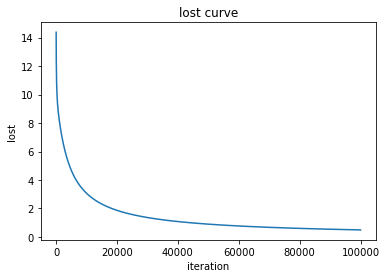

In [14]:
plt.plot(cost)
plt.title("lost curve")
plt.xlabel("iteration")
plt.ylabel("lost")
plt.show()

In [15]:
w

array([[-19.41218682],
       [  1.92429949],
       [  8.34380866]])

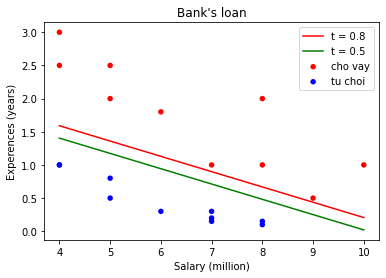

In [63]:
# draw the frontline
t = 0.9 # the acceptable rate
# the salary

plt.plot( (4,10),  (-(w[0] + w[1]*4 +np.log(1/t-t))/w[2] , -(w[0] + w[1]*10 +np.log(1/t-t))/w[2] ) ,'r',label = "t = 0.8" )

plt.plot( (4,10) , ((-w[0] - w[1]*4)/w[2] , (-w[0] - w[1]*10)/w[2] ), 'g', label = "t = 0.5" )
# Step visualize your data
plt.scatter(x[:10,0],x[:10,1],c = 'red',edgecolors = 'none',s = 30, label = 'cho vay')
plt.scatter(x[10:,0],x[10:,1],c = 'blue',edgecolors = 'none',s = 30, label = 'tu choi')
plt.legend(loc = 1)
plt.xlabel('Salary (million)')
plt.ylabel('Experences (years)')
plt.title("Bank's loan")
plt.show()

In [64]:
from sklearn.linear_model import LogisticRegression

In [68]:
# load data from csv file
data = pd.read_csv("./DL_tutorial/L2/dataset.csv").values
N,d = data.shape
x = data[:,0:d-1].reshape(-1,d-1)
y = data[:,d-1].reshape(-1,1)

In [70]:
# create a logistic regression model
logreg  =LogisticRegression()
logreg.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
wg = np.zeros((3,1))

In [72]:
logreg.intercept_

array([-6.4390718])

In [73]:
logreg.coef_

array([[0.66716139, 2.09426755]])

In [86]:
wg[0] = logreg.intercept_
wg[1:,:] = logreg.coef_.reshape(-1,1)

In [87]:
wg

array([[-6.4390718 ],
       [ 0.66716139],
       [ 2.09426755]])

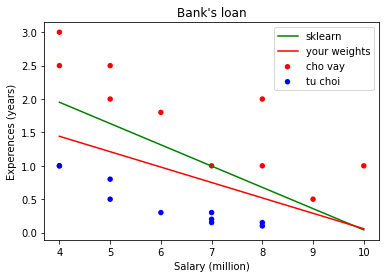

In [94]:
# draw the frontline
t = 0.7 # the acceptable rate
# the salary

plt.plot( (4,10),  (-(wg[0] + wg[1]*4 +np.log(1/t-t))/wg[2] , -(wg[0] + wg[1]*10 +np.log(1/t-t))/wg[2] ) ,'g',label = "sklearn")

plt.plot( (4,10),  (-(w[0] + w[1]*4 +np.log(1/t-t))/w[2] , -(w[0] + w[1]*10 +np.log(1/t-t))/w[2] ) ,'r',label = "your weights")


#plt.plot( (4,10) , ((-w[0] - w[1]*4)/w[2] , (-w[0] - w[1]*10)/w[2] ), 'g', label = "t = 0.5" )
# Step visualize your data
plt.scatter(x[:10,0],x[:10,1],c = 'red',edgecolors = 'none',s = 30, label = 'cho vay')
plt.scatter(x[10:,0],x[10:,1],c = 'blue',edgecolors = 'none',s = 30, label = 'tu choi')
plt.legend(loc = 1)
plt.xlabel('Salary (million)')
plt.ylabel('Experences (years)')
plt.title("Bank's loan")
plt.show()

In [95]:
# save your weight
np.savez('w logistic.npz', a = logreg.intercept_,b = logreg.coef_)

In [96]:
# Load weights use numpy.load() file '.npz'
k = np.load('w logistic.npz')

In [98]:
logreg.intercept_ = k['a'] 

array([-6.4390718])

In [99]:
logreg.coef_ = k['b']

In [101]:
data

array([[10.  ,  1.  ,  1.  ],
       [ 5.  ,  2.  ,  1.  ],
       [ 6.  ,  1.8 ,  1.  ],
       [ 7.  ,  1.  ,  1.  ],
       [ 8.  ,  2.  ,  1.  ],
       [ 9.  ,  0.5 ,  1.  ],
       [ 4.  ,  3.  ,  1.  ],
       [ 5.  ,  2.5 ,  1.  ],
       [ 8.  ,  1.  ,  1.  ],
       [ 4.  ,  2.5 ,  1.  ],
       [ 8.  ,  0.1 ,  0.  ],
       [ 7.  ,  0.15,  0.  ],
       [ 4.  ,  1.  ,  0.  ],
       [ 5.  ,  0.8 ,  0.  ],
       [ 7.  ,  0.3 ,  0.  ],
       [ 4.  ,  1.  ,  0.  ],
       [ 5.  ,  0.5 ,  0.  ],
       [ 6.  ,  0.3 ,  0.  ],
       [ 7.  ,  0.2 ,  0.  ],
       [ 8.  ,  0.15,  0.  ]])

In [106]:
data = np.array([
                [0,1,0],
                [1,0,0],
                [0,0,1],
                [1,1,1],
                 ]
                )
data

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 1, 1]])

In [107]:
N,d = data.shape

In [109]:
x = data[:,0:d-1].reshape(-1,d-1)
y = data[:,d-1].reshape(-1,1)

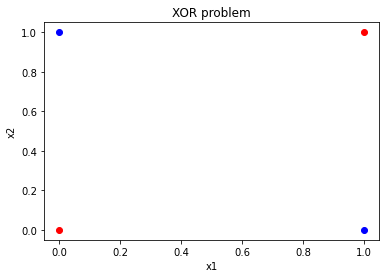

In [112]:
plt.scatter(x[0:2,0],x[0:2,1],c= 'b')
plt.scatter(x[2:,0],x[2:,1],c= 'r')
plt.title("XOR problem")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [115]:
X = np.c_[np.ones((N,1)),x]


array([[1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 1., 1.]])

In [116]:
iteration =10000
cost = np.zeros((iteration,1))
learning_rate = 0.02
w = np.array([[0.],[0.1],[0.1]])#.reshape(-1,1)

for i in range(iteration):
    # calcualate all predict
    y_predict = sigmoid(X @ w)
    res = y_predict - y
    cost[i] = -np.sum((y*np.log(y_predict) + (1-y)*np.log(1 - y_predict)))
    
    # Gradient descent
    #theta[0] = theta[0] - learning_rate * (1/N) * np.sum(res)
    #theta[1] = theta[1] - learning_rate * (1/N) * np.sum(np.multiply(res,x1))
    #theta[2] = theta[2] - learning_rate * (1/N) * np.sum(np.multiply(res,x2))
    
    for j in range(len(w)):
        w[j] = w[j] - learning_rate * 1/N * np.sum((y_predict - y)*X[:,j].reshape(-1,1))
    
    #w = w - learning_rate * 1/N * X.T @ (y_predict - y) # auto sum each time you
    print(i,cost[i])

0 [2.78007937]
1 [2.77997402]
2 [2.77987031]
3 [2.77976822]
4 [2.77966772]
5 [2.77956879]
6 [2.77947139]
7 [2.77937551]
8 [2.77928113]
9 [2.77918822]
10 [2.77909675]
11 [2.7790067]
12 [2.77891806]
13 [2.7788308]
14 [2.77874489]
15 [2.77866032]
16 [2.77857707]
17 [2.77849511]
18 [2.77841443]
19 [2.778335]
20 [2.7782568]
21 [2.77817982]
22 [2.77810404]
23 [2.77802943]
24 [2.77795599]
25 [2.77788368]
26 [2.7778125]
27 [2.77774242]
28 [2.77767343]
29 [2.77760551]
30 [2.77753864]
31 [2.77747282]
32 [2.77740801]
33 [2.7773442]
34 [2.77728139]
35 [2.77721955]
36 [2.77715867]
37 [2.77709873]
38 [2.77703972]
39 [2.77698162]
40 [2.77692442]
41 [2.77686811]
42 [2.77681267]
43 [2.77675808]
44 [2.77670434]
45 [2.77665143]
46 [2.77659934]
47 [2.77654806]
48 [2.77649756]
49 [2.77644784]
50 [2.7763989]
51 [2.7763507]
52 [2.77630325]
53 [2.77625654]
54 [2.77621054]
55 [2.77616525]
56 [2.77612066]
57 [2.77607675]
58 [2.77603353]
59 [2.77599096]
60 [2.77594905]
61 [2.77590779]
62 [2.77586716]
63 [2.77582

579 [2.77296071]
580 [2.77296012]
581 [2.77295953]
582 [2.77295894]
583 [2.77295835]
584 [2.77295776]
585 [2.77295717]
586 [2.77295659]
587 [2.772956]
588 [2.77295542]
589 [2.77295484]
590 [2.77295426]
591 [2.77295367]
592 [2.77295309]
593 [2.77295252]
594 [2.77295194]
595 [2.77295136]
596 [2.77295079]
597 [2.77295021]
598 [2.77294964]
599 [2.77294906]
600 [2.77294849]
601 [2.77294792]
602 [2.77294735]
603 [2.77294678]
604 [2.77294622]
605 [2.77294565]
606 [2.77294508]
607 [2.77294452]
608 [2.77294396]
609 [2.77294339]
610 [2.77294283]
611 [2.77294227]
612 [2.77294171]
613 [2.77294115]
614 [2.77294059]
615 [2.77294004]
616 [2.77293948]
617 [2.77293892]
618 [2.77293837]
619 [2.77293782]
620 [2.77293727]
621 [2.77293671]
622 [2.77293616]
623 [2.77293561]
624 [2.77293507]
625 [2.77293452]
626 [2.77293397]
627 [2.77293343]
628 [2.77293288]
629 [2.77293234]
630 [2.77293179]
631 [2.77293125]
632 [2.77293071]
633 [2.77293017]
634 [2.77292963]
635 [2.77292909]
636 [2.77292856]
637 [2.77292802]

1172 [2.77273512]
1173 [2.77273489]
1174 [2.77273466]
1175 [2.77273443]
1176 [2.77273421]
1177 [2.77273398]
1178 [2.77273375]
1179 [2.77273352]
1180 [2.77273329]
1181 [2.77273307]
1182 [2.77273284]
1183 [2.77273262]
1184 [2.77273239]
1185 [2.77273216]
1186 [2.77273194]
1187 [2.77273171]
1188 [2.77273149]
1189 [2.77273127]
1190 [2.77273104]
1191 [2.77273082]
1192 [2.7727306]
1193 [2.77273037]
1194 [2.77273015]
1195 [2.77272993]
1196 [2.77272971]
1197 [2.77272949]
1198 [2.77272927]
1199 [2.77272905]
1200 [2.77272883]
1201 [2.77272861]
1202 [2.77272839]
1203 [2.77272817]
1204 [2.77272795]
1205 [2.77272773]
1206 [2.77272751]
1207 [2.7727273]
1208 [2.77272708]
1209 [2.77272686]
1210 [2.77272664]
1211 [2.77272643]
1212 [2.77272621]
1213 [2.772726]
1214 [2.77272578]
1215 [2.77272557]
1216 [2.77272535]
1217 [2.77272514]
1218 [2.77272492]
1219 [2.77272471]
1220 [2.7727245]
1221 [2.77272428]
1222 [2.77272407]
1223 [2.77272386]
1224 [2.77272365]
1225 [2.77272343]
1226 [2.77272322]
1227 [2.7727230

1770 [2.77264598]
1771 [2.77264589]
1772 [2.7726458]
1773 [2.77264571]
1774 [2.77264562]
1775 [2.77264553]
1776 [2.77264544]
1777 [2.77264536]
1778 [2.77264527]
1779 [2.77264518]
1780 [2.77264509]
1781 [2.772645]
1782 [2.77264491]
1783 [2.77264482]
1784 [2.77264474]
1785 [2.77264465]
1786 [2.77264456]
1787 [2.77264447]
1788 [2.77264439]
1789 [2.7726443]
1790 [2.77264421]
1791 [2.77264412]
1792 [2.77264404]
1793 [2.77264395]
1794 [2.77264386]
1795 [2.77264378]
1796 [2.77264369]
1797 [2.7726436]
1798 [2.77264352]
1799 [2.77264343]
1800 [2.77264335]
1801 [2.77264326]
1802 [2.77264318]
1803 [2.77264309]
1804 [2.772643]
1805 [2.77264292]
1806 [2.77264283]
1807 [2.77264275]
1808 [2.77264267]
1809 [2.77264258]
1810 [2.7726425]
1811 [2.77264241]
1812 [2.77264233]
1813 [2.77264224]
1814 [2.77264216]
1815 [2.77264208]
1816 [2.77264199]
1817 [2.77264191]
1818 [2.77264182]
1819 [2.77264174]
1820 [2.77264166]
1821 [2.77264158]
1822 [2.77264149]
1823 [2.77264141]
1824 [2.77264133]
1825 [2.77264124]


2396 [2.77261015]
2397 [2.77261012]
2398 [2.77261009]
2399 [2.77261005]
2400 [2.77261002]
2401 [2.77260999]
2402 [2.77260995]
2403 [2.77260992]
2404 [2.77260989]
2405 [2.77260985]
2406 [2.77260982]
2407 [2.77260979]
2408 [2.77260975]
2409 [2.77260972]
2410 [2.77260969]
2411 [2.77260965]
2412 [2.77260962]
2413 [2.77260959]
2414 [2.77260956]
2415 [2.77260952]
2416 [2.77260949]
2417 [2.77260946]
2418 [2.77260943]
2419 [2.77260939]
2420 [2.77260936]
2421 [2.77260933]
2422 [2.7726093]
2423 [2.77260926]
2424 [2.77260923]
2425 [2.7726092]
2426 [2.77260917]
2427 [2.77260914]
2428 [2.7726091]
2429 [2.77260907]
2430 [2.77260904]
2431 [2.77260901]
2432 [2.77260898]
2433 [2.77260894]
2434 [2.77260891]
2435 [2.77260888]
2436 [2.77260885]
2437 [2.77260882]
2438 [2.77260879]
2439 [2.77260875]
2440 [2.77260872]
2441 [2.77260869]
2442 [2.77260866]
2443 [2.77260863]
2444 [2.7726086]
2445 [2.77260857]
2446 [2.77260854]
2447 [2.7726085]
2448 [2.77260847]
2449 [2.77260844]
2450 [2.77260841]
2451 [2.7726083

2984 [2.77259724]
2985 [2.77259722]
2986 [2.77259721]
2987 [2.7725972]
2988 [2.77259718]
2989 [2.77259717]
2990 [2.77259716]
2991 [2.77259714]
2992 [2.77259713]
2993 [2.77259712]
2994 [2.7725971]
2995 [2.77259709]
2996 [2.77259708]
2997 [2.77259706]
2998 [2.77259705]
2999 [2.77259704]
3000 [2.77259703]
3001 [2.77259701]
3002 [2.772597]
3003 [2.77259699]
3004 [2.77259697]
3005 [2.77259696]
3006 [2.77259695]
3007 [2.77259693]
3008 [2.77259692]
3009 [2.77259691]
3010 [2.7725969]
3011 [2.77259688]
3012 [2.77259687]
3013 [2.77259686]
3014 [2.77259684]
3015 [2.77259683]
3016 [2.77259682]
3017 [2.77259681]
3018 [2.77259679]
3019 [2.77259678]
3020 [2.77259677]
3021 [2.77259676]
3022 [2.77259674]
3023 [2.77259673]
3024 [2.77259672]
3025 [2.77259671]
3026 [2.77259669]
3027 [2.77259668]
3028 [2.77259667]
3029 [2.77259666]
3030 [2.77259664]
3031 [2.77259663]
3032 [2.77259662]
3033 [2.77259661]
3034 [2.77259659]
3035 [2.77259658]
3036 [2.77259657]
3037 [2.77259656]
3038 [2.77259654]
3039 [2.7725965

3644 [2.77259174]
3645 [2.77259174]
3646 [2.77259173]
3647 [2.77259173]
3648 [2.77259172]
3649 [2.77259172]
3650 [2.77259171]
3651 [2.77259171]
3652 [2.77259171]
3653 [2.7725917]
3654 [2.7725917]
3655 [2.77259169]
3656 [2.77259169]
3657 [2.77259168]
3658 [2.77259168]
3659 [2.77259167]
3660 [2.77259167]
3661 [2.77259166]
3662 [2.77259166]
3663 [2.77259165]
3664 [2.77259165]
3665 [2.77259165]
3666 [2.77259164]
3667 [2.77259164]
3668 [2.77259163]
3669 [2.77259163]
3670 [2.77259162]
3671 [2.77259162]
3672 [2.77259161]
3673 [2.77259161]
3674 [2.7725916]
3675 [2.7725916]
3676 [2.7725916]
3677 [2.77259159]
3678 [2.77259159]
3679 [2.77259158]
3680 [2.77259158]
3681 [2.77259157]
3682 [2.77259157]
3683 [2.77259156]
3684 [2.77259156]
3685 [2.77259155]
3686 [2.77259155]
3687 [2.77259155]
3688 [2.77259154]
3689 [2.77259154]
3690 [2.77259153]
3691 [2.77259153]
3692 [2.77259152]
3693 [2.77259152]
3694 [2.77259152]
3695 [2.77259151]
3696 [2.77259151]
3697 [2.7725915]
3698 [2.7725915]
3699 [2.77259149]

4281 [2.77258983]
4282 [2.77258983]
4283 [2.77258983]
4284 [2.77258983]
4285 [2.77258983]
4286 [2.77258982]
4287 [2.77258982]
4288 [2.77258982]
4289 [2.77258982]
4290 [2.77258982]
4291 [2.77258982]
4292 [2.77258981]
4293 [2.77258981]
4294 [2.77258981]
4295 [2.77258981]
4296 [2.77258981]
4297 [2.77258981]
4298 [2.7725898]
4299 [2.7725898]
4300 [2.7725898]
4301 [2.7725898]
4302 [2.7725898]
4303 [2.7725898]
4304 [2.77258979]
4305 [2.77258979]
4306 [2.77258979]
4307 [2.77258979]
4308 [2.77258979]
4309 [2.77258979]
4310 [2.77258978]
4311 [2.77258978]
4312 [2.77258978]
4313 [2.77258978]
4314 [2.77258978]
4315 [2.77258978]
4316 [2.77258977]
4317 [2.77258977]
4318 [2.77258977]
4319 [2.77258977]
4320 [2.77258977]
4321 [2.77258977]
4322 [2.77258976]
4323 [2.77258976]
4324 [2.77258976]
4325 [2.77258976]
4326 [2.77258976]
4327 [2.77258976]
4328 [2.77258975]
4329 [2.77258975]
4330 [2.77258975]
4331 [2.77258975]
4332 [2.77258975]
4333 [2.77258975]
4334 [2.77258974]
4335 [2.77258974]
4336 [2.77258974

4880 [2.77258916]
4881 [2.77258916]
4882 [2.77258915]
4883 [2.77258915]
4884 [2.77258915]
4885 [2.77258915]
4886 [2.77258915]
4887 [2.77258915]
4888 [2.77258915]
4889 [2.77258915]
4890 [2.77258915]
4891 [2.77258915]
4892 [2.77258915]
4893 [2.77258915]
4894 [2.77258915]
4895 [2.77258915]
4896 [2.77258915]
4897 [2.77258914]
4898 [2.77258914]
4899 [2.77258914]
4900 [2.77258914]
4901 [2.77258914]
4902 [2.77258914]
4903 [2.77258914]
4904 [2.77258914]
4905 [2.77258914]
4906 [2.77258914]
4907 [2.77258914]
4908 [2.77258914]
4909 [2.77258914]
4910 [2.77258914]
4911 [2.77258914]
4912 [2.77258913]
4913 [2.77258913]
4914 [2.77258913]
4915 [2.77258913]
4916 [2.77258913]
4917 [2.77258913]
4918 [2.77258913]
4919 [2.77258913]
4920 [2.77258913]
4921 [2.77258913]
4922 [2.77258913]
4923 [2.77258913]
4924 [2.77258913]
4925 [2.77258913]
4926 [2.77258913]
4927 [2.77258913]
4928 [2.77258912]
4929 [2.77258912]
4930 [2.77258912]
4931 [2.77258912]
4932 [2.77258912]
4933 [2.77258912]
4934 [2.77258912]
4935 [2.77

5373 [2.77258892]
5374 [2.77258892]
5375 [2.77258892]
5376 [2.77258892]
5377 [2.77258892]
5378 [2.77258892]
5379 [2.77258892]
5380 [2.77258892]
5381 [2.77258892]
5382 [2.77258892]
5383 [2.77258892]
5384 [2.77258892]
5385 [2.77258892]
5386 [2.77258892]
5387 [2.77258892]
5388 [2.77258892]
5389 [2.77258892]
5390 [2.77258892]
5391 [2.77258892]
5392 [2.77258892]
5393 [2.77258892]
5394 [2.77258892]
5395 [2.77258892]
5396 [2.77258892]
5397 [2.77258891]
5398 [2.77258891]
5399 [2.77258891]
5400 [2.77258891]
5401 [2.77258891]
5402 [2.77258891]
5403 [2.77258891]
5404 [2.77258891]
5405 [2.77258891]
5406 [2.77258891]
5407 [2.77258891]
5408 [2.77258891]
5409 [2.77258891]
5410 [2.77258891]
5411 [2.77258891]
5412 [2.77258891]
5413 [2.77258891]
5414 [2.77258891]
5415 [2.77258891]
5416 [2.77258891]
5417 [2.77258891]
5418 [2.77258891]
5419 [2.77258891]
5420 [2.77258891]
5421 [2.77258891]
5422 [2.77258891]
5423 [2.77258891]
5424 [2.77258891]
5425 [2.77258891]
5426 [2.77258891]
5427 [2.77258891]
5428 [2.77

6208 [2.77258878]
6209 [2.77258878]
6210 [2.77258878]
6211 [2.77258878]
6212 [2.77258878]
6213 [2.77258878]
6214 [2.77258878]
6215 [2.77258878]
6216 [2.77258878]
6217 [2.77258878]
6218 [2.77258878]
6219 [2.77258878]
6220 [2.77258878]
6221 [2.77258878]
6222 [2.77258878]
6223 [2.77258877]
6224 [2.77258877]
6225 [2.77258877]
6226 [2.77258877]
6227 [2.77258877]
6228 [2.77258877]
6229 [2.77258877]
6230 [2.77258877]
6231 [2.77258877]
6232 [2.77258877]
6233 [2.77258877]
6234 [2.77258877]
6235 [2.77258877]
6236 [2.77258877]
6237 [2.77258877]
6238 [2.77258877]
6239 [2.77258877]
6240 [2.77258877]
6241 [2.77258877]
6242 [2.77258877]
6243 [2.77258877]
6244 [2.77258877]
6245 [2.77258877]
6246 [2.77258877]
6247 [2.77258877]
6248 [2.77258877]
6249 [2.77258877]
6250 [2.77258877]
6251 [2.77258877]
6252 [2.77258877]
6253 [2.77258877]
6254 [2.77258877]
6255 [2.77258877]
6256 [2.77258877]
6257 [2.77258877]
6258 [2.77258877]
6259 [2.77258877]
6260 [2.77258877]
6261 [2.77258877]
6262 [2.77258877]
6263 [2.77

6880 [2.77258874]
6881 [2.77258874]
6882 [2.77258874]
6883 [2.77258874]
6884 [2.77258874]
6885 [2.77258874]
6886 [2.77258874]
6887 [2.77258874]
6888 [2.77258874]
6889 [2.77258874]
6890 [2.77258874]
6891 [2.77258874]
6892 [2.77258874]
6893 [2.77258874]
6894 [2.77258874]
6895 [2.77258874]
6896 [2.77258874]
6897 [2.77258874]
6898 [2.77258874]
6899 [2.77258874]
6900 [2.77258874]
6901 [2.77258874]
6902 [2.77258874]
6903 [2.77258874]
6904 [2.77258874]
6905 [2.77258874]
6906 [2.77258874]
6907 [2.77258874]
6908 [2.77258874]
6909 [2.77258874]
6910 [2.77258874]
6911 [2.77258874]
6912 [2.77258874]
6913 [2.77258874]
6914 [2.77258874]
6915 [2.77258874]
6916 [2.77258874]
6917 [2.77258874]
6918 [2.77258874]
6919 [2.77258874]
6920 [2.77258874]
6921 [2.77258874]
6922 [2.77258874]
6923 [2.77258874]
6924 [2.77258874]
6925 [2.77258874]
6926 [2.77258874]
6927 [2.77258874]
6928 [2.77258874]
6929 [2.77258874]
6930 [2.77258874]
6931 [2.77258874]
6932 [2.77258874]
6933 [2.77258874]
6934 [2.77258874]
6935 [2.77

7402 [2.77258873]
7403 [2.77258873]
7404 [2.77258873]
7405 [2.77258873]
7406 [2.77258873]
7407 [2.77258873]
7408 [2.77258873]
7409 [2.77258873]
7410 [2.77258873]
7411 [2.77258873]
7412 [2.77258873]
7413 [2.77258873]
7414 [2.77258873]
7415 [2.77258873]
7416 [2.77258873]
7417 [2.77258873]
7418 [2.77258873]
7419 [2.77258873]
7420 [2.77258873]
7421 [2.77258873]
7422 [2.77258873]
7423 [2.77258873]
7424 [2.77258873]
7425 [2.77258873]
7426 [2.77258873]
7427 [2.77258873]
7428 [2.77258873]
7429 [2.77258873]
7430 [2.77258873]
7431 [2.77258873]
7432 [2.77258873]
7433 [2.77258873]
7434 [2.77258873]
7435 [2.77258873]
7436 [2.77258873]
7437 [2.77258873]
7438 [2.77258873]
7439 [2.77258873]
7440 [2.77258873]
7441 [2.77258873]
7442 [2.77258873]
7443 [2.77258873]
7444 [2.77258873]
7445 [2.77258873]
7446 [2.77258873]
7447 [2.77258873]
7448 [2.77258873]
7449 [2.77258873]
7450 [2.77258873]
7451 [2.77258873]
7452 [2.77258873]
7453 [2.77258873]
7454 [2.77258873]
7455 [2.77258873]
7456 [2.77258873]
7457 [2.77

7956 [2.77258873]
7957 [2.77258873]
7958 [2.77258873]
7959 [2.77258873]
7960 [2.77258873]
7961 [2.77258873]
7962 [2.77258873]
7963 [2.77258873]
7964 [2.77258873]
7965 [2.77258873]
7966 [2.77258873]
7967 [2.77258873]
7968 [2.77258873]
7969 [2.77258873]
7970 [2.77258873]
7971 [2.77258873]
7972 [2.77258873]
7973 [2.77258873]
7974 [2.77258873]
7975 [2.77258873]
7976 [2.77258873]
7977 [2.77258873]
7978 [2.77258873]
7979 [2.77258873]
7980 [2.77258873]
7981 [2.77258873]
7982 [2.77258873]
7983 [2.77258873]
7984 [2.77258873]
7985 [2.77258873]
7986 [2.77258873]
7987 [2.77258873]
7988 [2.77258873]
7989 [2.77258873]
7990 [2.77258873]
7991 [2.77258873]
7992 [2.77258873]
7993 [2.77258873]
7994 [2.77258873]
7995 [2.77258873]
7996 [2.77258873]
7997 [2.77258873]
7998 [2.77258873]
7999 [2.77258873]
8000 [2.77258873]
8001 [2.77258873]
8002 [2.77258873]
8003 [2.77258873]
8004 [2.77258873]
8005 [2.77258873]
8006 [2.77258873]
8007 [2.77258873]
8008 [2.77258873]
8009 [2.77258873]
8010 [2.77258873]
8011 [2.77

8540 [2.77258872]
8541 [2.77258872]
8542 [2.77258872]
8543 [2.77258872]
8544 [2.77258872]
8545 [2.77258872]
8546 [2.77258872]
8547 [2.77258872]
8548 [2.77258872]
8549 [2.77258872]
8550 [2.77258872]
8551 [2.77258872]
8552 [2.77258872]
8553 [2.77258872]
8554 [2.77258872]
8555 [2.77258872]
8556 [2.77258872]
8557 [2.77258872]
8558 [2.77258872]
8559 [2.77258872]
8560 [2.77258872]
8561 [2.77258872]
8562 [2.77258872]
8563 [2.77258872]
8564 [2.77258872]
8565 [2.77258872]
8566 [2.77258872]
8567 [2.77258872]
8568 [2.77258872]
8569 [2.77258872]
8570 [2.77258872]
8571 [2.77258872]
8572 [2.77258872]
8573 [2.77258872]
8574 [2.77258872]
8575 [2.77258872]
8576 [2.77258872]
8577 [2.77258872]
8578 [2.77258872]
8579 [2.77258872]
8580 [2.77258872]
8581 [2.77258872]
8582 [2.77258872]
8583 [2.77258872]
8584 [2.77258872]
8585 [2.77258872]
8586 [2.77258872]
8587 [2.77258872]
8588 [2.77258872]
8589 [2.77258872]
8590 [2.77258872]
8591 [2.77258872]
8592 [2.77258872]
8593 [2.77258872]
8594 [2.77258872]
8595 [2.77

9134 [2.77258872]
9135 [2.77258872]
9136 [2.77258872]
9137 [2.77258872]
9138 [2.77258872]
9139 [2.77258872]
9140 [2.77258872]
9141 [2.77258872]
9142 [2.77258872]
9143 [2.77258872]
9144 [2.77258872]
9145 [2.77258872]
9146 [2.77258872]
9147 [2.77258872]
9148 [2.77258872]
9149 [2.77258872]
9150 [2.77258872]
9151 [2.77258872]
9152 [2.77258872]
9153 [2.77258872]
9154 [2.77258872]
9155 [2.77258872]
9156 [2.77258872]
9157 [2.77258872]
9158 [2.77258872]
9159 [2.77258872]
9160 [2.77258872]
9161 [2.77258872]
9162 [2.77258872]
9163 [2.77258872]
9164 [2.77258872]
9165 [2.77258872]
9166 [2.77258872]
9167 [2.77258872]
9168 [2.77258872]
9169 [2.77258872]
9170 [2.77258872]
9171 [2.77258872]
9172 [2.77258872]
9173 [2.77258872]
9174 [2.77258872]
9175 [2.77258872]
9176 [2.77258872]
9177 [2.77258872]
9178 [2.77258872]
9179 [2.77258872]
9180 [2.77258872]
9181 [2.77258872]
9182 [2.77258872]
9183 [2.77258872]
9184 [2.77258872]
9185 [2.77258872]
9186 [2.77258872]
9187 [2.77258872]
9188 [2.77258872]
9189 [2.77

9709 [2.77258872]
9710 [2.77258872]
9711 [2.77258872]
9712 [2.77258872]
9713 [2.77258872]
9714 [2.77258872]
9715 [2.77258872]
9716 [2.77258872]
9717 [2.77258872]
9718 [2.77258872]
9719 [2.77258872]
9720 [2.77258872]
9721 [2.77258872]
9722 [2.77258872]
9723 [2.77258872]
9724 [2.77258872]
9725 [2.77258872]
9726 [2.77258872]
9727 [2.77258872]
9728 [2.77258872]
9729 [2.77258872]
9730 [2.77258872]
9731 [2.77258872]
9732 [2.77258872]
9733 [2.77258872]
9734 [2.77258872]
9735 [2.77258872]
9736 [2.77258872]
9737 [2.77258872]
9738 [2.77258872]
9739 [2.77258872]
9740 [2.77258872]
9741 [2.77258872]
9742 [2.77258872]
9743 [2.77258872]
9744 [2.77258872]
9745 [2.77258872]
9746 [2.77258872]
9747 [2.77258872]
9748 [2.77258872]
9749 [2.77258872]
9750 [2.77258872]
9751 [2.77258872]
9752 [2.77258872]
9753 [2.77258872]
9754 [2.77258872]
9755 [2.77258872]
9756 [2.77258872]
9757 [2.77258872]
9758 [2.77258872]
9759 [2.77258872]
9760 [2.77258872]
9761 [2.77258872]
9762 [2.77258872]
9763 [2.77258872]
9764 [2.77

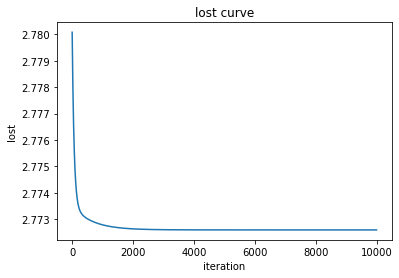

In [118]:
plt.plot(cost)
plt.title("lost curve")
plt.xlabel("iteration")
plt.ylabel("lost")
plt.show()

In [119]:
# create a logistic regression model
logreg  =LogisticRegression()
logreg.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
logreg.intercept_

array([0.])

In [122]:
logreg.coef_

array([[0., 0.]])

In [123]:
import numpy as np 
import h5py 

In [125]:
def load_dataset(path):
    # load train dataset
    train_dataset = h5py.File(path + '/train_catvnoncat.h5','r')
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train labels
    # load test dataset
    test_dataset = h5py.File(path + '/test_catvnoncat.h5','r')
    test_set_x_orig = np.array(test_dataset['test_set_x'][:]) # your test set features
    test_set_y_orig = np.array(test_dataset['test_set_y'][:]) # your test set labels
    # laod label
    classes = np.array(test_dataset['list_classes'][:]) # the list of classes
    return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes

In [135]:
train_dataset = h5py.File('./ML03-LocCH-assignment03/datasets/train_catvnoncat.h5','r')
dir(train_dataset)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_d',
 '_e',
 '_gcpl_crt_order',
 '_id',
 '_ipython_key_completions_',
 '_lapl',
 '_lcpl',
 '_libver',
 'attrs',
 'clear',
 'close',
 'copy',
 'create_dataset',
 'create_dataset_like',
 'create_group',
 'create_virtual_dataset',
 'driver',
 'file',
 'filename',
 'flush',
 'get',
 'id',
 'items',
 'keys',
 'libver',
 'mode',
 'move',
 'name',
 'pare

In [126]:
train_set_x,train_set_y,test_set_x,test_set_y,classes = load_dataset('./ML03-LocCH-assignment03/datasets')

In [132]:
print(f'train_set_x: {train_set_x.shape}')
print(f'train_set_y: {train_set_x.shape}')
print(f'test_set_x: {test_set_x.shape}')
print(f'test_set_y: {test_set_x.shape}')

train_set_x: (209, 64, 64, 3)
train_set_y: (209, 64, 64, 3)
test_set_x: (50, 64, 64, 3)
test_set_y: (50, 64, 64, 3)


# Logistic Regression with a Neural Network mindset

Welcome to your first (required) programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.


## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [7]:
def load_dataset(path):
    # load train dataset
    train_dataset = h5py.File(path + '/train_catvnoncat.h5','r')
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train labels
    # load test dataset
    test_dataset = h5py.File(path + '/test_catvnoncat.h5','r')
    test_set_x_orig = np.array(test_dataset['test_set_x'][:]) # your test set features
    test_set_y_orig = np.array(test_dataset['test_set_y'][:]) # your test set labels
    # laod label
    classes = np.array(test_dataset['list_classes'][:]) # the list of classes
    return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import h5py 

In [9]:
train_set_x,train_set_y,test_set_x,test_set_y,classes = load_dataset('./ML03-LocCH-assignment03/datasets')

In [10]:
print(f'train_set_x: {train_set_x.shape}')
print(f'train_set_y: {train_set_x.shape}')
print(f'test_set_x: {test_set_x.shape}')
print(f'test_set_y: {test_set_x.shape}')

train_set_x: (209, 64, 64, 3)
train_set_y: (209, 64, 64, 3)
test_set_x: (50, 64, 64, 3)
test_set_y: (50, 64, 64, 3)


## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

In [11]:
print(test_set_y.shape)
test_set_y

(50,)


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0], dtype=int64)

In [12]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [14]:
index = 24
np.squeeze(train_set_y[index])

1

In [15]:
np.squeeze(train_set_x_orig[index]).shape

(64, 64, 3)

In [16]:
classes[train_set_y[index]].decode('utf-8')

'cat'

y = 1, it's a cat picture


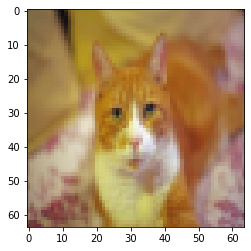

In [17]:
index = 24
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[index]) + ", it's a " + classes[np.squeeze(train_set_y[index])].decode('utf-8') + ' picture')

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [18]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [19]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of the training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))

Number of the training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>

For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [21]:
img = train_set_x_orig[0]
img_flatten = img.reshape(img.shape[0]*img.shape[1]*img.shape[2],1)
print(img_flatten)
print(img_flatten.shape)

[[17]
 [31]
 [56]
 ...
 [ 0]
 [ 0]
 [ 0]]
(12288, 1)


In [22]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [75]:
# Reshape the training and test examples 
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
train_set_y = train_set_y.reshape(1,-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
test_set_y = test_set_y.reshape(1,-1)
print("train_set_x flatten shape: " + str(train_set_x_flatten.shape))
print("test_set_x flatten shape: " + str(test_set_x_flatten.shape))
print("train_set_y shape:" + str(train_set_y.shape))
print("test_set_y shape:" + str(test_set_y.shape))
print("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x flatten shape: (12288, 209)
test_set_x flatten shape: (12288, 50)
train_set_y shape:(1, 209)
test_set_y shape:(1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [76]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="./ML03-LocCH-assignment03/images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [45]:
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size
    Return:
    s -- sigmoid(z)
    '''
    s = np.power((1+np.exp(-z)),-1)
    return s

In [46]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

 $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [47]:
# GRADED FUNCTION: initialize_with_zeros
def initialize_with_zeros(dim):
    '''
    This function creates a vector of zeros of shape (dim,1) for w and initializes b to 0.
    Argument:
    dim --size of w vector we want (or number of parameters in this case)
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initialized scalar (corresponds to bias)
    '''
    w = np.zeros((dim,1))
    b = 0
    
    assert (w.shape == (dim,1)), f'w.shape {dim,1}' # print out w if error
    assert (isinstance(b,float) or isinstance(b,int)) # print out b if error
    
    return w,b

In [48]:
dim = 2
w,b = initialize_with_zeros(dim)
print("w= " + str(w))
print("b= " + str(b))

w= [[0.]
 [0.]]
b= 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$
 
For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


In [50]:
w,b = initialize_with_zeros(train_set_x_flatten.shape[0])
print(f"w {w.shape}")
print(b)

w (12288, 1)
0


In [51]:
train_set_x.shape

(209, 64, 64, 3)

In [53]:
# calculate your hypothesis
A = sigmoid(w.T @ train_set_x_flatten + b)
A.shape

(1, 209)

In [54]:
m = train_set_y.shape[-1]
# caculate the lost function 
L = -1/m*np.sum(train_set_y*np.log(A) + (1-train_set_y)*np.log(1-A))
L

0.6931471805599453

In [56]:
print(f'train_set_x_flatten {train_set_x_flatten.shape}')
print(f'A shape {A.shape}')
# calculate the derivative
dLw = 1/m * train_set_x_flatten @ (A - train_set_y).T
print(f'dLw {dLw.shape}')
dLb = 1/m * np.sum(A - train_set_y)
print(f'dLb {dLb}')

train_set_x_flatten (12288, 209)
A shape (1, 209)
dLw (12288, 1)
dLb 0.15550239234449761


In [114]:
# calculate the propagate(w,b,X,Y)
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation explained above
    Arguments:
    w -- weights, a numpy of size (num_px * num_py * 3,1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true 'label' vector (containing 0 if non-cat,1 if cat) of size (1, number of examples)
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape b
    Tips:
    - Write your code step by step for propagration, np.log(), np.dot()
    '''
    m = X.shape[1]
    
    # forward propagation (from x to cost)
    pred = sigmoid(np.matmul(w.T,X) + b) # a.shape must be (1,m)
    #cost = -( Y * np.log(pred) + (1-Y) * np.log(1-pred))
    cost = -np.multiply(Y,np.log(pred))-np.multiply(1-Y, np.log(1-pred))
    cost = np.mean(cost) # 1/m * np.sum(cost)
    
    #backward propagation (to find grad)
    res = sigmoid(w.T @ X + b)-Y # (1,n_sample)
    dw = 1/m * X @ res.T # calculate gradient (w*h*3,1)
    db = 1/m * np.sum(res) 
    
    assert (dw.shape == w.shape),f'dw and w does not in the same shape'
    assert (db.dtype == float),f'db is not float number'
    cost = np.squeeze(cost)
    
    grads = {"dw":dw,
             "db":db}
    
    return grads,cost

In [60]:
w,b = initialize_with_zeros(train_set_x_flatten.shape[0])
# test your propagate function
grads , cost = propagate(w,b,train_set_x_flatten,train_set_y)
print(w.shape)
print(grads['dw'].shape)
print(grads['db'])

(12288, 1)
(12288, 1)
0.15550239234449761


In [61]:
cost

0.6931471805599453

In [62]:
# test your function again
w,b,X,Y = np.array([[1.],[2.]]) ,2. ,np.array([[1,2,-1],[3,4,-3.2]]), np.array([1,0,1])
grads, cost = propagate(w,b,X,Y)
print("dw = " + str(grads['dw']))
print("db = " + str(grads['db']))
print("cost= " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost= 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [25]:
# create a function to optimize
def optimize(w,b,X,Y,num_iterations, learning_rate, print_cost = False):
    '''
    This function optimizes w and b by running a gradient descent algorithm
    Arguments:
    w -- weights, a numpy of size (num_px * num_py * 3,1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true 'label' vector (containing 0 if non-cat,1 if cat) of size (1, number of examples)
    num_iterations -- learning_rate of the gradient descent update rule
    learning_rate -- learning_rate of the gradient descent rule
    print_cost -- True to print the loss every 100 steps
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradient of weights, and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learing_rate
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters, Use propagate().
        2) Update the parameters using gradient descent rule for w and b
    '''
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads,cost = propagate(w,b,X,Y)
        # Retrieve derivatives from grads
        dw = grads['dw']
        db = grads['db']
        # Update rule, tips Use the gradient descent update equation
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost after iteration %i: %f" %(i,cost))
        
        params = {"w":w,
                 "b":b}
        
        grads = {"dw":dw,
                "db":db}
    
    return params, grads, costs

In [63]:
params,grads,costs = optimize(w,b,X,Y,num_iterations = 100, learning_rate = 0.009,print_cost = False)

print(f"w = {params['w']}")
print(f"b = {params['b']}")
print(f"dw = {grads['dw']}")
print(f"db = {grads['db']}")

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591]
 [ 0.12259159]] </td>
    </tr>    
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042]
 [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>

</table>

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [68]:
# prediction

def predict(w,b,X,confident=0.6):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w,b)
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3,1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    confident -- the rate to decide your prediction is true or not
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1) # (w*h*3,1)
    
    #Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.matmul(w.T,X)+b)
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > confident:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    assert(Y_prediction.shape == (1,m)),f"the shape of Y_prediction is not correct {Y_prediction.shape}"
    return Y_prediction    

In [69]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[0. 0. 0.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
    
- Optimize the loss iteratively to learn parameters (w,b):
    
    - computing the cost and its gradient 
    - updating the parameters using gradient descent

- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [111]:
def model(X_train,y_train,X_test,y_test,num_iterations = 1000,learning_rate = 0.3, confident = 0.55,print_cost = True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # initialize weight and bias
    dim,m = X_train.shape
    w,b = initialize_with_zeros(dim)
    # optimize (train) your model
    params,grads,costs = optimize(w,b,X_train,y_train,num_iterations,learning_rate,print_cost = print_cost)
    # retrieve parameters w and b from dictionary "parameters"
    w = params['w']
    b = params['b']
    # predict
    y_prediction_train = predict(w,b,X_train)
    y_prediction_test = predict(w,b,X_test)
    # print train and test errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100 ))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100 ))
    d = {"costs": costs,
            "y_prediction_train": y_prediction_train,
            "y_predcition_test": y_prediction_test,
            "w" :w,
            "b": b,
            "learning_rate": learning_rate,
            "num_iterations": num_iterations
        }
    return d

In [112]:
# Reshape the training and test examples 
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
train_set_y = train_set_y.reshape(1,-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
test_set_y = test_set_y.reshape(1,-1)
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255
w,b = initialize_with_zeros(train_set_x_flatten.shape[0])
print("train_set_x flatten shape: " + str(train_set_x_flatten.shape))
print("test_set_x flatten shape: " + str(test_set_x_flatten.shape))
print("train_set_y shape:" + str(train_set_y.shape))
print("test_set_y shape:" + str(test_set_y.shape))
print("train_set_x.shape:" + str(train_set_x.shape))
print("test_set_x.shape:" + str(test_set_x.shape))
print("weight.shape " + str(w.shape))
print(b)

train_set_x flatten shape: (12288, 209)
test_set_x flatten shape: (12288, 50)
train_set_y shape:(1, 209)
test_set_y shape:(1, 50)
train_set_x.shape:(12288, 209)
test_set_x.shape:(12288, 50)
weight.shape (12288, 1)
0


In [116]:
d = model(train_set_x,train_set_y,test_set_x,test_set_x,num_iterations = 1000,learning_rate = 0.0003, confident = 0.55,print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.628562
Cost after iteration 200: 0.610444
Cost after iteration 300: 0.595718
Cost after iteration 400: 0.583139
Cost after iteration 500: 0.572036
Cost after iteration 600: 0.562022
Cost after iteration 700: 0.552854
Cost after iteration 800: 0.544367
Cost after iteration 900: 0.536446
train accuracy: 68.42105263157895 %
test accuracy: 57.70274011948529 %


In [261]:
class lr_model:
    '''
    Builds the logistic regression by calling the function you have implemented previously
    Arguments:
    X_train -- training set represented by numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training set labels represented by a numpy array (vector) of shape (1,m_train)
    X_test -- test set represented by a numpy array (vector) of shape (num_px * num_px * 3,m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1,m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learing_rate -- hyperp
    ''' 
    def __init__(self,w,b,X_train,y_train,X_test,y_test,learning_rate = 0.55,confident = 0.6):
        self.w = w # weight.shape (w*h*3,no_samples)
        self.b = b # float
        self.X_train = X_train # train dataset, shape (w*h*3,no_train_samples)
        self.y_train = y_train # train label shape (1,no_train_samples)
        self.X_test = X_test # test dataset,shape (w*h*3,no_test_samples)
        self.y_test = y_test # test label shape (1,no_test_samples)
        self.learning_rate = learning_rate
        self.confident = confident
        self.m = X_train[-1] # the number of samples in train dataset
    
    def propagate(self,w,b,X,y):
        """
        Implement the cost function and its gradient for the propagation explained above

        Arguments:
        w -- weights, a numpy array of size (num_px * num_px * 3, 1)
        b -- bias, a scalar
        X -- data of size (num_px * num_px * 3, number of examples)
        Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

        Return:
        cost -- negative log-likelihood cost for logistic regression
        dw -- gradient of the loss with respect to w, thus same shape as w
        db -- gradient of the loss with respect to b, thus same shape as b

        Tips:
        - Write your code step by step for the propagation. np.log(), np.dot()
        """
        m = X.shape[-1]
        # forward computing
        pred = sigmoid(w.T@X + b)
        #cost = np.multiply(y,np.log(pred))+np.multiply(1-y, np.log(1-pred))
        cost = y*np.log(pred) + (1-y)*np.log(1-pred)
        cost = -1/m * np.sum(cost)
        #backward computing
        dw = 1/m * X @ (pred - y).T
        db = 1/m * np.sum(pred - y)
        assert (dw.shape == w.shape), f'dw.shape = {dw.shape} not equal db.shape = {db.shape}'
        assert (db.dtype == float ), 'f db is not float type'
        
        grads = {"dw":dw,"db":db}
        return grads,cost
    
    def optimize(self,num_iterations = 1000,print_cost = True):
        costs = []
        for i in range(num_iterations):
            grads,cost = self.propagate(self.w,self.b,self.X_train,self.y_train)
            self.w = self.w - self.learning_rate * grads['dw'] # gradient descent weight
            self.b = self.b - self.learning_rate * grads['db'] # gradient descent bias 
            # records the costs
            if i % 100 == 0:
                costs.append(cost)
                #print cost every 100 training iterations
                if print_cost:
                    print(f"iteration: {i}, cost {cost}")
        params = {"w":self.w,"b":self.b}
        grads = {"dw":grads['dw'],"db":grads['db']}
        
        return params,grads,costs
    
    def predict(self,w,b,X):
        '''
        Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

        Arguments:
        w -- weights, a numpy array of size (num_px * num_px * 3, 1)
        b -- bias, a scalar
        X -- data of size (num_px * num_px * 3, number of examples)

        Returns:
        Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
        '''
        m = X.shape[1]
        y_prediction = np.zeros((1,m))
        #w = w.reshape(X.shape[0],1)
        # pred = sigmoid(w.T@X + b)
        pred = sigmoid(np.matmul(w.T, X) + b)
        for i in range(pred.shape[1]): # ?
            if pred[0,i] > self.confident:
                y_prediction[0][i] = 1
            else:
                y_prediction[0][i] = 0
        assert y_prediction.shape == (1,m), f'y_prediction shape {y_prediction.shape} not equal {(1,m)}'
        return y_prediction
    
    def train(self,num_iterations =1000,print_cost = True):
        # train your model with optimize with one line code
        params,grads,costs = self.optimize(num_iterations = num_iterations,print_cost = print_cost)
        # predict test,train set examples
        y_prediction_test = self.predict(self.w,self.b,self.X_test)
        y_prediction_train = self.predict(self.w,self.b,self.X_train)
        #print train test acurracy
        print("train acurracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - self.y_train)) *100))
        print("test acurracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - self.y_test)) *100))
        
        d = {
            "costs": costs,
            "y_prediction_test":y_prediction_test,
            "y_prediction_train":y_prediction_train,
            "w": self.w,
            "b": self.b,
            "learning_rate": self.learning_rate,
            "num_iteration": num_iterations
        }
        return d

In [262]:
# Reshape the training and test examples 
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
train_set_y = train_set_y.reshape(1,-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
test_set_y = test_set_y.reshape(1,-1)
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255
w,b = initialize_with_zeros(train_set_x_flatten.shape[0])
print("train_set_x flatten shape: " + str(train_set_x_flatten.shape))
print("test_set_x flatten shape: " + str(test_set_x_flatten.shape))
print("train_set_y shape:" + str(train_set_y.shape))
print("test_set_y shape:" + str(test_set_y.shape))
print("train_set_x.shape:" + str(train_set_x.shape))
print("test_set_x.shape:" + str(test_set_x.shape))
print("weight.shape " + str(w.shape))
print(b)

train_set_x flatten shape: (12288, 209)
test_set_x flatten shape: (12288, 50)
train_set_y shape:(1, 209)
test_set_y shape:(1, 50)
train_set_x.shape:(12288, 209)
test_set_x.shape:(12288, 50)
weight.shape (12288, 1)
0


In [263]:
model = lr_model(w,b,train_set_x,train_set_y,test_set_x,test_set_y,learning_rate = 0.003)

dir(model)

['X_test',
 'X_train',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'b',
 'confident',
 'learning_rate',
 'm',
 'optimize',
 'predict',
 'propagate',
 'train',
 'w',
 'y_test',
 'y_train']

In [264]:
model = lr_model(w,b,train_set_x,train_set_y,test_set_x,test_set_y,learning_rate = 0.01)

In [265]:
d = model.train(num_iterations = 2000)

iteration: 0, cost 0.6931471805599453
iteration: 100, cost 0.8239208681600069
iteration: 200, cost 0.41894369083115945
iteration: 300, cost 0.6173497064824544
iteration: 400, cost 0.5221157670131676
iteration: 500, cost 0.3877087458499993
iteration: 600, cost 0.23625445651354618
iteration: 700, cost 0.15422213305584356
iteration: 800, cost 0.13532782832700752
iteration: 900, cost 0.12497148001156157
iteration: 1000, cost 0.11647833126199675
iteration: 1100, cost 0.10919251128435022
iteration: 1200, cost 0.10280446418273721
iteration: 1300, cost 0.09712981007877623
iteration: 1400, cost 0.09204326923438938
iteration: 1500, cost 0.08745251991501822
iteration: 1600, cost 0.08328603053328595
iteration: 1700, cost 0.07948657037479961
iteration: 1800, cost 0.07600734571736632
iteration: 1900, cost 0.07280949458161191
train acurracy: 100.0 %
test acurracy: 68.0 %


In [226]:
d 

{'costs': [0.6931471805599453,
  0.8239208681600069,
  0.41894369083115945,
  0.6173497064824544,
  0.5221157670131676,
  0.3877087458499993,
  0.23625445651354618,
  0.15422213305584356,
  0.13532782832700752,
  0.12497148001156157,
  0.11647833126199675,
  0.10919251128435022,
  0.10280446418273721,
  0.09712981007877623,
  0.09204326923438938,
  0.08745251991501822,
  0.08328603053328595,
  0.07948657037479961,
  0.07600734571736632,
  0.07280949458161191],
 'y_prediction_test': array([[1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
         1., 0.]]),
 'y_prediction_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 0., 1

**Expected Output**: 

<table style="width:40%"> 
    <tr>
        <td> **Cost after iteration 0 **  </td> 
        <td> 0.693147 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>
    <tr>
        <td>**Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 

y_pred = 1.0 you predicted that is a cat


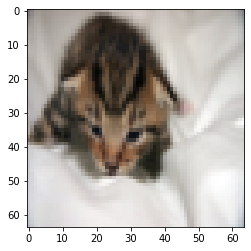

In [243]:
index = 1
plt.imshow( test_set_x[:,index].reshape((num_px,num_px,3)) )
print(f"y_pred = {d['y_prediction_test'][0,index]} you predicted that is a {classes[int(d['y_prediction_test'][0,index])].decode('utf-8')}")

In [244]:
d['costs']

[0.6931471805599453,
 0.8239208681600069,
 0.41894369083115945,
 0.6173497064824544,
 0.5221157670131676,
 0.3877087458499993,
 0.23625445651354618,
 0.15422213305584356,
 0.13532782832700752,
 0.12497148001156157,
 0.11647833126199675,
 0.10919251128435022,
 0.10280446418273721,
 0.09712981007877623,
 0.09204326923438938,
 0.08745251991501822,
 0.08328603053328595,
 0.07948657037479961,
 0.07600734571736632,
 0.07280949458161191]

In [245]:
costs =np.squeeze(d['costs'])
costs

array([0.69314718, 0.82392087, 0.41894369, 0.61734971, 0.52211577,
       0.38770875, 0.23625446, 0.15422213, 0.13532783, 0.12497148,
       0.11647833, 0.10919251, 0.10280446, 0.09712981, 0.09204327,
       0.08745252, 0.08328603, 0.07948657, 0.07600735, 0.07280949])

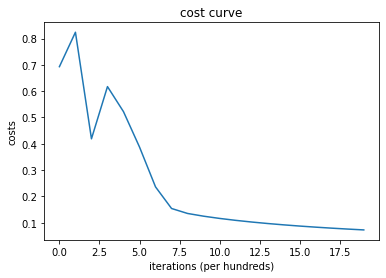

In [246]:
costs =np.squeeze(d['costs'])
plt.plot(costs)
plt.xlabel("iterations (per hundreds)")
plt.ylabel("costs")
plt.title("cost curve")
plt.show()


## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 



 train model 0 with learning_rate = 0.01
---------------------------------------------

iteration: 0, cost 0.6931471805599453
iteration: 100, cost 0.8239208681600069
iteration: 200, cost 0.41894369083115945
iteration: 300, cost 0.6173497064824544
iteration: 400, cost 0.5221157670131676
iteration: 500, cost 0.3877087458499993
iteration: 600, cost 0.23625445651354618
iteration: 700, cost 0.15422213305584356
iteration: 800, cost 0.13532782832700752
iteration: 900, cost 0.12497148001156157
iteration: 1000, cost 0.11647833126199675
iteration: 1100, cost 0.10919251128435022
iteration: 1200, cost 0.10280446418273721
iteration: 1300, cost 0.09712981007877623
iteration: 1400, cost 0.09204326923438938
iteration: 1500, cost 0.08745251991501822
iteration: 1600, cost 0.08328603053328595
iteration: 1700, cost 0.07948657037479961
iteration: 1800, cost 0.07600734571736632
iteration: 1900, cost 0.07280949458161191
train acurracy: 65.55023923444976 %
test acurracy: 36.0 %

 train model 1 with learning_

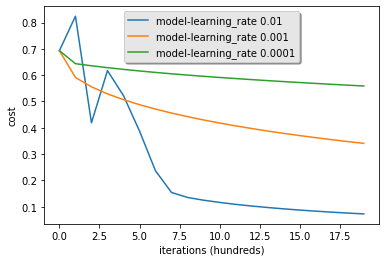

In [206]:
learning_rate = [0.01,0.001,0.0001]
models = []
dics = []

for i,alpha in enumerate(learning_rate):
    print(f"\n train model {i} with learning_rate = {alpha}")
    print("---------------------------------------------\n")
    model = lr_model(w,b,train_set_x,train_set_y,test_set_x,test_set_y,learning_rate = alpha) 
    d = model.train(num_iterations = 2000)
    dics.append(d)
    models.append(model)

for i in range(len(learning_rate)):
    plt.plot(dics[i]['costs'],label = str(f"model-learning_rate {learning_rate[i]}"))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

## 7 - Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

In [277]:
from PIL import Image

<class 'PIL.JpegImagePlugin.JpegImageFile'>


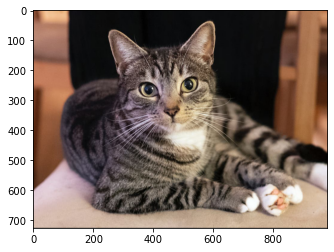

In [278]:
image = Image.open("./kitty.jpg")
print(type(image))
plt.imshow(image)

In [279]:
dir(image)

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_category',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 '_xmp',
 'alpha_composite',
 'app',
 'applist',
 'bits',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'entropy',
 'filename',
 'filter',
 'format',
 '

In [280]:
x = image.resize((num_px,num_px))

In [281]:
data = np.asarray(x)
print(data.shape)
print(data)

(64, 64, 3)
[[[127  70  46]
  [176 116  80]
  [239 186 138]
  ...
  [182 126  88]
  [187 125  83]
  [192 122  80]]

 [[127  69  45]
  [164 104  72]
  [236 182 135]
  ...
  [182 126  89]
  [196 136  94]
  [211 148 103]]

 [[139  81  59]
  [162 103  76]
  [227 170 125]
  ...
  [178 123  86]
  [189 129  89]
  [206 144 102]]

 ...

 [[214 187 174]
  [214 188 175]
  [215 190 176]
  ...
  [206 176 148]
  [207 176 148]
  [209 178 151]]

 [[215 187 172]
  [216 189 176]
  [216 190 177]
  ...
  [208 178 150]
  [206 175 147]
  [207 177 149]]

 [[208 183 169]
  [208 183 170]
  [207 183 169]
  ...
  [201 172 145]
  [198 169 142]
  [200 170 144]]]


In [282]:
data = data.reshape((num_px*num_px*3,1))
data = data/255
print(data.shape)

(12288, 1)


In [286]:
y_predict = model.predict(model.w,model.b,data)
print(y_predict)

[[1.]]


y_pred = [1.] you predicted that is a cat


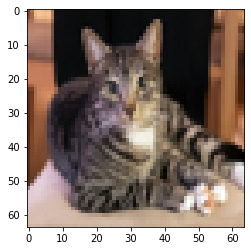

In [287]:
plt.imshow(data.reshape(num_px,num_px,3))
print(f"y_pred = {y_predict[0]} you predicted that is a {classes[int(y_predict[0])].decode('utf-8')}")